# ANALYSE D'INDICATEURS SUR LA VIE SCOLAIRE ET EXTRA-SCOLAIRE DES ÉLÈVES DE L'INSA TOULOUSE

### I. Objectif

Avec pour objectif d'aider tous les étudiants admis à obtenir leur diplôme quelle que soit leur origine sociale ou géographique, ou leur parcours scolaire avant d'entrer à l'INSA. Nous souhaitons donc pouvoir connaître les facteurs qui peuvent affecter la capacité de réussitte des étudiants afin de pouvoir trouver des solutions pour améliorer le taux de réussite des étudiants de l'INSA Toulouse.

    Modélisation du problème :
    Tout d'abord, dans le but que tous les étudiants obtiennent leur diplôme, nous allons étudier la variable REDOUBLEMENT par d'autres variables (facteurs affectant les étudiants). Pour les étudiants encore à l'école, cette variable décrit le mieux la probabilité de finir leurs études ou non. Nous voulons identifier les facteurs influençant le redoublement afin de limiter ce phénomène et d'améliorer le taux d'étudiants obtenant leur diplôme ou le faisant dans les délais impartis.
    De plus, nous pouvons étudier la variable RATTRAPAGES pour trouver des moyens de limiter les examens de rattrapage ou utiliser la variable CLASSEMENTDERNIER pour examiner quels facteurs aident les étudiants à obtenir de meilleurs résultats. 
    
    
**Cependant**, le problème se pose pour la variable CLASSEMENTDERNIER où environ un tiers choisissent "Je ne sais pas", ce qui complique le traitement car nous manquons d'informations et, si nous supprimons ces réponses, nous perdons un grand nombre d'observations. De plus, il est très difficile d'obtenir des informations pour les étudiants de première année ou les nouveaux entrants car lors de cette enquête, nous étions au deuxième semestre de l'année scolaire, ce qui signifie qu'ils n'ont passé qu'un semestre. Par conséquent, ils n'ont pas de résultats pour REDOUBLEMENT ou CLASSEMENTDERNIER, et la variable RATTRAPAGES, qui représente la moyenne du nombre de redoublements pendant toute la durée des études, est basée sur un échantillon trop petit. Je pense qu'il serait peut-être possible de séparer ces étudiants dans un jeu de données distinct, et nous analyserions alors les facteurs influençant leur capacité à s'adapter et à s'intégrer aux études à l'INSA Toulouse.
    

## II. Préparer les données.

### II.1. Découvrir des données 
Nous avons les données collectées d'une enquête réalisée par des étudiants de l'INSA Toulouse en mai 2024, effectuée via l'application Limesurvey. Ensuite, nous avons un fichier Excel contenant des lignes représentant chaque étudiant et des colonnes correspondant aux réponses. De plus, nous avons un fichier PDF 'Statistiques rapides' décrivant la distribution des réponses pour chaque question, ce qui nous aide à obtenir une vision plus détaillée des questions et des données que nous avons.

### II.2. Transformer des données 

Comme la plupart des questions sont à choix multiples, la réponse à une question ne se trouve pas dans une colonne mais dans plusieurs colonnes. Nous devons donc convertir ces colonnes en une seule colonne.

À cette étape, je me suis basé sur les résultats du fichier Excel des trois membres de l'équipe qui ont travaillé sur le projet précédent. Nous utilisons une formule conditionnelle dans Excel ; si la valeur de la colonne est "oui", elle renverra le résultat correspondant à la valeur de cette colonne. Cependant, après vérification, j'ai constaté qu'ils n'ont pas pris en compte les données de certaines questions, comme COMMENTAIRE, COURSNOTES(TD), COURSNOTES(TP), CONCENTRATIONPERSO, LOISIRSIMPACT, PREPMETIER, DOUBLEDIPLOME. Ils ont expliqué que cela était dû au fait qu'ils estimaient que ces variables pouvaient avoir une forte corrélation avec une autre variable, ou que ces variables avaient un taux élevé de valeurs non affichées, ou que tous les résultats se concentraient sur une seule valeur, etc. Mais je pense que cela n'est qu'une partie de leur ressenti, car ils n'ont pas utilisé de méthodes théoriques pour vérifier. Je souhaite donc utiliser tous les résultats des questions du sondage, vérifier le taux de données manquantes ou la corrélation des variables, puis les traiter ensuite.


En outre, pour les questions avec des valeurs de choix "Autre", où les répondants devaient entrer leur propre réponse, comme pour LOGEMENTTYPE, nous avons remarqué qu'il n'y avait pas beaucoup de valeurs "Autre". Nous avons donc regroupé manuellement ces valeurs "Autre" en catégories existantes. Par exemple, "concubinage", "avec ma copine", "en couple", "avec mon frère", "chez un ami" ont été regroupés sous "colocation", et "CROUS", "Logement étudiant", "maison individuelle" ont été regroupés sous "seul".

De plus, pour la variable DOUBLEDIPLOME, je recode les réponses choisies "Autre" en "Oui" ou "Non". Pour les cas indiquant une demande en cours, un souhait d'étudier ou une intention d'étudier l'année prochaine, je les recode en "Non". Selon moi, notre étude se base sur la variable RATTRAPPAGES, la moyenne du nombre de redoublements des semestres déjà étudiés. Par conséquent, si la double diplomation est envisagée dans le futur, cela n'a pas encore d'impact sur la variable cible.

Voici les résultats obtenus après le traitement des données sur Excel. Le fichier comprend 60 colonnes correspondant à 60 variables (sans compter la colonne ID) et 1182 lignes correspondant aux réponses de 1182 étudiants.


In [1]:
library(readxl) #Pour lire le fichier Excel
library(dplyr) #Pour convertir les variables de type 'chr' en type 'factor'
library(ggplot2) #Pour créer des graphiques
library(rlang) #Pour l'évaluation tidyeval
library(gridExtra) # Pour arranger plusieurs graphiques dans une grille
library(ggcorrplot) #Pour visualiser la matrice de corrélation.
library(reshape2) #Pour manipuler les données
library(writexl)
library(randomForest)
library(caret)  # For cross-validation
library(forcats)
library(xgboost)
library(FactoMineR)  # Pour réaliser l'Analyse des Correspondances Multiples (MCA)
library(factoextra)  # Pour visualiser les résultats de la MCA
library(car)
library(gplots)
library(reshape2)
library(glmnet)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ggcorrplot' was built under R version 4.4.1"
Warning message:
"package 'writexl' was built under R version 4.4.1"
Warning message:
"package 'randomForest' was built under R version 4.4.1"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'caret' was built under R version 4.4.1"
Loading required package: lattice

Warning message:
"package 'xgboost' was built under R vers

In [2]:
# Lire le fichier Excel "results-survey278778.xlsx" qui se trouve dans le même répertoire que le script R
insa <- read_excel("survey_Luan.xlsx")
# Sélectionner les 60 variables
insa <- insa[, 2:61]


In [3]:
# Afficher la taille du dataframe
print(dim(insa))

[1] 1182   60


In [4]:
# Afficher les premières lignes du dataframe
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : chr [1:1182] "15-30min" "5-15min" "0-5min" "5-15min" ...
 $ LOGEMENTTYPE      : chr [1:1182] "seul" "seul" "seul" "seul" ...
 $ LOGEMENTSURFACE   : chr [1:1182] "+ 30m2" "+ 30m2" "10-20m2" "+ 30m2" ...
 $ LOGEMENTBIEN      : chr [1:1182] "tout à fait" "tout à fait" "plutôt oui" "tout à fait" ...
 $ ACT_PRO           : chr [1:1182] "aucune" "aucune" "aucune" "aucune" ...
 $ BOURSIER          : chr [1:1182] "echelon 1-3" "non" "non" "non" ...
 $ HANDICAP          : chr [1:1182] "non" "non" "non" "non" ...
 $ TIERSTEMPS        : chr [1:1182] "Non" "Non" "Non" "Non" ...
 $ STRESS            : chr [1:1182] "souvent" "souvent" "souvent" "toujours" ...
 $ COMMENTAIRE       : chr [1:1182] "jamais" "parfois" "parfois" "parfois" ...
 $ COMCONSTRUCTIFS   : chr [1:1182] "pas commentaire" "plutôt oui" "plutôt oui" "plutôt oui" ...
 $ ETUDE_SEM         : chr [1:1182] "0-1h" "+4h" "1-2h" "1-2h" ...
 $ ETUDEWE           : chr [1:11

    Nous constatons que les valeurs des variables sont encodées sous forme de chr[] alors que nos données devraient être encodées sous forme de facteurs pour les variables qualitatives. Par conséquent, nous allons convertir toutes les variables en facteurs.

In [5]:
# Convertir toutes les colonnes de type 'chr' en 'factor' avec dplyr
insa <- insa %>%
  mutate_if(is.character, as.factor)
# Afficher la structure du dataframe après convertir
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "+30min","0-5min",..: 3 4 2 4 4 4 3 3 2 2 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "colocation","foyer familial",..: 3 3 3 3 1 1 3 3 3 3 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","+ 30m2",..: 2 2 3 2 5 5 4 2 3 4 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui +15h",..: 1 1 1 1 1 3 1 2 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "echelon 0bis",..: 2 4 4 4 4 4 4 4 1 4 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "non","pas commentaire",..: 2 4 4 4 4 4

    Nous constatons que les variables ont été converties en facteurs, mais l'ordre des modalités est mélangé. Cela rend le suivi de chaque variable difficile et je trouve cela déroutant. Par conséquent, nous devons convertir la variable en facteur avec un ordre spécifique.

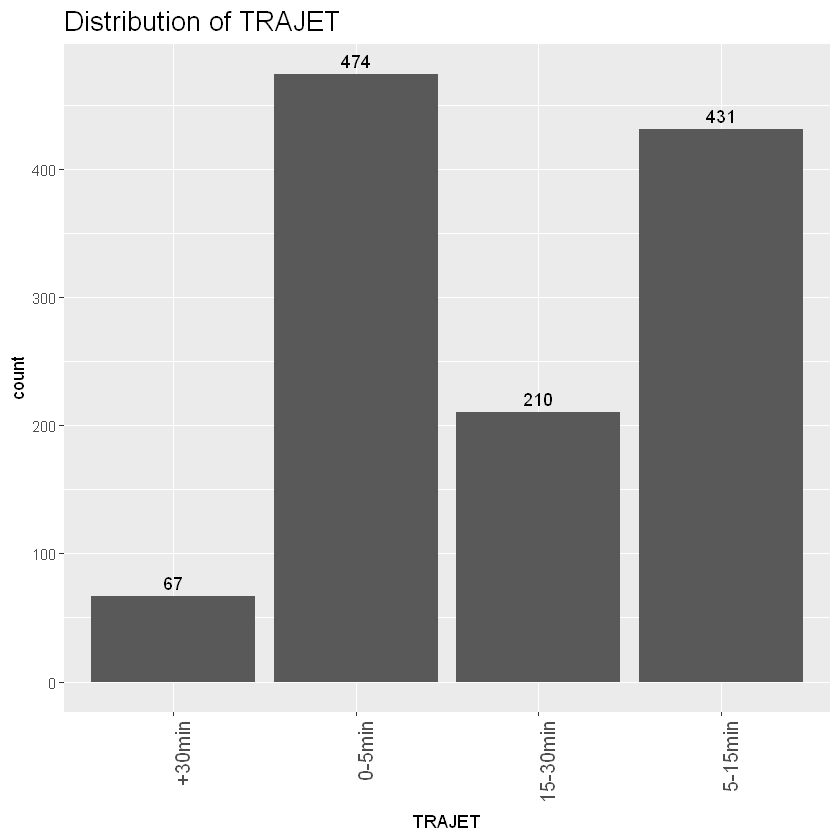

In [6]:
# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

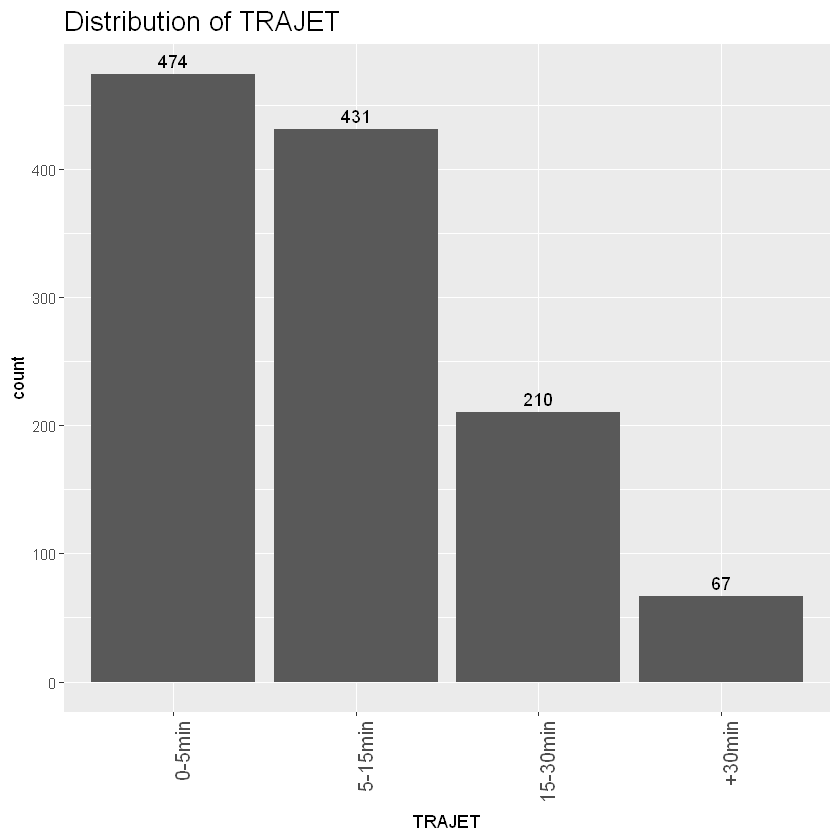

In [7]:
# Convertir la variable en facteur avec un ordre spécifique
insa$TRAJET <- factor(insa$TRAJET, levels = c("0-5min", "5-15min", "15-30min", "+30min"))

# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

    Nous procéderons de la même manière pour toutes les variables.

In [8]:
levels_list <- list(
  TRAJET = c("0-5min", "5-15min", "15-30min", "+30min"),
  LOGEMENTTYPE = c("seul", "colocation", "foyer familial"),
  LOGEMENTSURFACE = c("- 10m2", "10-20m2", "20-30m2", "+ 30m2","coloc ou foyer familial"),
  LOGEMENTBIEN = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ACT_PRO = c("aucune", "oui 1-5h", "oui 5-10h","oui 10-15h", "oui +15h"),
  BOURSIER = c("non","echelon 0bis", "echelon 1-3", "echelon 4-7"),
  HANDICAP = c("non", "oui"),
  TIERSTEMPS = c("Non", "Oui"),
  STRESS = c("jamais", "parfois", "souvent", "toujours"),
  COMMENTAIRE = c("jamais", "parfois", "souvent", "toujours"),
  COMCONSTRUCTIFS = c("pas commentaire","non", "plutôt non", "plutôt oui", "tout à fait"),
  ETUDE_SEM = c("0h", "0-1h", "1-2h", "2-4h", "+4h"),
  ETUDEWE = c("0h","0-1h","1-2h", "2-4h", "4-6h", "6-8h", "+8h"),
  ETUDEGROUPE = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDEHORS = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDOM = c("jamais", "parfois", "souvent", "toujours"),
  PRESENCE_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  CONCENTRATION_CM = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TD = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TP = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  PREPCOURS_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  REVISIONSDEB = c("semestre", "1 mois avant", "2 semaines avant", "1 semaine avant", "3-4 jours avant", "la veille"),
  CONCENTRATIONPERSO = c("pas du tout", "moyennement", "plutôt oui", "très"),
  CONDITIONSTRAVAIL = c("mauvaises", "moyennes", "plutôt bonnes", "très bonnes"),
  RESSOURCES_SUP = c("jamais", "parfois", "régulièrement", "très souvent"),
  AMIS = c("jamais", "parfois", "régulièrement", "très souvent"),
  FAMILLE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ISOLEMENT = c("jamais", "parfois", "souvent", "toujours"),
  ASSOCIATIF = c("non", "0-1h", "1-5h", "5-10h", "10-15h","15-20h", "+20h"),
  ASSOCIATIF_POSITIF = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ASSOCIATIFFATIGUE = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SPORTTEMPS = c("0-1h", "1-3h", "3-6h", "6-10h", "+10h"),
  SPECTACLES = c("jamais", "rarement", "1/mois", "1/semaine"),
  SPECTACLES_POSITIF = c("pas de spectacles", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SORTIEBAR = c("jamais", "rarement", "1/mois", "1/semaine", "plusieurs fois/semaine", "tous les jours"),
  DETENTE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ECRANS = c("0-1h", "1-2h", "2-4h", "4-6h", "6-8h","+8h"),
  SOMMEIL = c("très insatisfaisante", "plutôt insatisfaisante", "plutôt satisfaisante", "très satisfaisante"),
  ALIMENTATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  MOTIVATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SENSATIONREUSSITE = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ADEQUATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PREPMETIER = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PROMO = c("1A", "2A", "3A", "4A", "5A"),
  SPECIALITE_PO = c("ICBE", "IMACS", "MIC", "IC", "GB", "GP3E", "GP", "AE", "GMM", "IR", "GC", "GM", "apprentissage", "1A"),
  COHORTE = c("FAS", "NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr", "SHN", "Danse-etude", "Musique-etude", "Theatre-etude", "SupENR", "classique"),
  DOUBLEDIPLOME = c("non", "oui"),
  INTEGRATION = c("post-bac", "1A", "2A", "3A", "4A", "5A"),
  BACTYPE = c("Fr", "Fr_etranger", "equi_Fr", "etranger"),
  CLASSEMENT1A = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "redoubl", "amenag", "pas de classement"),
  CLASSEMENTDERNIER = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "jsp"),
  REDOUBLEMENT = c("Non", "Oui"),
  RATTRAPAGES = c("aucun", "1 par semestre", "2/3 par semestre", "+ de 4 par semestre")
)
for (var in names(levels_list)) {
  if (var %in% names(insa)) {
    insa[[var]] <- factor(insa[[var]], levels = levels_list[[var]])
  }
}

str(insa)



tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

    Nous vérifions s'il y a des valeurs manquantes, ce qui peut nous aider à détecter des fautes d'orthographe lorsque nous réorganisons l'ordre des modalités. 

In [9]:
# Vérifier le nombre de valeurs NA dans chaque variable
na_counts <- sapply(insa, function(x) sum(is.na(x)))
print(na_counts)

            TRAJET       LOGEMENTTYPE    LOGEMENTSURFACE       LOGEMENTBIEN 
                 0                  1                  5                  0 
           ACT_PRO           BOURSIER           HANDICAP         TIERSTEMPS 
                 0                  0                  0                  0 
            STRESS        COMMENTAIRE    COMCONSTRUCTIFS          ETUDE_SEM 
                 0                  0                  0                  0 
           ETUDEWE        ETUDEGROUPE        ETUDEDEHORS           ETUDEDOM 
                 0                  0                  0                  0 
       PRESENCE_CM        PRESENCE_TD        PRESENCE_TP   CONCENTRATION_CM 
                 0                  0                  0                  0 
  CONCENTRATION_TD   CONCENTRATION_TP       PREPCOURS_CM       PREPCOURS_TD 
                 0                  0                  0                  0 
      PREPCOURS_TP      COURSNOTES_CM      COURSNOTES_TD      COURSNOTES_TP 

    En outre, nous constatons qu'il y a des valeurs manquantes pour deux variables, LOGEMENTTYPE et LOGEMENTSURFACE. Pour la variable LOGEMENTTYPE, il y a une option 'Autre' et un étudiant a rempli 'vélo', que nous considérons comme une valeur manquante. De plus, nous avons divisé les résultats de la variable LOGEMENTTYPE en valeurs disponibles, parmi lesquelles 5 valeurs sont classées sous 'seul'. Cependant, lorsque l'option 'Autre' est choisie, il n'y a pas de question sur LOGEMENTSURFACE. Par conséquent, les 5 personnes qui ont choisi 'Autre' de type 'seul' n'ont pas de valeur pour LOGEMENTSURFACE.

    Comme le nombre de valeurs manquantes est faible, nous allons supprimer les individus contenant des valeurs manquantes (nous pourrions utiliser des méthodes telles que calculer la moyenne ou la Random Forest pour imputer la valeur de LOGEMENTSURFACE, mais avec 5 données manquantes sur 1182 (soit 0,423%), nous pouvons les supprimer).

In [10]:
# Supprimer les lignes contenant des valeurs manquantes
insa_cleaned_1 <- na.omit(insa)

# Vérifier la structure du dataframe après la suppression des lignes avec des valeurs manquantes
str(insa_cleaned_1)

write_xlsx(insa_cleaned_1, "insa_cleaned_1.xlsx")

tibble [1,163 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

**Enfin, nous avons un dataframe de 1163x60 correspondant à 1163 individus et 60 variables.**


In [11]:
premier_insa <- insa_cleaned_1 %>%
  filter(PROMO == '1A' & REDOUBLEMENT == 'Non') %>%
  select(PROMO, CLASSEMENT1A, CLASSEMENTDERNIER, RATTRAPAGES, REDOUBLEMENT)

write_xlsx(premier_insa, "premier_insa.xlsx")

In [12]:
# Compter les valeurs de CLASSEMENT1A différentes de 'amenag', 'redoubl'
count_classement1A <- premier_insa %>%
  filter(CLASSEMENT1A != 'amenag' & CLASSEMENT1A != 'redoubl') %>%
  summarise(count = n())

# Compter les valeurs de CLASSEMENTDERNIER différentes de 'jsp'
count_classementDernier <- premier_insa %>%
  filter(CLASSEMENTDERNIER != 'jsp') %>%
  summarise(count = n())

# Calculer le pourcentage
total_count <- nrow(premier_insa)
percent_classement1A <- (count_classement1A$count / total_count) * 100
percent_classementDernier <- (count_classementDernier$count / total_count) * 100

# Afficher les résultats
cat("Nombre de CLASSEMENT1A différent de 'amenag', 'redoubl':", count_classement1A$count, "\n")
cat("Pourcentage de CLASSEMENT1A différent de 'amenag', 'redoubl':", percent_classement1A, "%", "\n")
cat("Nombre de CLASSEMENTDERNIER différent de 'jsp':", count_classementDernier$count, "\n")
cat("Pourcentage de CLASSEMENTDERNIER différent de 'jsp':", percent_classementDernier, "%", "\n")

Nombre de CLASSEMENT1A différent de 'amenag', 'redoubl': 128 
Pourcentage de CLASSEMENT1A différent de 'amenag', 'redoubl': 54.70085 % 
Nombre de CLASSEMENTDERNIER différent de 'jsp': 33 
Pourcentage de CLASSEMENTDERNIER différent de 'jsp': 14.10256 % 


### II.3. Valider des données

    Maintenant, je veux vérifier qu'il n'y a pas d'erreurs dans le traitement sur Excel. Par conséquent, je vais tracer un graphique de distribution des modalités des variables et le comparer avec le graphique des Statistiques rapides obtenues à partir de l'enquête.

In [13]:
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar() +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%")), 
              vjust = -0.5, size = 2.5) +
    scale_y_continuous(labels = scales::percent) +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 8),
          plot.title = element_text(size = 12))
  return(p)
}

# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_1)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_1, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

## III. Analyse statistique descriptive

Avant de plonger dans une analyse approfondie ou des modèles complexes, nous allons analyser ces données pour chaque variable individuellement ou pour des groupes de variables qui sont liées entre elles.

In [14]:
# Fonction pour tracer la distribution d'une variable
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar(aes(y = after_stat(count / sum(count)))) +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%"), 
                                  y = after_stat(count / sum(count))), 
              vjust = -0.5, size = 4.5) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(y = "Pourcentage") +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10),
          plot.title = element_text(size = 12))
  return(p)
}

### Variable TRAJET

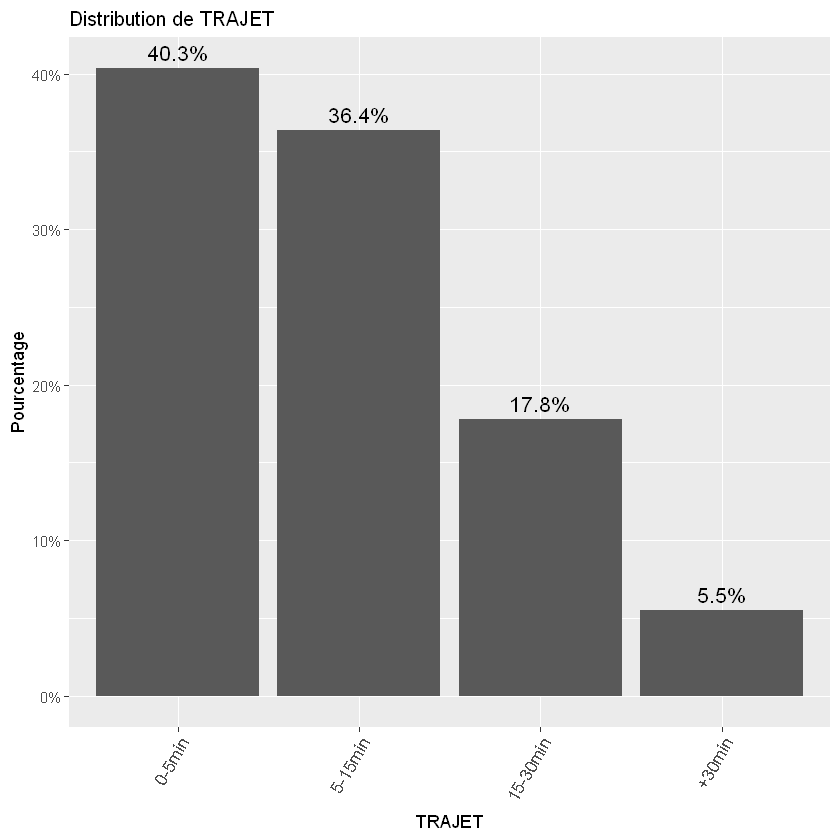

In [15]:
print(plot_distribution(insa_cleaned_1, "TRAJET"))

D'après les résultats de l'enquête, nous constatons que près de 80 % des étudiants mettent moins de 15 minutes pour se rendre à l'école et que près de 95 % des étudiants mettent moins de 30 minutes. Cela montre que la plupart des étudiants bénéficient de bonnes conditions de déplacement (ne nécessitant pas trop de temps) pour se rendre à l'école.

Je souhaite vérifier si le temps de trajet pour se rendre à l'école dépend du type de logement. En effet, je pense que de nombreux étudiants vivent seuls dans des résidences autour de l'école, ce qui rend leur temps de trajet très court. De plus, je me pose si ceux qui ont un temps de trajet long parce qu'ils louent un logement partagé ou qu'ils vivent avec leur famille loin de l'école.

          
           seul colocation foyer familial
  0-5min    441         27              1
  5-15min   319         99              5
  15-30min  108         74             25
  +30min     12         14             38


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 507.4, df = 6, p-value < 2.2e-16



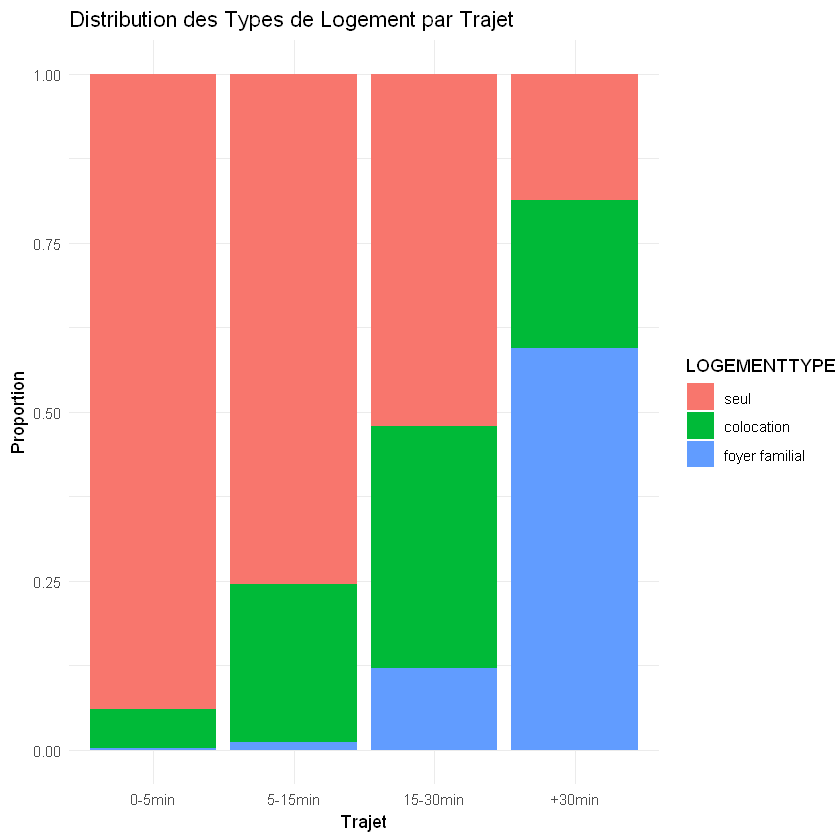

In [16]:
# Créer une table de contingence pour TRAJET et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$TRAJET, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution des LOGEMENTTYPE par TRAJET
ggplot(insa_cleaned_1, aes(x = TRAJET, fill = LOGEMENTTYPE)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution des Types de Logement par Trajet',
       x = 'Trajet',
       y = 'Proportion') +
  theme_minimal()


Les résultats avec une p-value < 2,2e-16 et les graphiques confirment qu'il y a suffisamment de preuves pour conclure qu'il existe une relation entre les deux variables. Nous observons que les étudiants vivant seuls ont tendance à vivre plus près de l'école pour faciliter leurs déplacements, tandis que ceux qui ont un temps de trajet plus long sont principalement ceux qui vivent en foyer familial.

### LOGEMENT

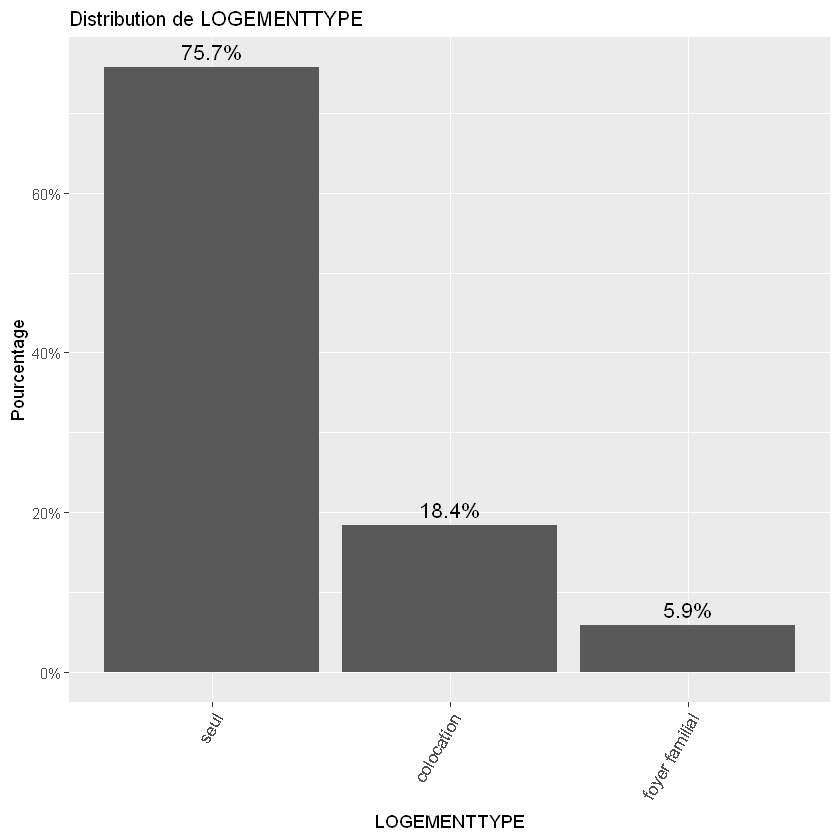

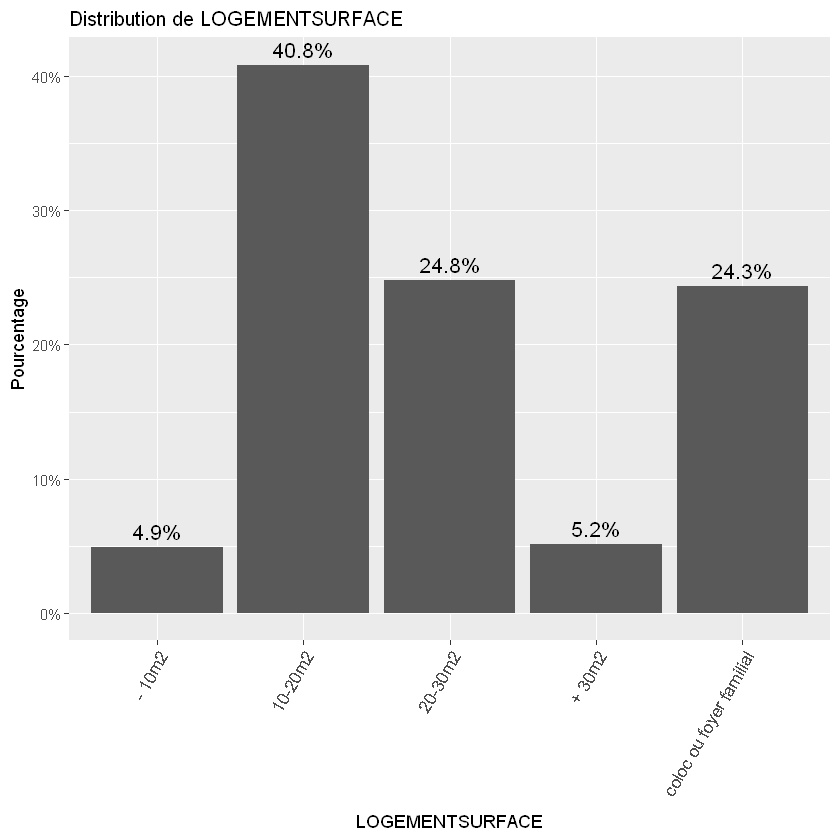

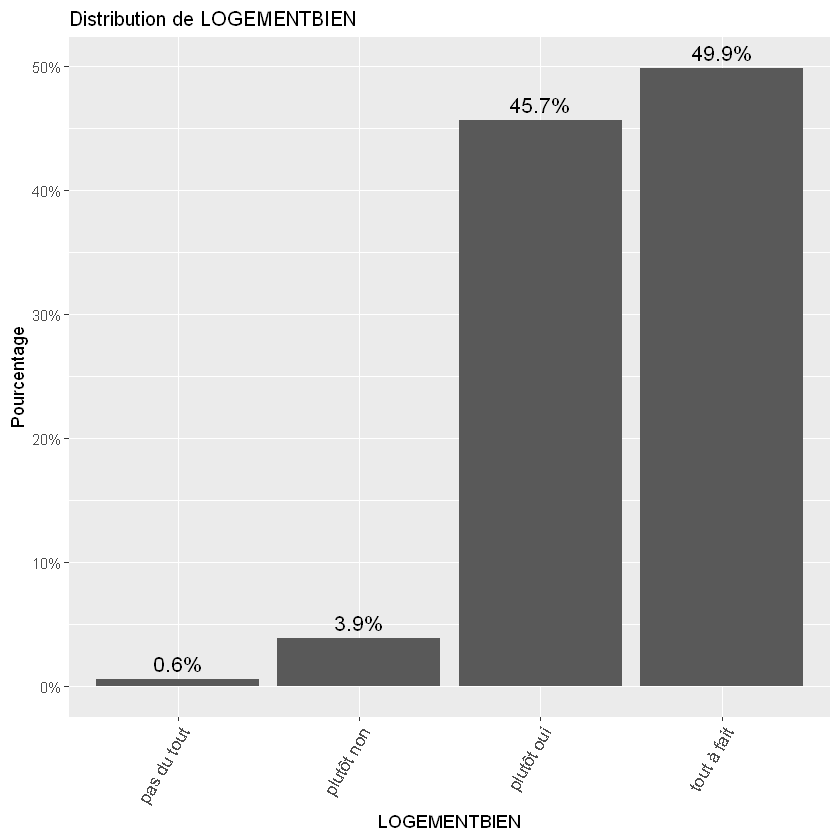

In [17]:
# Liste des variables liées au logement
variables_to_plot <- c("LOGEMENTTYPE", "LOGEMENTSURFACE", "LOGEMENTBIEN")

# Générer et enregistrer des graphiques pour chaque variable du groupe
for (var in variables_to_plot) {
  print(plot_distribution(insa_cleaned_1, var))
}

Nous constatons que la majorité des étudiants (3/4) vivent seuls, avec une forte proportion vivant dans des logements de 10 à 30 m² (86,7 % des 75,7 %, soit 65,6 %). Cette distribution correspond à une distribution normale, où les valeurs sont concentrées autour de la moyenne et diminuent aux valeurs extrêmes comme -10 m² ou +30 m².

De plus, pour la variable LOGEMENTBIEN, nous observons que presque tous les étudiants se sentent satisfaits de leur logement (>95 %). Enfin, je souhaite vérifier si la satisfaction par rapport au logement dépend du type du logement. 

In [18]:
# Créer une table de contingence pour LOGEMENTBIEN et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$LOGEMENTBIEN, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

             
              seul colocation foyer familial
  pas du tout    6          1              0
  plutôt non    36          8              1
  plutôt oui   436         74             21
  tout à fait  402        131             47


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 27.13, df = 6, p-value = 0.0001369



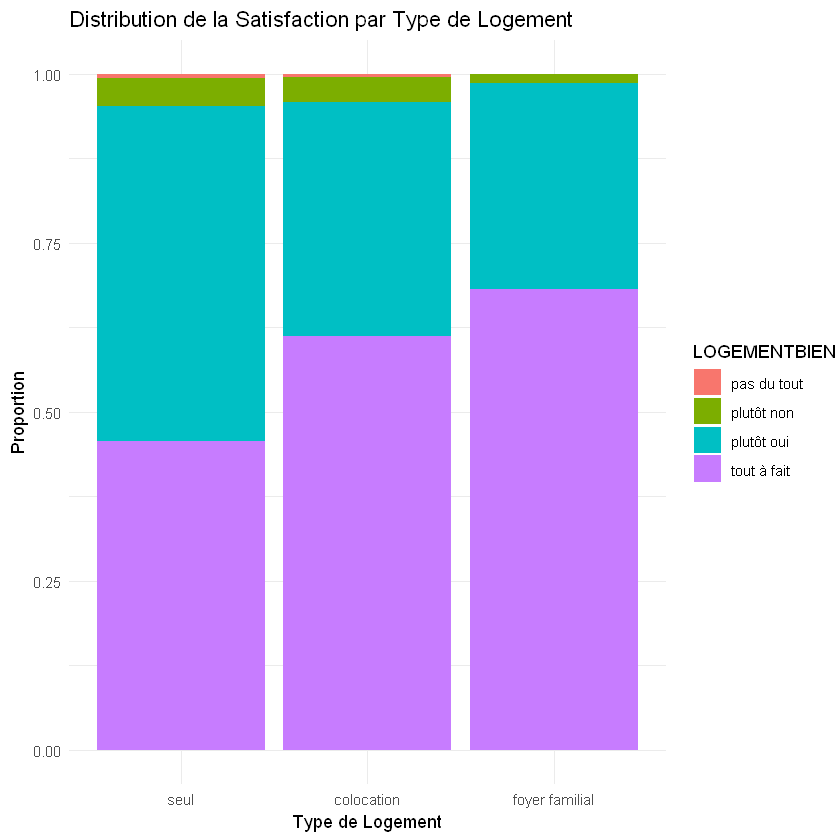

In [19]:
# Visualiser la distribution de la satisfaction par rapport au type de logement
ggplot(insa_cleaned_1, aes(x = LOGEMENTTYPE, fill = LOGEMENTBIEN)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de la Satisfaction par Type de Logement',
       x = 'Type de Logement',
       y = 'Proportion') +
  theme_minimal()

Avec un tableau de contingence, p-valeur < 0,05 et un graphique de distribution, nous pouvons conclure qu'il existe une relation significative entre la satisfaction par rapport au logement et le type de logement. Par exemple, d'après le tableau de contingence, nous constatons que la majorité des étudiants (6 sur 7) qui ne sont pas du tout satisfaits de leur logement vivent seuls. De plus, le graphique de distribution montre que le taux de tout à fait satisfaction des étudiants vivant seuls est inférieur à celui des étudiants vivant en colocation ou en foyer familial.

### Variable ACT_PRO (activité professionnelle)

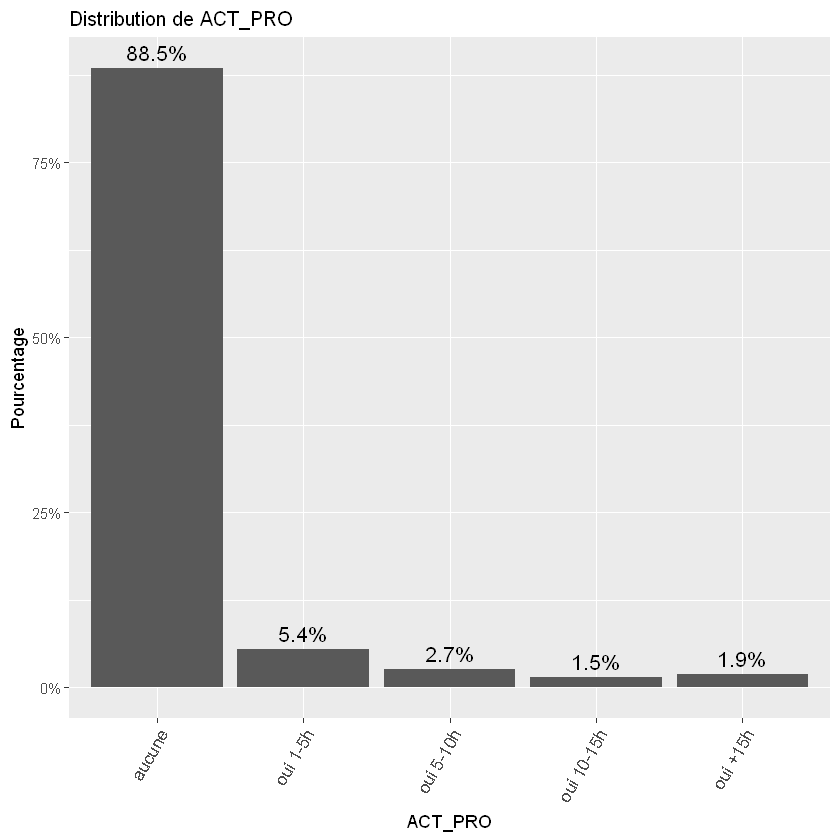

In [20]:
print(plot_distribution(insa_cleaned_1, "ACT_PRO"))

Nous constatons que la majorité des étudiants de notre école (88,5 %) n'exercent pas d'activité rémunérée en parallèle de leurs études. Cela peut s'expliquer par la charge de travail importante de notre programme, qui pousse les étudiants à se concentrer principalement sur leurs études et à ne pas avoir le temps de travailler à côté, ou seulement un temps réduit (moins de 5 heures).

### Variable BOURSIER

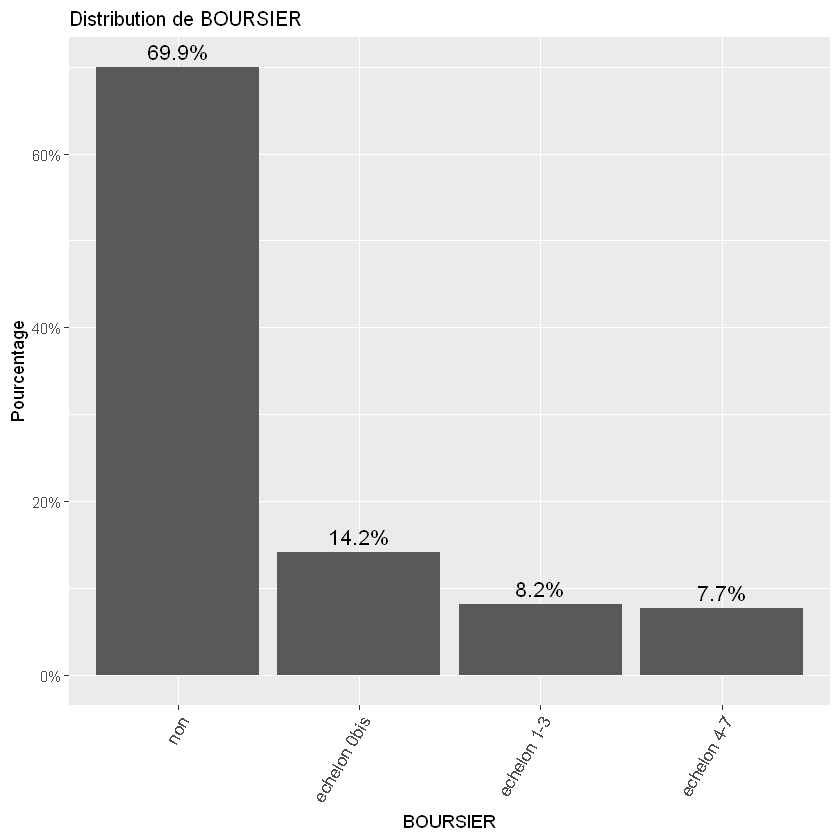

In [21]:
print(plot_distribution(insa_cleaned_1, "BOURSIER"))

Le graphique montre que la majorité des étudiants ne reçoivent pas de soutien financier sous forme de bourse (69,9 %), et parmi ceux qui en bénéficient, la plupart ne reçoivent qu'un faible niveau de soutien (14,2 %). Cela indique qu'un certain nombre d'étudiants ont besoin d'un soutien financier, mais pas de manière significative. Cependant, une minorité d'étudiants ont des besoins financiers élevés ou répondent aux critères pour recevoir des bourses à des niveaux plus élevés.

### Variable HANDICAP

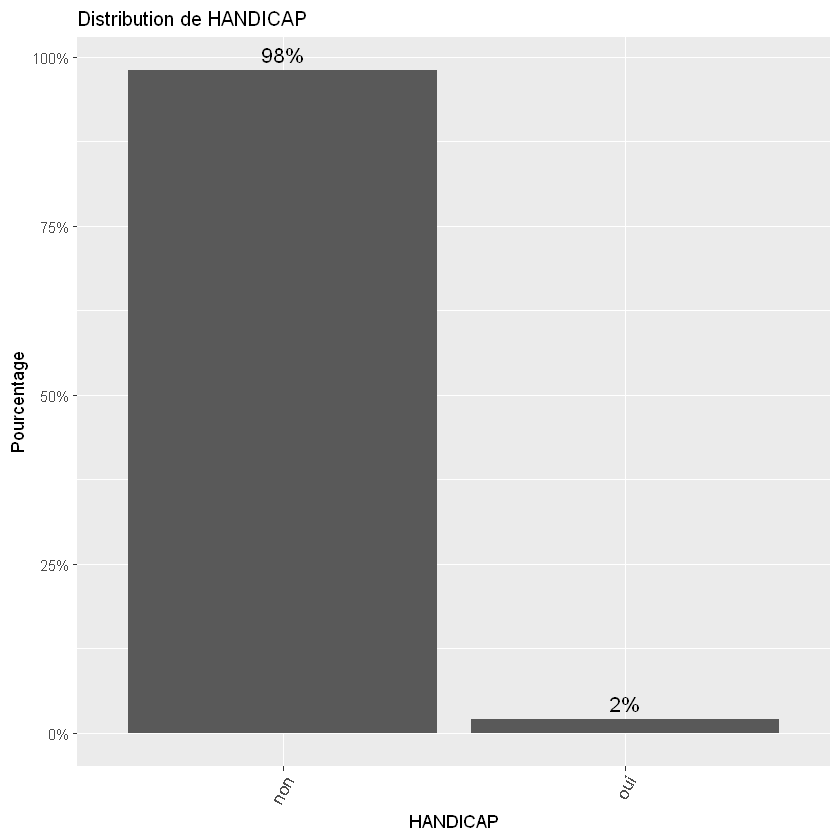

In [22]:
print(plot_distribution(insa_cleaned_1, "HANDICAP"))

Le graphique montre que la majorité des étudiants ne rencontrent pas de problèmes de handicap (98%), et qu'il n'y a qu'un petit nombre d'étudiants en situation de handicap. Cependant, il est nécessaire de mettre en place des mesures pour aider ces étudiants en difficulté.

### Variable TIERSTEMPS

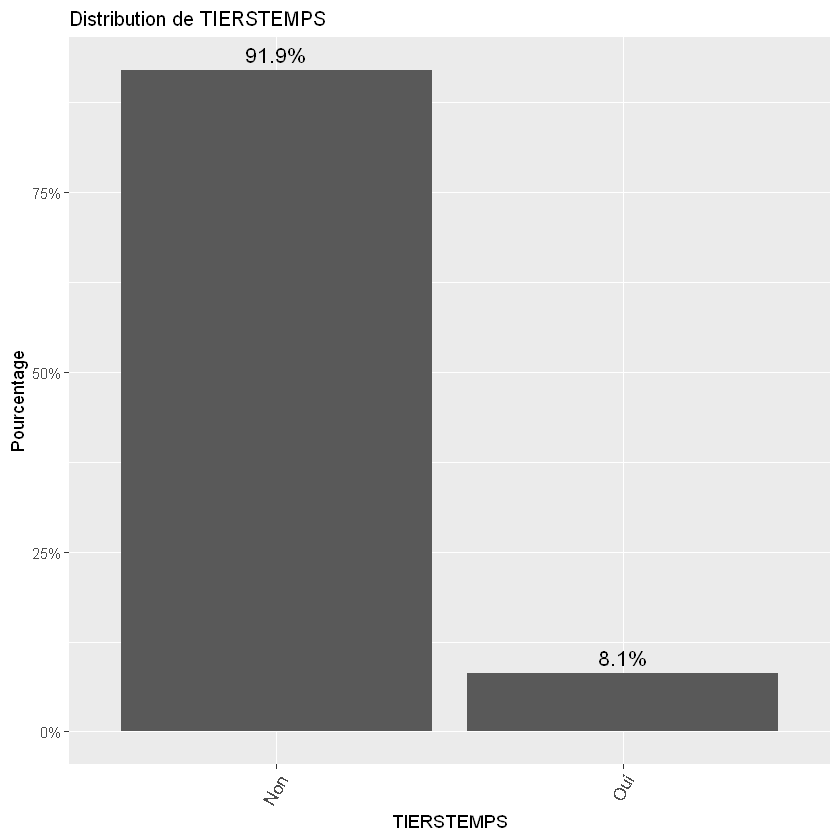

In [23]:
print(plot_distribution(insa_cleaned_1, "TIERSTEMPS"))

In [24]:
# Créer une table de contingence pour TIERSTEMPS et BACTYPE
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$BACTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et BACTYPE.")
}



     
       Fr Fr_etranger equi_Fr etranger
  Non 964          54       5       46
  Oui  50           3       1       40


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 185.71, df = 3, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE."


In [25]:
# Créer une table de contingence pour TIERSTEMPS et HANDICAP
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$HANDICAP)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et HANDICAP.")
}


     
       non  oui
  Non 1064    5
  Oui   76   18


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 146.06, df = 1, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP."


Le graphique montre que la majorité (91.9%) des étudiants n'ont pas besoin de soutien en termes de temps supplémentaire, et seulement quelques étudiants bénéficient de ce soutien. D'après le tableau de contingence et le test du Khi-deux, nous constatons que la variable TIERSTEMPS dépend des variables BACTYPE et HANDICAP. Cela est presque évident, car la majorité des étudiants bénéficiant de TIERSTEMPS sont des étudiants étrangers ayant des difficultés en français et des étudiants en situation de handicap.

### Variable STRESS

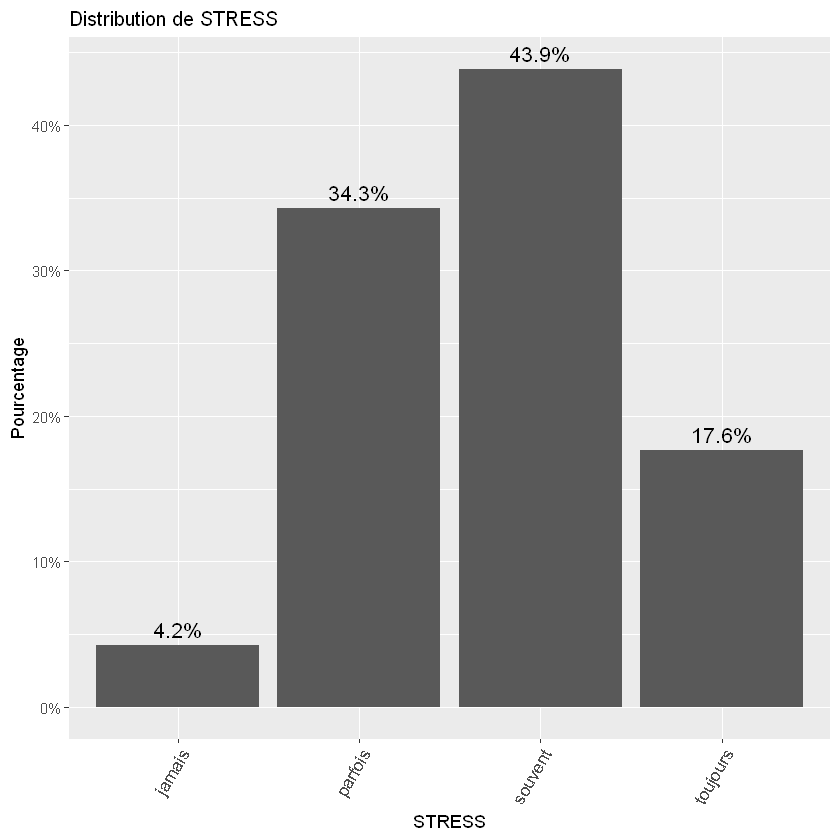

In [26]:
print(plot_distribution(insa_cleaned_1, "STRESS"))

Nous constatons que le faible pourcentage d'étudiants qui ne se sentent jamais stressés indique que la plupart des étudiants doivent faire face à un certain niveau de stress pendant leurs études. De plus, le taux élevé d'étudiants souvent ou toujours stressés (environ 60 %) est également préoccupant, car un stress fréquent peut avoir des effets négatifs sur la santé des étudiants.

### Variable COMMENTAIRE et COMCONSTRUCTIFS

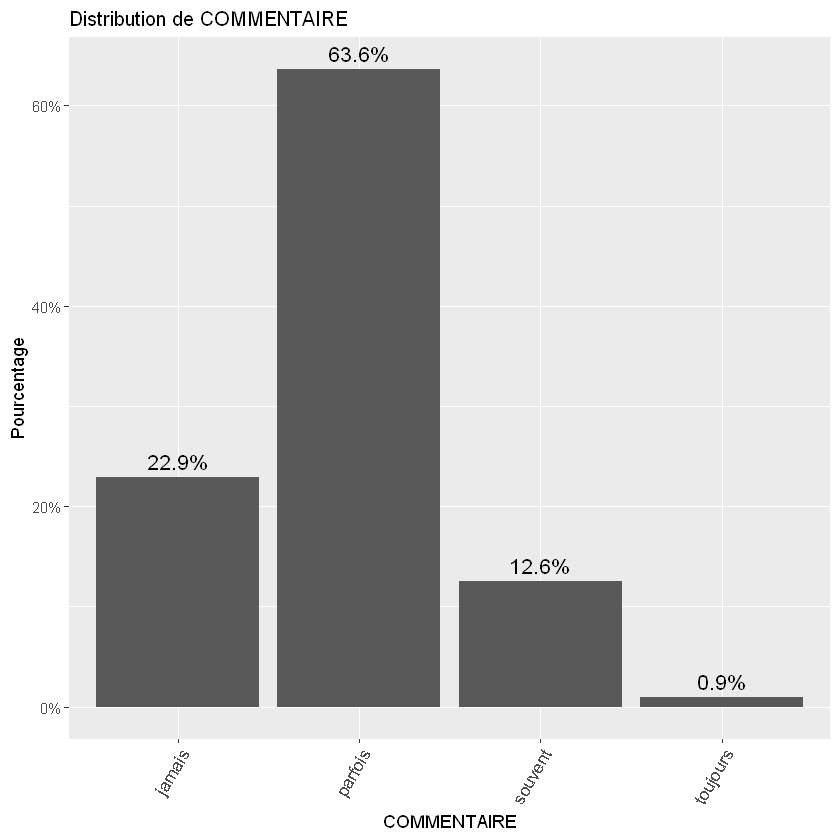

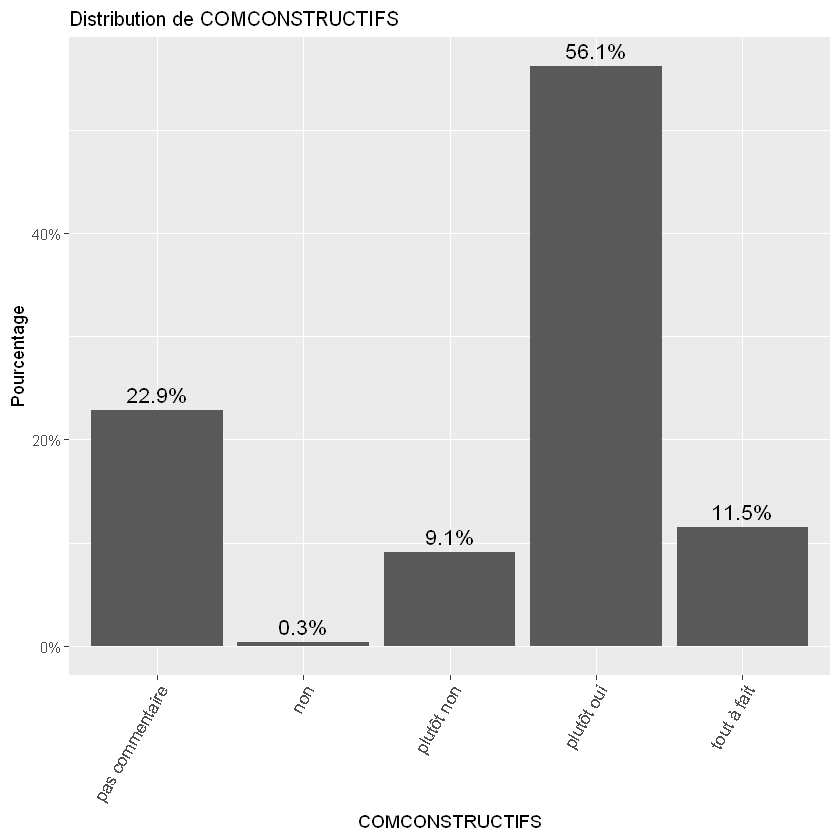

In [27]:
print(plot_distribution(insa_cleaned_1, "COMMENTAIRE"))
print(plot_distribution(insa_cleaned_1, "COMCONSTRUCTIFS"))


Nous constatons que la majorité des étudiants reçoivent occasionnellement ou fréquemment des commentaires (feedback) de leurs enseignants sur leur travail (75 %), dont 87,7 % (67,6/77,1) sont des évaluations constructives. Un nombre restreint d'étudiants indiquent que les commentaires sont apparemment non constructifs, et très peu signalent des commentaires non constructifs.

### Variable ETUDE_SEM

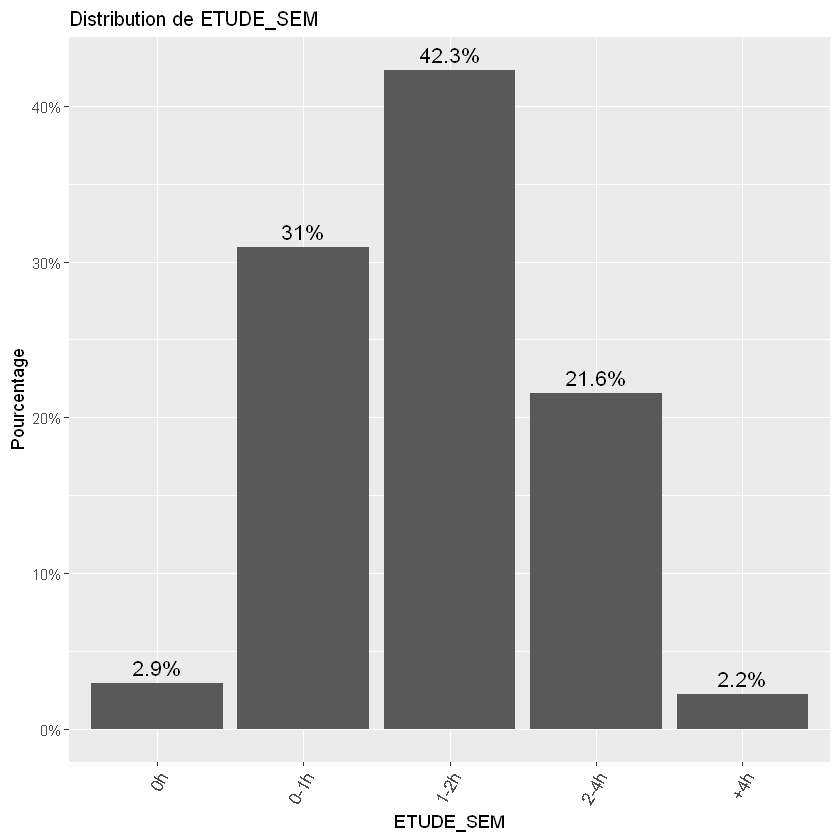

In [28]:
print(plot_distribution(insa_cleaned_1, "ETUDE_SEM"))

Nous constatons que la majorité des étudiants étudient moins de 4 heures par jour en semaine en dehors des cours à l'école (environ 95 %), avec une proportion maximale étudiant entre 1 et 2 heures (42,3 %). Cela est compréhensible, car les étudiants passent généralement toute la journée à l'école, n'ayant donc que le soir ou tôt le matin pour étudier. Ainsi, étudier plus de 4 heures par jour en dehors des cours est très rare (2,2 %).

En outre, un nombre significatif d'étudiants étudient moins d'une heure par jour (environ un tiers). Cela peut indiquer que certains étudiants n'ont pas besoin de beaucoup de temps de révision en dehors des cours ou qu'ils ne gèrent pas bien leur temps d'étude. Cependant, le fait qu'une proportion assez importante d'étudiants consacre peu de temps à l'étude peut être préoccupant et potentiellement problématique.

### Variable ETUDEWE

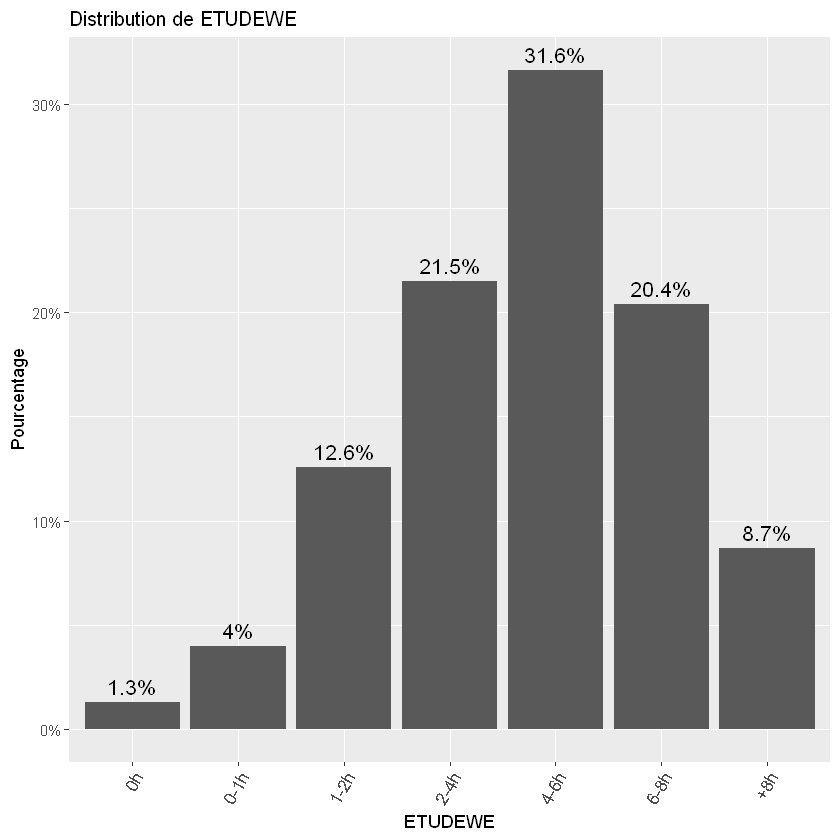

In [29]:
print(plot_distribution(insa_cleaned_1, "ETUDEWE"))

Nous constatons que plus de 80 % des étudiants consacrent plus de 2 heures à l'étude pendant le week-end, la tranche horaire la plus fréquente étant de 4 à 6 heures (31,6 %). Cela montre que la majorité des étudiants consacrent une quantité de temps assez significative à l'étude pendant le week-end.

      
        0h 0-1h 1-2h 2-4h 4-6h 6-8h +8h
  0h     9    7    7    3    4    3   1
  0-1h   5   35   95  119   73   26   7
  1-2h   1    3   37  115  198  104  34
  2-4h   0    1    7   12   90   95  46
  +4h    0    0    0    1    3    9  13


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 611.48, df = 24, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE."


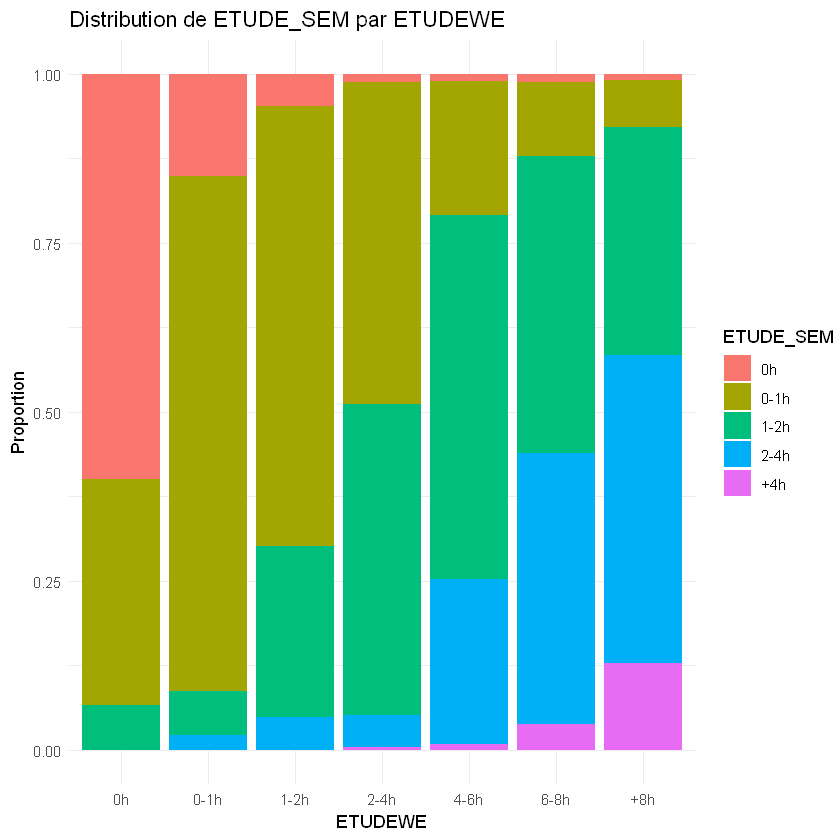

In [30]:
# Créer une table de contingence pour ETUDE_SEM et ETUDEWE
contingency_table <- table(insa_cleaned_1$ETUDE_SEM, insa_cleaned_1$ETUDEWE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre ETUDE_SEM et ETUDEWE.")
}

# Visualiser la distribution de ETUDE_SEM par ETUDEWE
ggplot(insa_cleaned_1, aes(x = ETUDEWE, fill = ETUDE_SEM)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDE_SEM par ETUDEWE',
       x = 'ETUDEWE',
       y = 'Proportion') +
  theme_minimal()

Il y a une relation significative entre ETUDE_SEM et ETUDEWE. Nous constatons que le temps d'étude en semaine et le temps d'étude pendant le week-end sont généralement proportionnels. Ceux qui étudient davantage en semaine ont également tendance à étudier davantage pendant le week-end.

### Variable ETUDEGROUPE

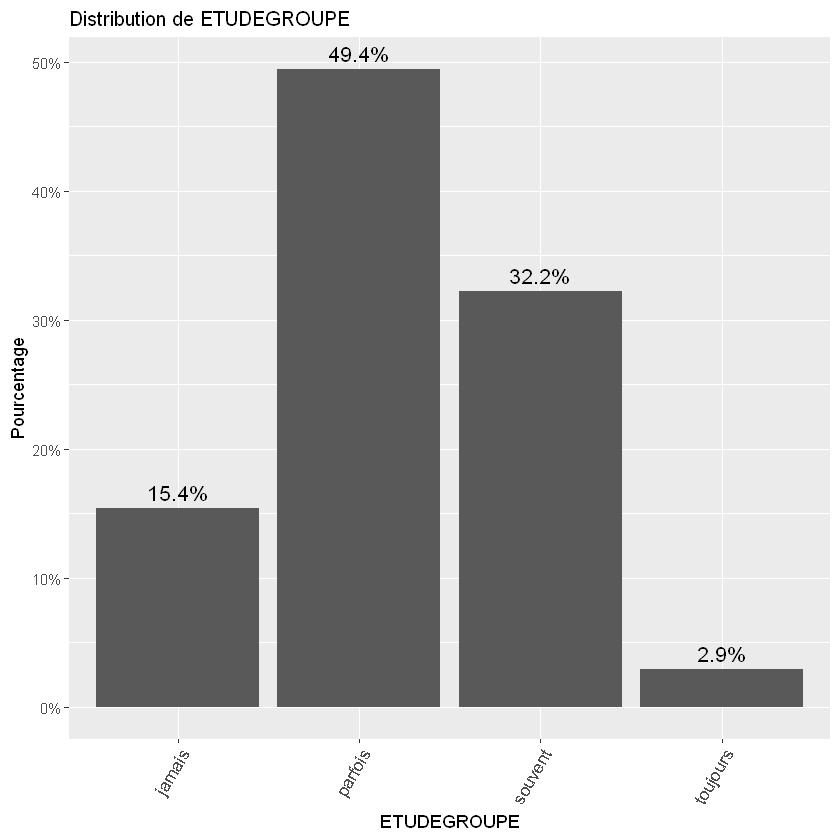

In [31]:
print(plot_distribution(insa_cleaned_1, "ETUDEGROUPE"))

La majorité des étudiants ont tendance à étudier en groupe (~80 %) au moins occasionnellement, ce qui peut indiquer que l'apprentissage en groupe est considéré comme une méthode efficace et populaire parmi les étudiants. Cependant, il y a aussi une minorité d'étudiants qui ne travaillent jamais ou toujours en groupe, ce qui peut être dû à des préférences personnelles ou à des exigences d'apprentissage spécifiques.

### Variable ETUDEDEHORS et ETUDEDOM

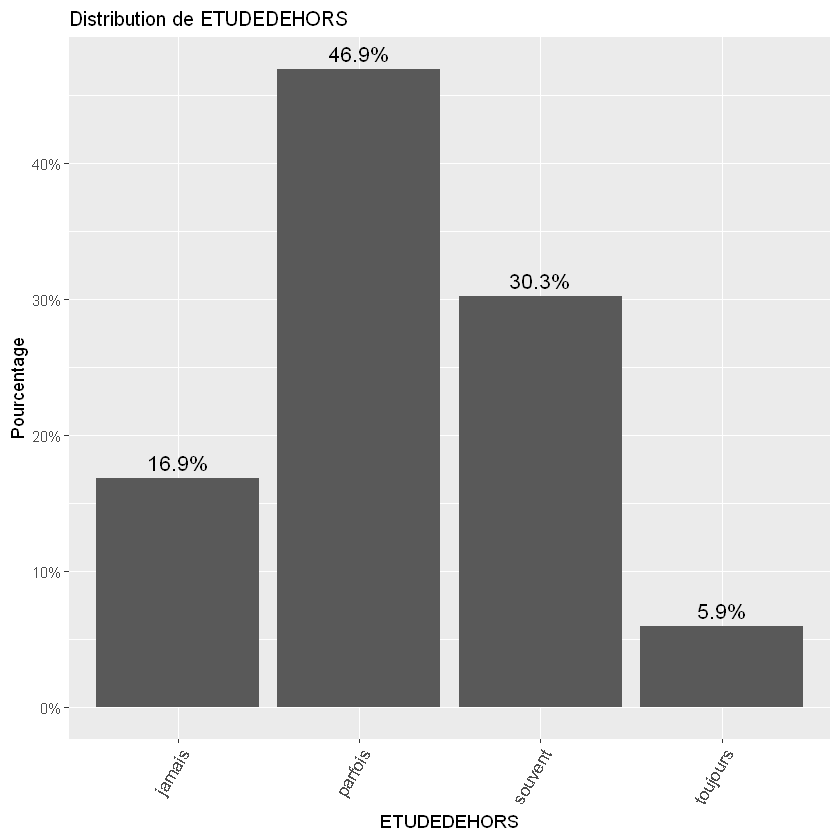

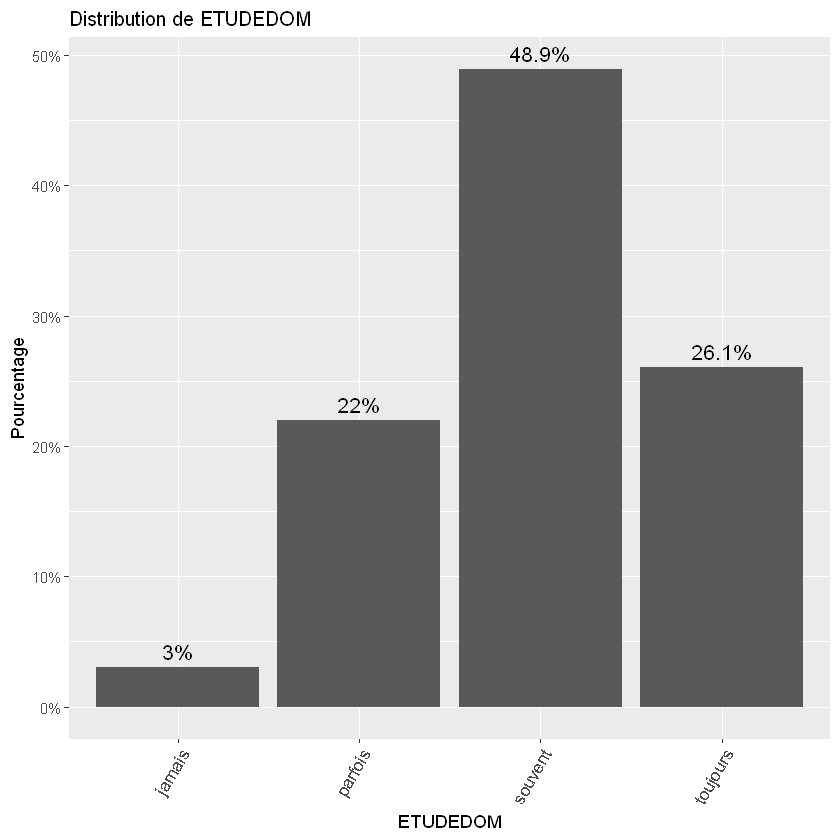

In [32]:
print(plot_distribution(insa_cleaned_1, "ETUDEDEHORS"))
print(plot_distribution(insa_cleaned_1, "ETUDEDOM"))

          
           jamais parfois souvent toujours
  jamais        5       9      12      170
  parfois       2      48     385      111
  souvent       6     161     169       16
  toujours     22      38       3        6


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 908.47, df = 9, p-value < 2.2e-16



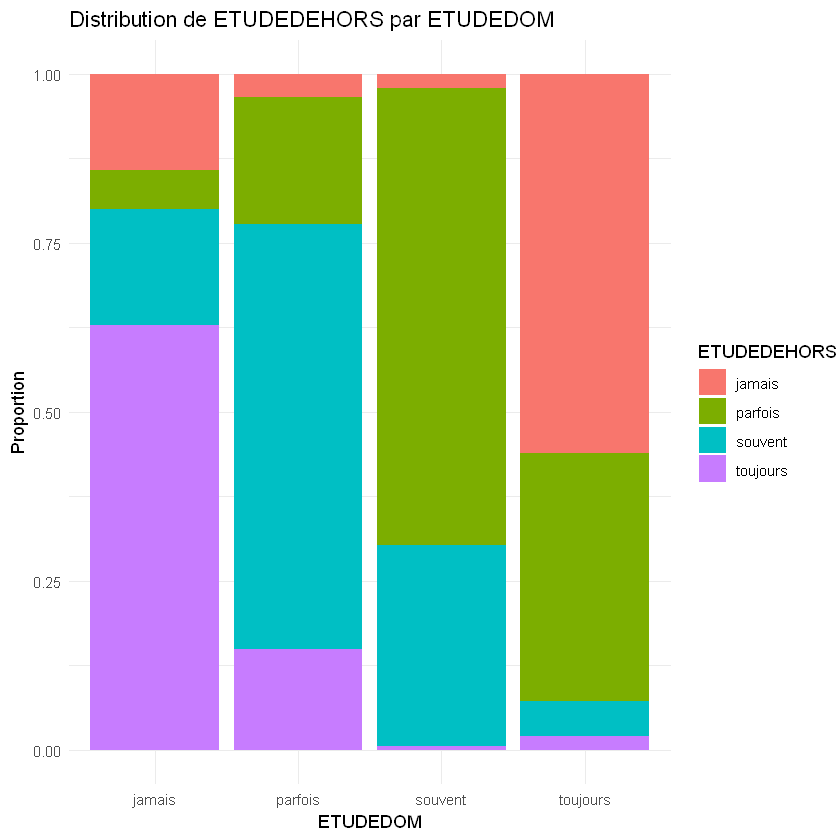

In [33]:
# Créer une table de contingence pour ETUDEDEHORS et ETUDEDOM
contingency_table <- table(insa_cleaned_1$ETUDEDEHORS, insa_cleaned_1$ETUDEDOM)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution de ETUDEDEHORS par ETUDEDOM
ggplot(insa_cleaned_1, aes(x = ETUDEDOM, fill = ETUDEDEHORS)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDEDEHORS par ETUDEDOM',
       x = 'ETUDEDOM',
       y = 'Proportion') +
  theme_minimal()


Nous constatons une opposition entre les variables ETUDEDEHORS et ETUDEDOM, ce qui est compréhensible car ceux qui étudient fréquemment à la maison le font rarement à l'extérieur, et inversement. De plus, le pourcentage élevé d'étudiants qui étudient souvent ou toujours à la maison (75 %) indique que les étudiants préfèrent généralement étudier chez eux plutôt qu'à l'extérieur.

### Variable PRESENCE_CM, PRESENCE_TD et PRESENCE_TP

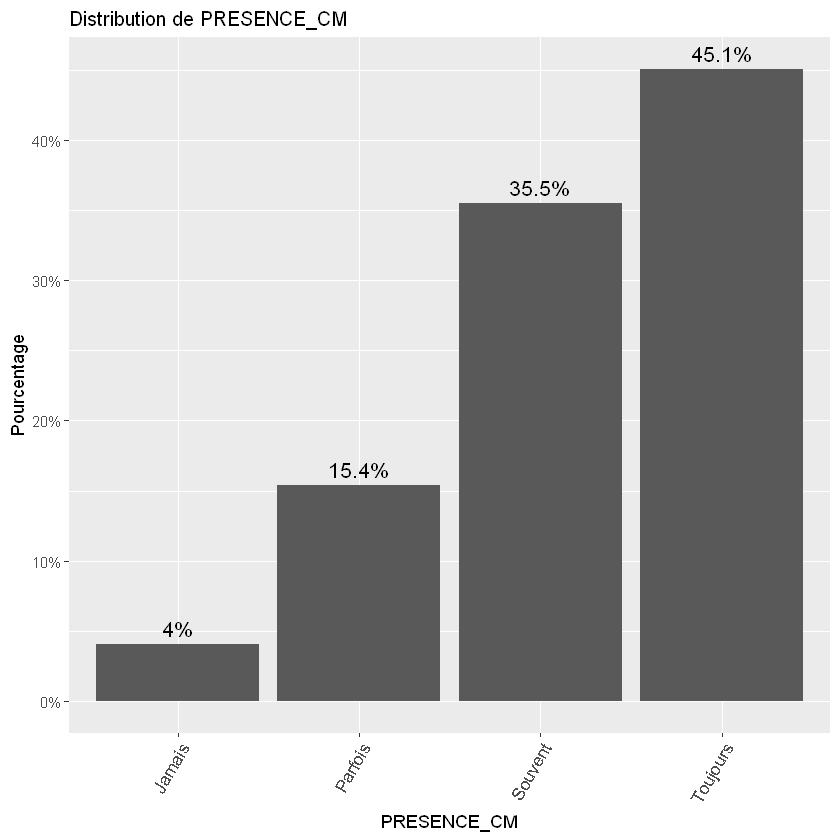

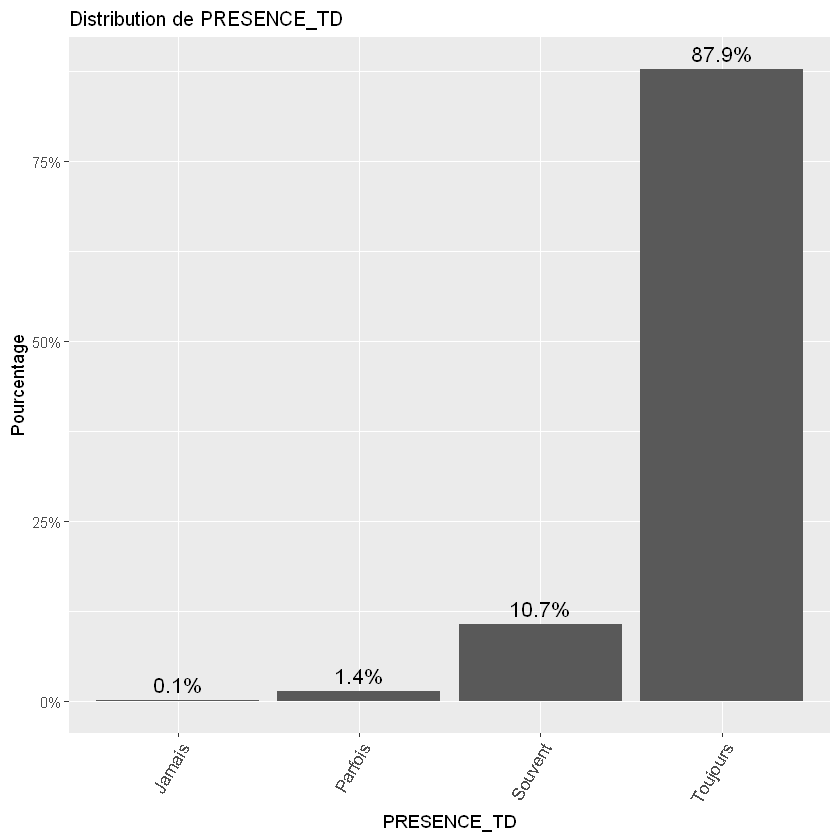

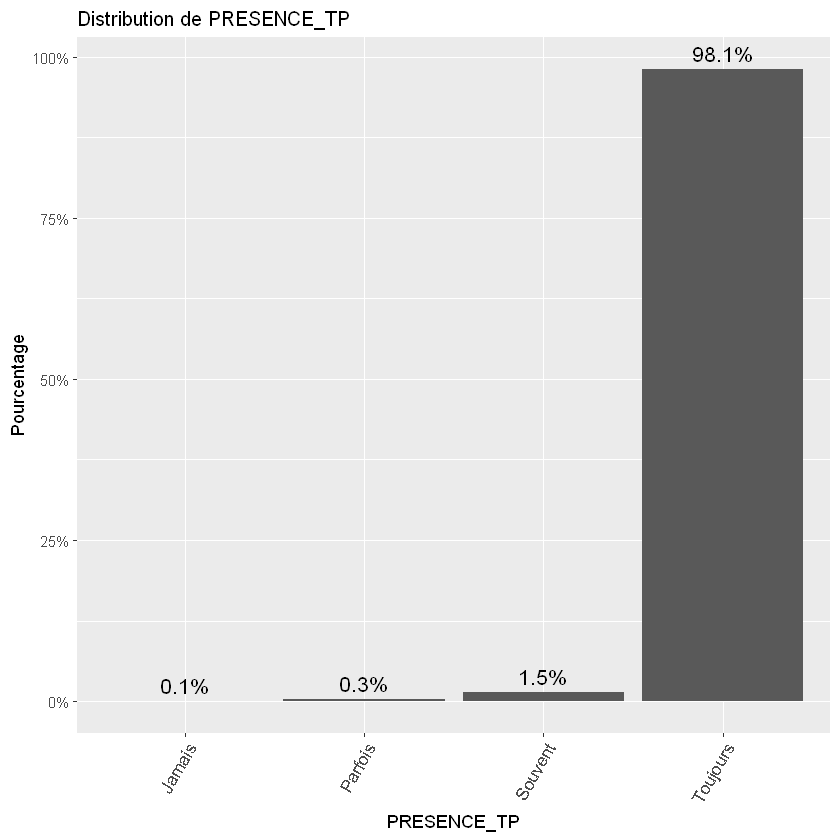

In [34]:
print(plot_distribution(insa_cleaned_1, "PRESENCE_CM"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TD"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TP"))

Nous constatons que la majorité des étudiants (environ 80 %) sont fréquemment ou toujours présents aux cours magistraux (CM). Cependant, il est important de noter qu'une proportion non négligeable, près de 20 %, des étudiants n'assistent qu'occasionnellement ou jamais à ces cours, ce qui mérite notre attention. Cependant, pour les cours de travaux dirigés (TD) et de travaux pratiques (TP), le taux de participation augmente de manière significative : 98,5 % des étudiants assistent fréquemment ou toujours aux TD. Pour les TP, 98,1 % des étudiants y assistent toujours et une participation quasi totale (99,6 %) pour ceux qui assistent fréquemment ou toujours aux TP. Cela peut s'expliquer par le fait que certains étudiants préfèrent apprendre les concepts théoriques des cours magistraux (CM) de manière autonome à la maison et participent davantage aux sessions axées sur les exercices pratiques et les applications concrètes. Cette tendance est compréhensible étant donné que notre école est une école d'ingénieurs, où les étudiants accordent une grande importance à l'apprentissage pratique.

### Variable CONCENTRATION_CM, CONCENTRATION_TD et CONCENTRATION_TP

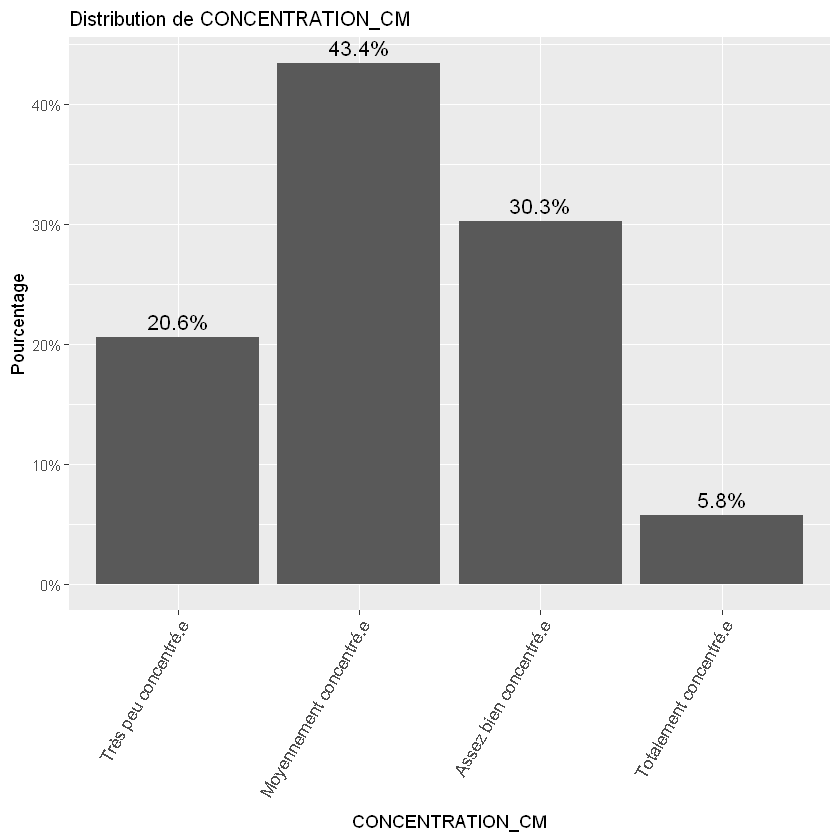

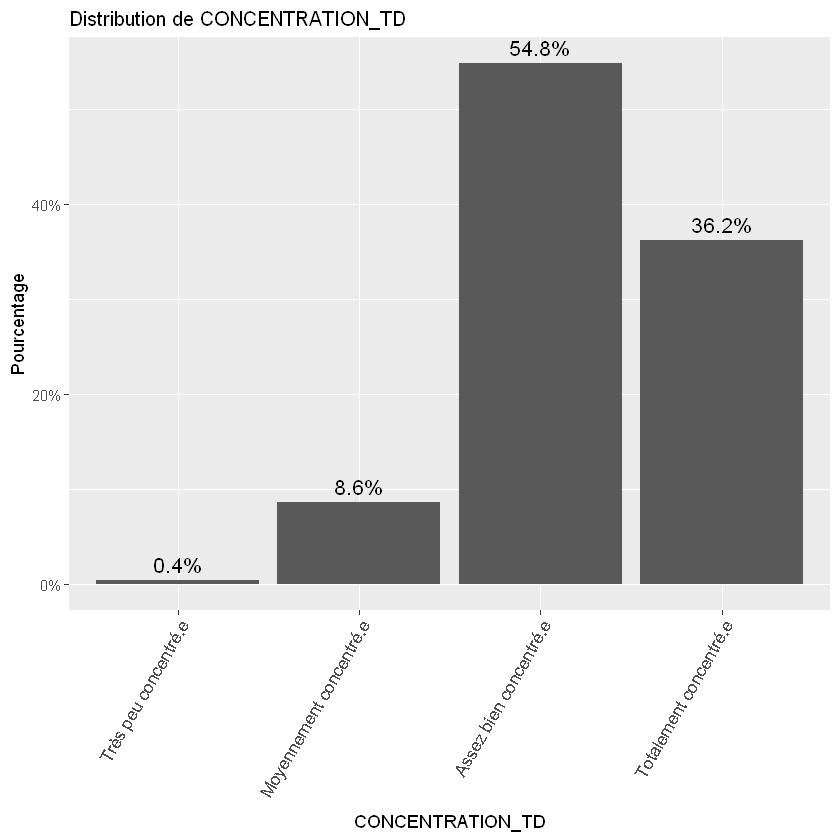

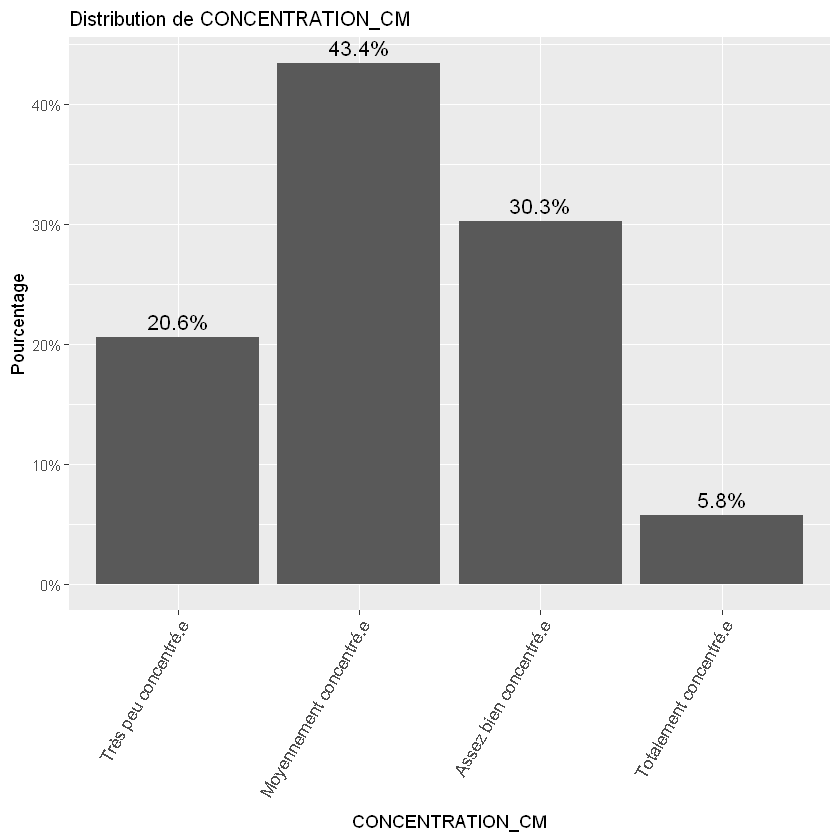

In [35]:
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_CM"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_TD"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_CM"))

Nous pouvons établir un argument similaire avec les variables de présence, en notant que les étudiants ont tendance à se concentrer davantage lors des séances de TD et particulièrement lors des TP. Cependant, une situation préoccupante se dessine : une grande partie des étudiants (64 %) sont peu ou moyennement concentrés. La situation s'améliore considérablement pour les TD et les TP, où plus de 90 % des étudiants sont assez bien ou totalement concentrés.

                         
                          Très peu concentré.e Moyennement concentré.e
  Très peu concentré.e                       5                      64
  Moyennement concentré.e                    0                      23
  Assez bien concentré.e                     0                       8
  Totalement concentré.e                     0                       5
                         
                          Assez bien concentré.e Totalement concentré.e
  Très peu concentré.e                       132                     38
  Moyennement concentré.e                    355                    127
  Assez bien concentré.e                     138                    206
  Totalement concentré.e                      12                     50


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 311.74, df = 9, p-value < 2.2e-16



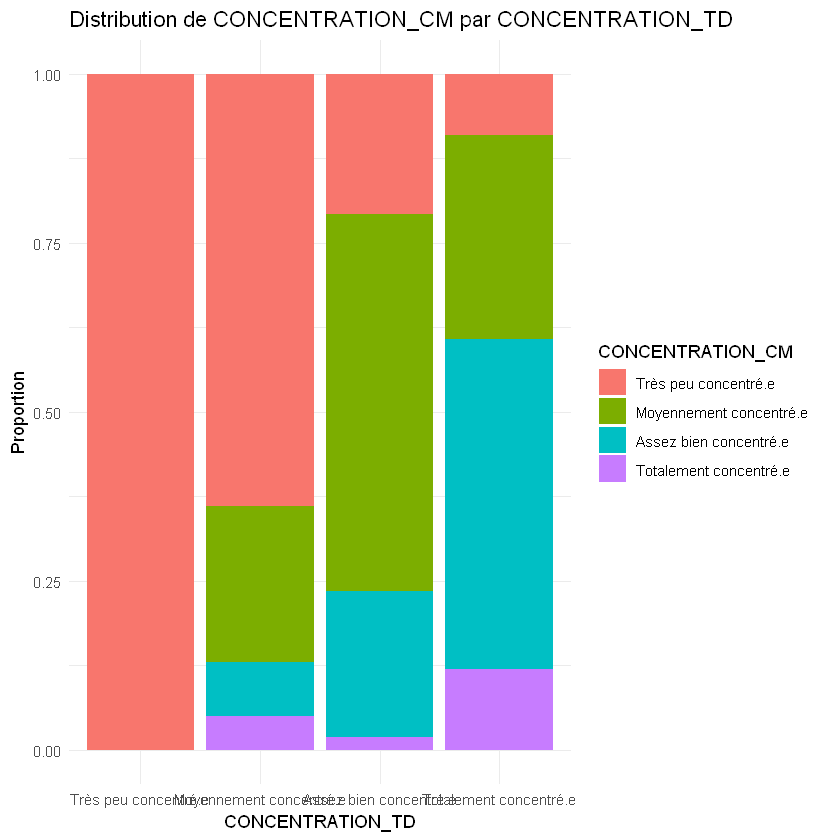

In [36]:
# Créer une table de contingence pour CONCENTRATION_CM et CONCENTRATION_TD
contingency_table <- table(insa_cleaned_1$CONCENTRATION_CM, insa_cleaned_1$CONCENTRATION_TD)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

ggplot(insa_cleaned_1, aes(x = CONCENTRATION_TD, fill = CONCENTRATION_CM)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de CONCENTRATION_CM par CONCENTRATION_TD',
       x = 'CONCENTRATION_TD',
       y = 'Proportion') +
  theme_minimal()


D'après les résultats du test, nous pouvons observer que les variables CONCENTRATION_CM et CONCENTRATION_TD ont une relation significative, et cette relation est proportionnelle. En d'autres termes, les étudiants qui se concentrent bien pendant les cours magistraux (CM) ont tendance à être également concentrés lors des travaux dirigés (TD). Cela est assez compréhensible et prévisible, et j'ai effectué ce test simplement pour le vérifier.

## IV. Analyses statistiques inférentielles

Avant de construire un modèle, on voit un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.
Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

In [37]:
insa_cleaned_2 <- insa_cleaned_1 %>%
  mutate(
    LOGEMENTBIEN = fct_collapse(LOGEMENTBIEN,"plutôt non" = c("pas du tout", "plutôt non")),
    ACT_PRO = fct_collapse(ACT_PRO, "oui +5" = c("oui 5-10h", "oui 10-15h", "oui +15h")),
    COMMENTAIRE = fct_collapse(COMMENTAIRE, "souvent" = c("souvent", "toujours")),
    COMCONSTRUCTIFS = fct_collapse(COMCONSTRUCTIFS, "plutôt non" = c("non", "plutôt non")),
    ETUDE_SEM = fct_collapse(ETUDE_SEM, "-1h" = c("0h", "0-1h"), "+2h" = c("2-4h", "+4h") ),
    ETUDEWE = fct_collapse(ETUDEWE, "-1h" = c("0h", "0-1h")),
    ETUDEGROUPE = fct_collapse(ETUDEGROUPE, "souvent" = c("souvent", "toujours")),
    ETUDEDOM = fct_collapse(ETUDEDOM, "parfois" = c("jamais", "parfois")),
    PRESENCE_CM = fct_collapse(PRESENCE_CM, "Parfois" = c("Jamais", "Parfois")),
    PRESENCE_TD = fct_collapse(PRESENCE_TD, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    PRESENCE_TP = fct_collapse(PRESENCE_TP, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    CONCENTRATION_TD = fct_collapse(CONCENTRATION_TD, "Moyennement concentré.e" = c("Très peu concentré.e", "Moyennement concentré.e")),
    CONCENTRATION_TP = fct_collapse(CONCENTRATION_TP, "Moyennement concentré.e" = c("Très peu concentré.e", "Moyennement concentré.e")),
    PREPCOURS_CM = fct_collapse(PREPCOURS_CM, "Souvent" = c("Souvent", "Toujours")),
    COURSNOTES_TD = fct_collapse(COURSNOTES_TD, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    COURSNOTES_TP = fct_collapse(COURSNOTES_TP, "Parfois" = c("Jamais", "Parfois")),
    REVISIONSDEB = fct_collapse(REVISIONSDEB, "-4 jours avant" = c("3-4 jours avant", "la veille")),
    CONCENTRATIONPERSO = fct_collapse(CONCENTRATIONPERSO, "moyennement" = c("pas du tout", "moyennement")),
    CONDITIONSTRAVAIL = fct_collapse(CONDITIONSTRAVAIL, "moyennes" = c("mauvaises", "moyennes")),
    AMIS = fct_collapse(AMIS, "parfois" = c("jamais", "parfois")),
    ISOLEMENT = fct_collapse(ISOLEMENT, "souvent" = c("souvent", "toujours")),
    ASSOCIATIF = fct_collapse(ASSOCIATIF, "+10h" = c("10-15h", "15-20h", "+20h")),
    ASSOCIATIF_POSITIF = fct_collapse(ASSOCIATIF_POSITIF, "plutôt non" = c("pas du tout", "plutôt non")),
    SPECTACLES = fct_collapse(SPECTACLES, "+1/mois" = c("1/mois", "1/semaine")),
    SPECTACLES_POSITIF = fct_collapse(SPECTACLES_POSITIF, "plutôt non" = c("pas du tout", "plutôt non")),
    SORTIEBAR = fct_collapse(SORTIEBAR, "plusieurs fois/semaine" = c("plusieurs fois/semaine", "tous les jours")),
    DETENTE = fct_collapse(DETENTE, "parfois" = c("jamais", "parfois")),
    ECRANS = fct_collapse(ECRANS, "-2h" = c("0-1h", "1-2h"), "+6h" = c("6-8h", "+8h")),
    ALIMENTATION = fct_collapse(ALIMENTATION, "plutôt non" = c("pas du tout", "plutôt non")),
    #SENSATIONREUSSITE = fct_collapse(SENSATIONREUSSITE, "plutôt non" = c("pas du tout", "plutôt non")),  
    ADEQUATION = fct_collapse(ADEQUATION, "plutôt non" = c("pas du tout", "plutôt non")),
    PREPMETIER = fct_collapse(PREPMETIER, "plutôt non" = c("pas du tout", "plutôt non")),
    COHORTE = fct_collapse(COHORTE, "NORG-IBER-ENG-AS" = c("NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr"), "Arts_Etude" = c("Danse-etude", "Musique-etude", "Theatre-etude")),
    BACTYPE = fct_collapse(BACTYPE, "Fr" = c("Fr", "equi_Fr"))
  )
insa_cleaned_2<- droplevels(insa_cleaned_2[insa_cleaned_2$INTEGRATION != "5A", ])

write_xlsx(insa_cleaned_2, "insa_cleaned_2.xlsx")

In [38]:
# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_2)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_2, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions2.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

D'abord, je souhaite construire un modèle de forêt aléatoire pour tous les étudiants. Pour ce faire, je vais supprimer les variables RATTRAPAGES, REDOUBLEMENT, CLASSEMENTDERNIER, et CLASSEMENT1A, car les étudiants de première année ou les nouveaux entrants n'ont pas de valeurs pour ces variables. Nous allons utiliser la variable cible SENSATIONREUSSITE, car le sentiment de réussir vos études à l’INSA peut décrire la confiance et la certitude des étudiants quant à leurs performances académiques à l'INSA, et c'est une variable applicable à tous les étudiants sondés.

### IV.1 Modèle Randomforest

#### IV.1.1 Analyse pour tous les étudiants

In [39]:
# Supprimer les variables non nécessaires
insa_cleaned_3 <- insa_cleaned_2 %>%
  select(-RATTRAPAGES, -REDOUBLEMENT, -CLASSEMENTDERNIER, -CLASSEMENT1A)

# Vérifier les variables restantes
str(insa_cleaned_3)

write_xlsx(insa_cleaned_3, "insa_cleaned_3.xlsx")

tibble [1,163 × 56] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 3 levels "plutôt non","plutôt oui",..: 3 3 2 3 3 3 3 3 2 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 3 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 4 levels "pas commentaire",..: 1 3 3 3

In [40]:
# Diviser les données en ensembles d'entraînement et de test
set.seed(151) # Fixer le seed pour la reproductibilité
trainIndex <- createDataPartition(insa_cleaned_3$SENSATIONREUSSITE, p = .8, 
                                  list = FALSE, 
                                  times = 1)
insa_train <- insa_cleaned_3[ trainIndex,]
insa_test  <- insa_cleaned_3[-trainIndex,]

In [41]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model <- randomForest(SENSATIONREUSSITE ~ ., data = insa_train, importance = TRUE)

# Évaluer le modèle sur l'ensemble de test
predictions <- predict(rf_model, insa_test)
confusionMatrix(predictions, insa_test$SENSATIONREUSSITE)

Confusion Matrix and Statistics

             Reference
Prediction    pas du tout plutôt non plutôt oui tout à fait
  pas du tout           0          0          0           0
  plutôt non            1          1          0           0
  plutôt oui            7         44        137          32
  tout à fait           0          0          3           6

Overall Statistics
                                          
               Accuracy : 0.6234          
                 95% CI : (0.5575, 0.6861)
    No Information Rate : 0.6061          
    P-Value [Acc > NIR] : 0.3201          
                                          
                  Kappa : 0.0918          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: pas du tout Class: plutôt non Class: plutôt oui
Sensitivity                     0.00000          0.022222           0.97857
Specificity                     1.00000          0.994624     

In [42]:
# Nombre d'arbres
num_trees <- rf_model$ntree
print(paste("Nombre de trees:", num_trees))

# mtry - nombre de variables essayées à chaque split
mtry_value <- rf_model$mtry
print(paste("mtry (nombre de variables testées à chaque split):", mtry_value))

# La profondeur des arbres est implicite et dépend de la taille de l'arbre, 
# mais on peut examiner l'arbre le plus grand:
tree_depths <- max(rf_model$forest$ndbigtree)
print(paste("Profondeur maximale des arbres:", tree_depths))


[1] "Nombre de trees: 500"
[1] "mtry (nombre de variables testées à chaque split): 7"
[1] "Profondeur maximale des arbres: 493"


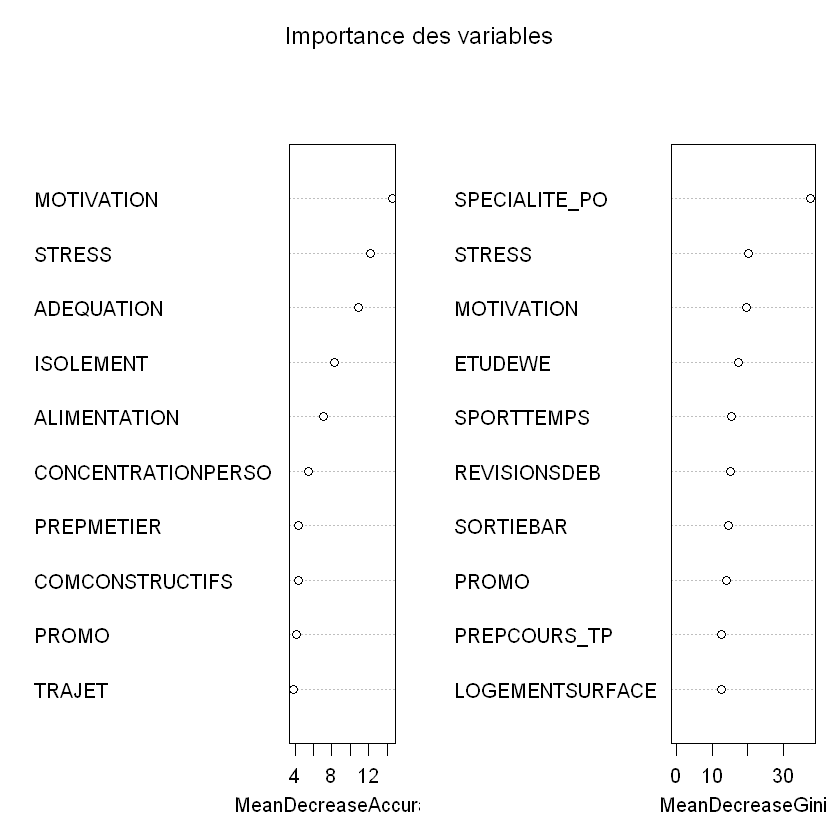

In [43]:
# Extraire l'importance des variables
var_importance <- importance(rf_model)

# Tracer l'importance des variables
varImpPlot(rf_model, 
           sort = TRUE, 
           n.var = 10,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

In [143]:
# Définir une grille de valeurs pour 'mtry'
tune_grid <- expand.grid(mtry = c(20, 40, 60, 80, 100, 120, 140))

# Configurer la méthode de validation croisée
train_control <- trainControl(method = "cv", number = 10)

# Utiliser la fonction 'train' pour trouver les meilleurs hyperparamètres
set.seed(151)
rf_grid_model <- train(SENSATIONREUSSITE ~ ., 
                       data = insa_train, 
                       method = "rf", 
                       trControl = train_control,
                       tuneGrid = tune_grid,
                       ntree = 500,  # Vous pouvez ajuster le nombre d'arbres ici
                       importance = TRUE)

# Résultats du grid search
print(rf_grid_model)

# Meilleur paramètre mtry
best_mtry <- rf_grid_model$bestTune$mtry
print(paste("Meilleur mtry:", best_mtry))

# Évaluer sur l'ensemble de test avec le meilleur modèle
predictions_best <- predict(rf_grid_model, insa_test)
confusionMatrix(predictions_best, insa_test$SENSATIONREUSSITE)


Random Forest 

932 samples
 55 predictor
  4 classes: 'pas du tout', 'plutôt non', 'plutôt oui', 'tout à fait' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 838, 839, 838, 839, 838, 839, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   20   0.6169357  0.1072204
   40   0.6147857  0.1362738
   60   0.6072809  0.1299778
   80   0.6127615  0.1526165
  100   0.6115825  0.1524343
  120   0.6062751  0.1366814
  140   0.6159187  0.1608505

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 20.
[1] "Meilleur mtry: 20"


Confusion Matrix and Statistics

             Reference
Prediction    pas du tout plutôt non plutôt oui tout à fait
  pas du tout           0          0          0           0
  plutôt non            1          5          3           0
  plutôt oui            7         40        133          32
  tout à fait           0          0          4           6

Overall Statistics
                                          
               Accuracy : 0.6234          
                 95% CI : (0.5575, 0.6861)
    No Information Rate : 0.6061          
    P-Value [Acc > NIR] : 0.3201          
                                          
                  Kappa : 0.1222          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: pas du tout Class: plutôt non Class: plutôt oui
Sensitivity                     0.00000           0.11111            0.9500
Specificity                     1.00000           0.97849     

Précédent, j'ai divisé les données en un ensemble d'entraînement et un ensemble de test pour évaluer la capacité de généralisation du modèle, c'est-à-dire sa capacité à s'appliquer à de nouvelles données jamais vues. Cependant, dans notre cas, l'évaluation de la généralisation n'est pas très satisfaisante (seulement environ 60 %). J'ai donc essayé d'utiliser toutes les données pour construire le modèle, car notre objectif est de découvrir les variables importantes dans notre ensemble de données d'élèves sans se préoccuper de la capacité prédictive du modèle.

In [44]:
# Fixer le seed pour la reproductibilité
set.seed(151)

# Construire le modèle Random Forest en utilisant tout le jeu de données
rf_model_full <- randomForest(SENSATIONREUSSITE ~ ., data = insa_cleaned_3, importance = TRUE)

In [45]:
# Prédictions sur le même ensemble de données utilisé pour l'entraînement6234
predictions_full <- predict(rf_model_full, insa_cleaned_3)

# Évaluer les prédictions avec une matrice de confusion
confusion_matrix_full <- confusionMatrix(predictions_full, insa_cleaned_3$SENSATIONREUSSITE)
print(confusion_matrix_full)

Confusion Matrix and Statistics

             Reference
Prediction    pas du tout plutôt non plutôt oui tout à fait
  pas du tout          41          0          0           0
  plutôt non            0        227          0           0
  plutôt oui            0          0        701           0
  tout à fait           0          0          0         194

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9968, 1)
    No Information Rate : 0.6028     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: pas du tout Class: plutôt non Class: plutôt oui
Sensitivity                     1.00000            1.0000            1.0000
Specificity                     1.00000            1.0000            1.0000
Pos Pred Value                 

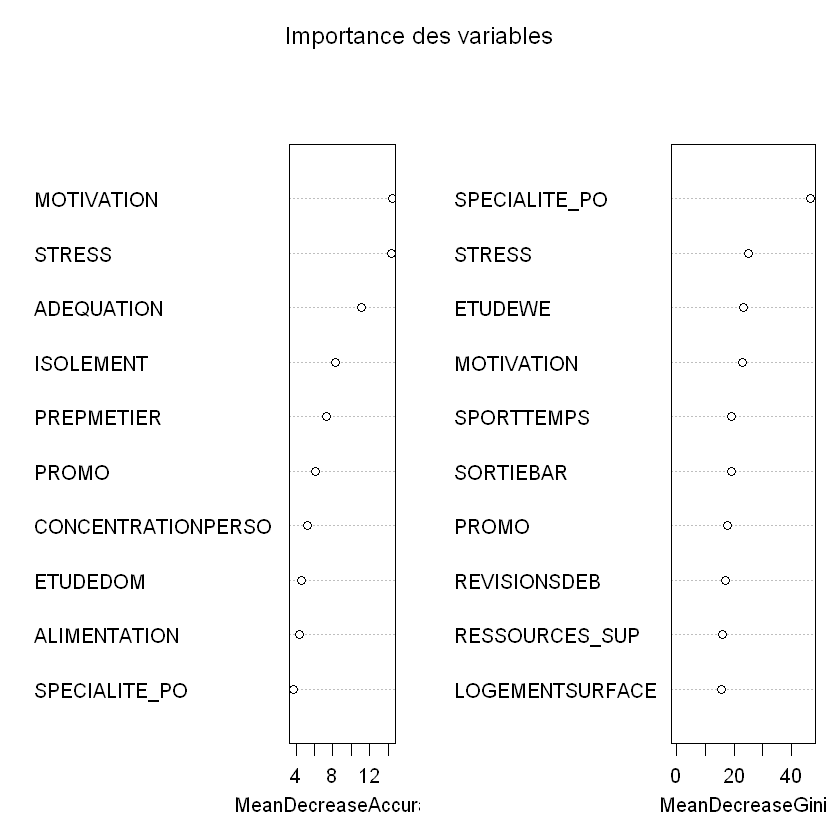

In [46]:
# Évaluer l'importance des variables
importance_values <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 10,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

MeanDecreaseAccuracy :
+ Cet indicateur mesure la diminution de la précision du modèle lorsque la variable concernée est supprimée. Une valeur élevée indique que la variable est cruciale pour la précision du modèle.
+ Par exemple, la variable STRESS avec une valeur de 15.87247744 indique que si cette variable est supprimée, la précision du modèle diminuera de manière significative, ce qui montre que c'est une variable très importante.

MeanDecreaseGini :
+ Cet indicateur mesure la réduction de l'impureté dans les arbres de décision lorsque la variable est utilisée pour diviser les données. Une valeur élevée suggère que la variable est très utile pour effectuer des divisions efficaces dans le modèle.
+ Par exemple, la variable SPECIALITE_PO avec une valeur de 33.783764 montre que cette variable est très importante pour la classification des données et pour la réduction de l'impureté dans le modèle.

Graphique de gauche : MeanDecreaseAccuracy :
+ Les variables telles que STRESS, MOTIVATION et ADEQUATION présentent les valeurs de MeanDecreaseAccuracy les plus élevées, indiquant qu'elles ont un impact important sur la précision du modèle.

Graphique de droite : MeanDecreaseGini :
+ Les variables telles que SPECIALITE_PO, STRESS et MOTIVATION ont des valeurs de MeanDecreaseGini élevées, ce qui signifie qu'elles jouent un rôle clé dans la division efficace des données.

Cas 1 : Variable avec MeanDecreaseAccuracy élevé mais MeanDecreaseGini faible
+ Si une variable a un MeanDecreaseAccuracy élevé mais un MeanDecreaseGini faible, cela signifie que cette variable est essentielle pour maintenir la précision du modèle, mais elle n'est pas fréquemment utilisée pour diviser les données dans les arbres de décision. Cela peut se produire si la variable a une corrélation élevée avec la variable cible, mais n'est utilisée que dans un petit nombre d'arbres de décision.

Cas 2 : Variable avec MeanDecreaseGini élevé mais MeanDecreaseAccuracy faible
+ À l'inverse, si une variable a un MeanDecreaseGini élevé mais un MeanDecreaseAccuracy faible, cela indique que cette variable est souvent utilisée pour effectuer des divisions efficaces dans le modèle, mais que sa suppression n'affecte pas de manière significative la précision globale du modèle. cela peut être dû à la multicolinéarité (une forte corrélation avec une ou plusieurs autres variables). Lorsqu'il existe plusieurs variables corrélées, le modèle peut ne pas dépendre d'une variable spécifique, car l'information qu'elle apporte est déjà fournie par d'autres variables.

**Conclusion:  
Nous allons prioriser les variables ayant des valeurs élevées dans les deux indices, puis nous concentrer principalement sur les variables ayant des valeurs élevées dans l'indice MeanDecreaseAccuracy, car elles ont une forte corrélation avec la variable cible. De plus, nous pourrons également ajouter les variables ayant des valeurs très élevées dans l'indice MeanDecreaseGini.**

Warning message in chisq.test(table(insa_cleaned_3$MOTIVATION, insa_cleaned_3$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$MOTIVATION, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 255.22, df = 9, p-value < 2.2e-16



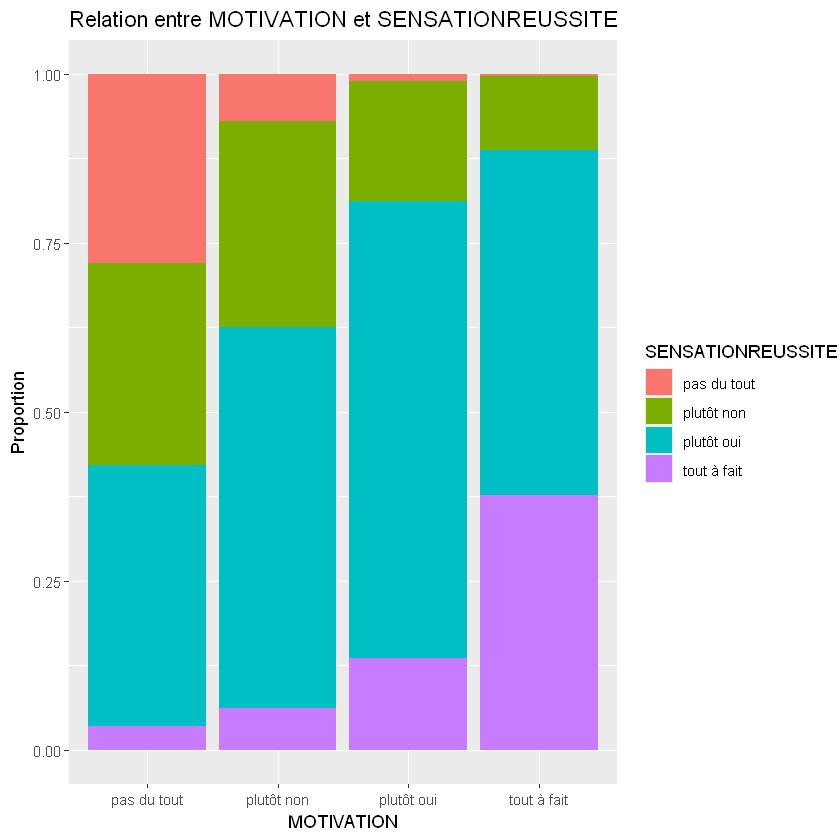

In [47]:
# Vérifier la dépendance de MOTIVATION avec SENSATIONREUSSITE
chi_square_test_motivation <- chisq.test(table(insa_cleaned_3$MOTIVATION, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_motivation)

# Graphique de barres empilées pour MOTIVATION et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = MOTIVATION, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre MOTIVATION et SENSATIONREUSSITE")


Nous pouvons voir que les étudiants ayant plus de motivation ont tendance à se sentir capables de réussir leurs études à l'INSA. Cela peut s'expliquer par le fait que, s'ils sont motivés, ils feront des efforts dans leurs études, ce qui peut leur permettre d'obtenir de bons résultats et de se sentir capables de réussir à l'INSA. À l'inverse, ceux qui ont une faible motivation ont tendance à se sentir moins capables de réussir leurs études à l'INSA.


	Pearson's Chi-squared test

data:  table(insa_cleaned_3$ADEQUATION, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 125.7, df = 6, p-value < 2.2e-16



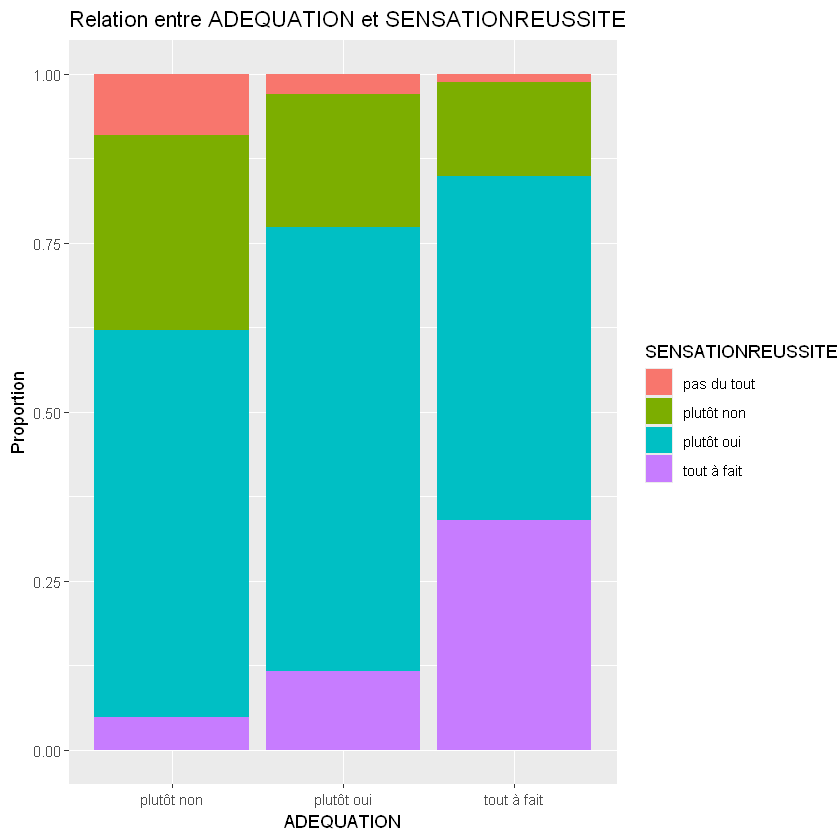

In [48]:
# Vérifier la dépendance de ADEQUATION avec SENSATIONREUSSITE
chi_square_test_adequation <- chisq.test(table(insa_cleaned_3$ADEQUATION, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_adequation)

# Graphique de barres empilées pour ADEQUATION et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = ADEQUATION, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ADEQUATION et SENSATIONREUSSITE")



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$ISOLEMENT, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 65.446, df = 6, p-value = 3.498e-12



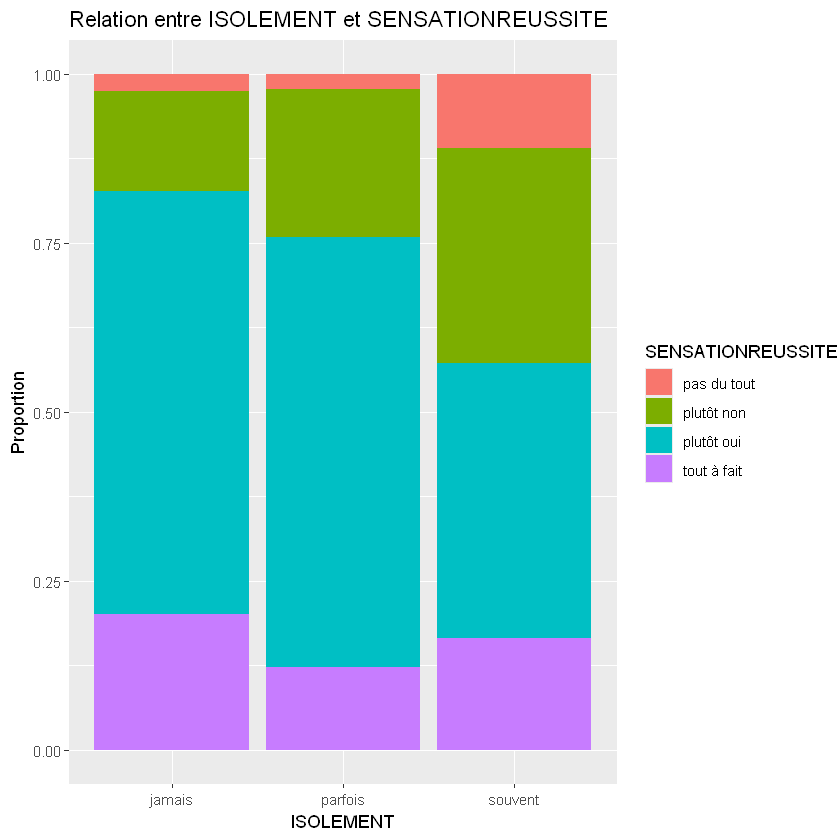

In [49]:
# Vérifier la dépendance de ISOLEMENT avec SENSATIONREUSSITE
chi_square_test_isolement <- chisq.test(table(insa_cleaned_3$ISOLEMENT, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_isolement)

# Graphique de barres empilées pour ISOLEMENT et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = ISOLEMENT, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ISOLEMENT et SENSATIONREUSSITE")



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$PREPMETIER, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 112.97, df = 6, p-value < 2.2e-16



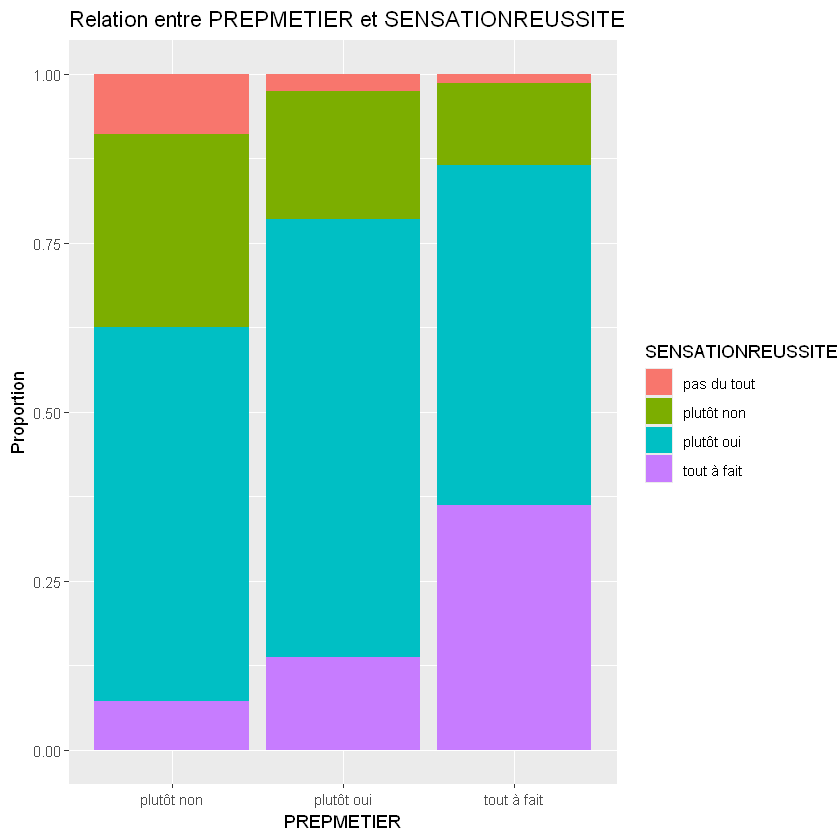

In [50]:
# Vérifier la dépendance de PREPMETIER avec SENSATIONREUSSITE
chi_square_test_prepmeter <- chisq.test(table(insa_cleaned_3$PREPMETIER, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_prepmeter)

# Graphique de barres empilées pour PREPMETIER et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = PREPMETIER, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre PREPMETIER et SENSATIONREUSSITE")


Warning message in chisq.test(table(insa_cleaned_3$COMCONSTRUCTIFS, insa_cleaned_3$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$COMCONSTRUCTIFS, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 36.461, df = 9, p-value = 3.283e-05



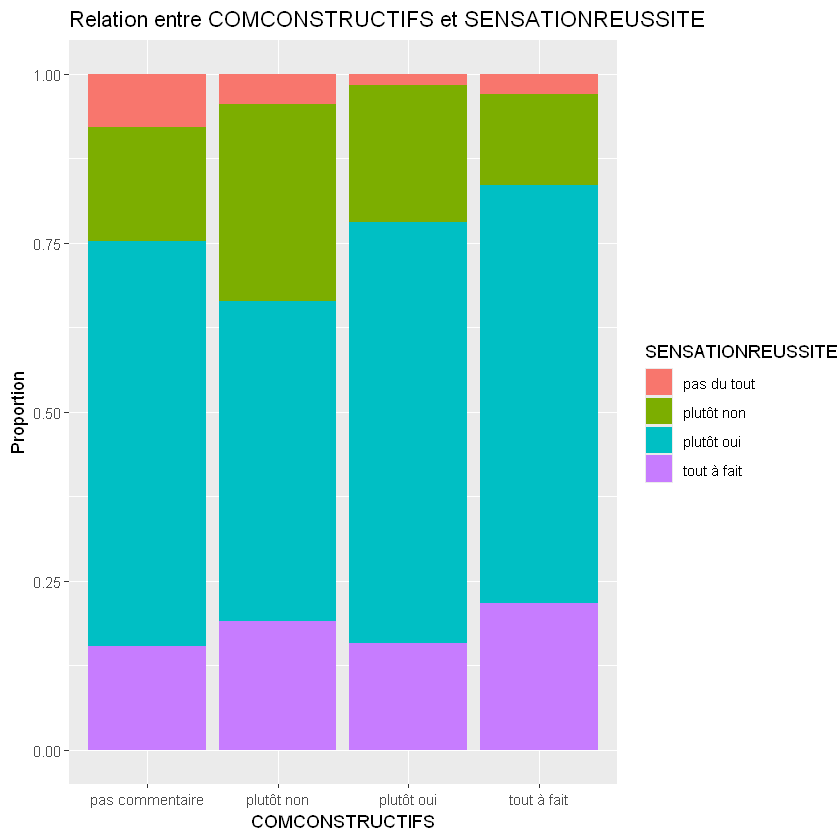

In [51]:
# Vérifier la dépendance de COMCONSTRUCTIFS avec SENSATIONREUSSITE
chi_square_test_comconstructifs <- chisq.test(table(insa_cleaned_3$COMCONSTRUCTIFS, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_comconstructifs)

# Graphique de barres empilées pour COMCONSTRUCTIFS et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = COMCONSTRUCTIFS, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre COMCONSTRUCTIFS et SENSATIONREUSSITE")



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$CONCENTRATIONPERSO, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 105.23, df = 6, p-value < 2.2e-16



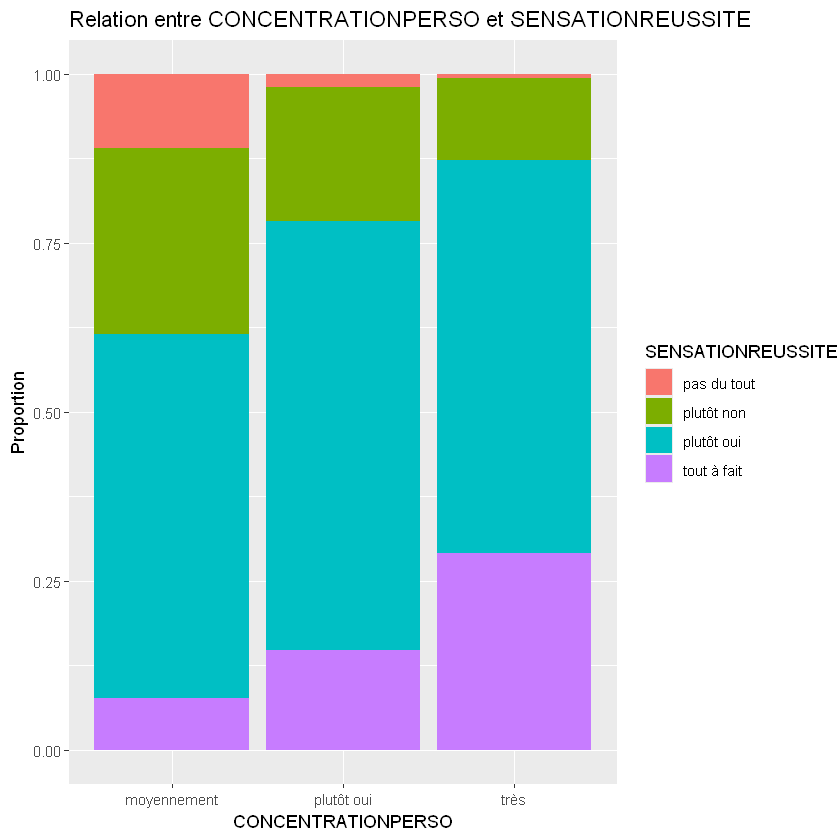

In [52]:
# Vérifier la dépendance de CONCENTRATIONPERSO avec SENSATIONREUSSITE
chi_square_test_concentrationperso <- chisq.test(table(insa_cleaned_3$CONCENTRATIONPERSO, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_concentrationperso)

# Graphique de barres empilées pour CONCENTRATIONPERSO et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = CONCENTRATIONPERSO, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre CONCENTRATIONPERSO et SENSATIONREUSSITE")


Nous pouvons constater que le stress et le sentiment de pouvoir réussir les études à l’INSA sont inversement proportionnels. Ceux qui sont moins stressés ont tendance à se sentir plus capables de réussir leurs études à l’INSA, tandis que ceux qui sont fréquemment stressés ont un sentiment de réussite plus faible. Par conséquent, il est également nécessaire d'examiner quelles variables influencent le stress des étudiants afin de trouver des moyens de le réduire.

Warning message in chisq.test(table(insa_cleaned_3$SPECIALITE_PO, insa_cleaned_3$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$SPECIALITE_PO, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 73.587, df = 39, p-value = 0.0006737



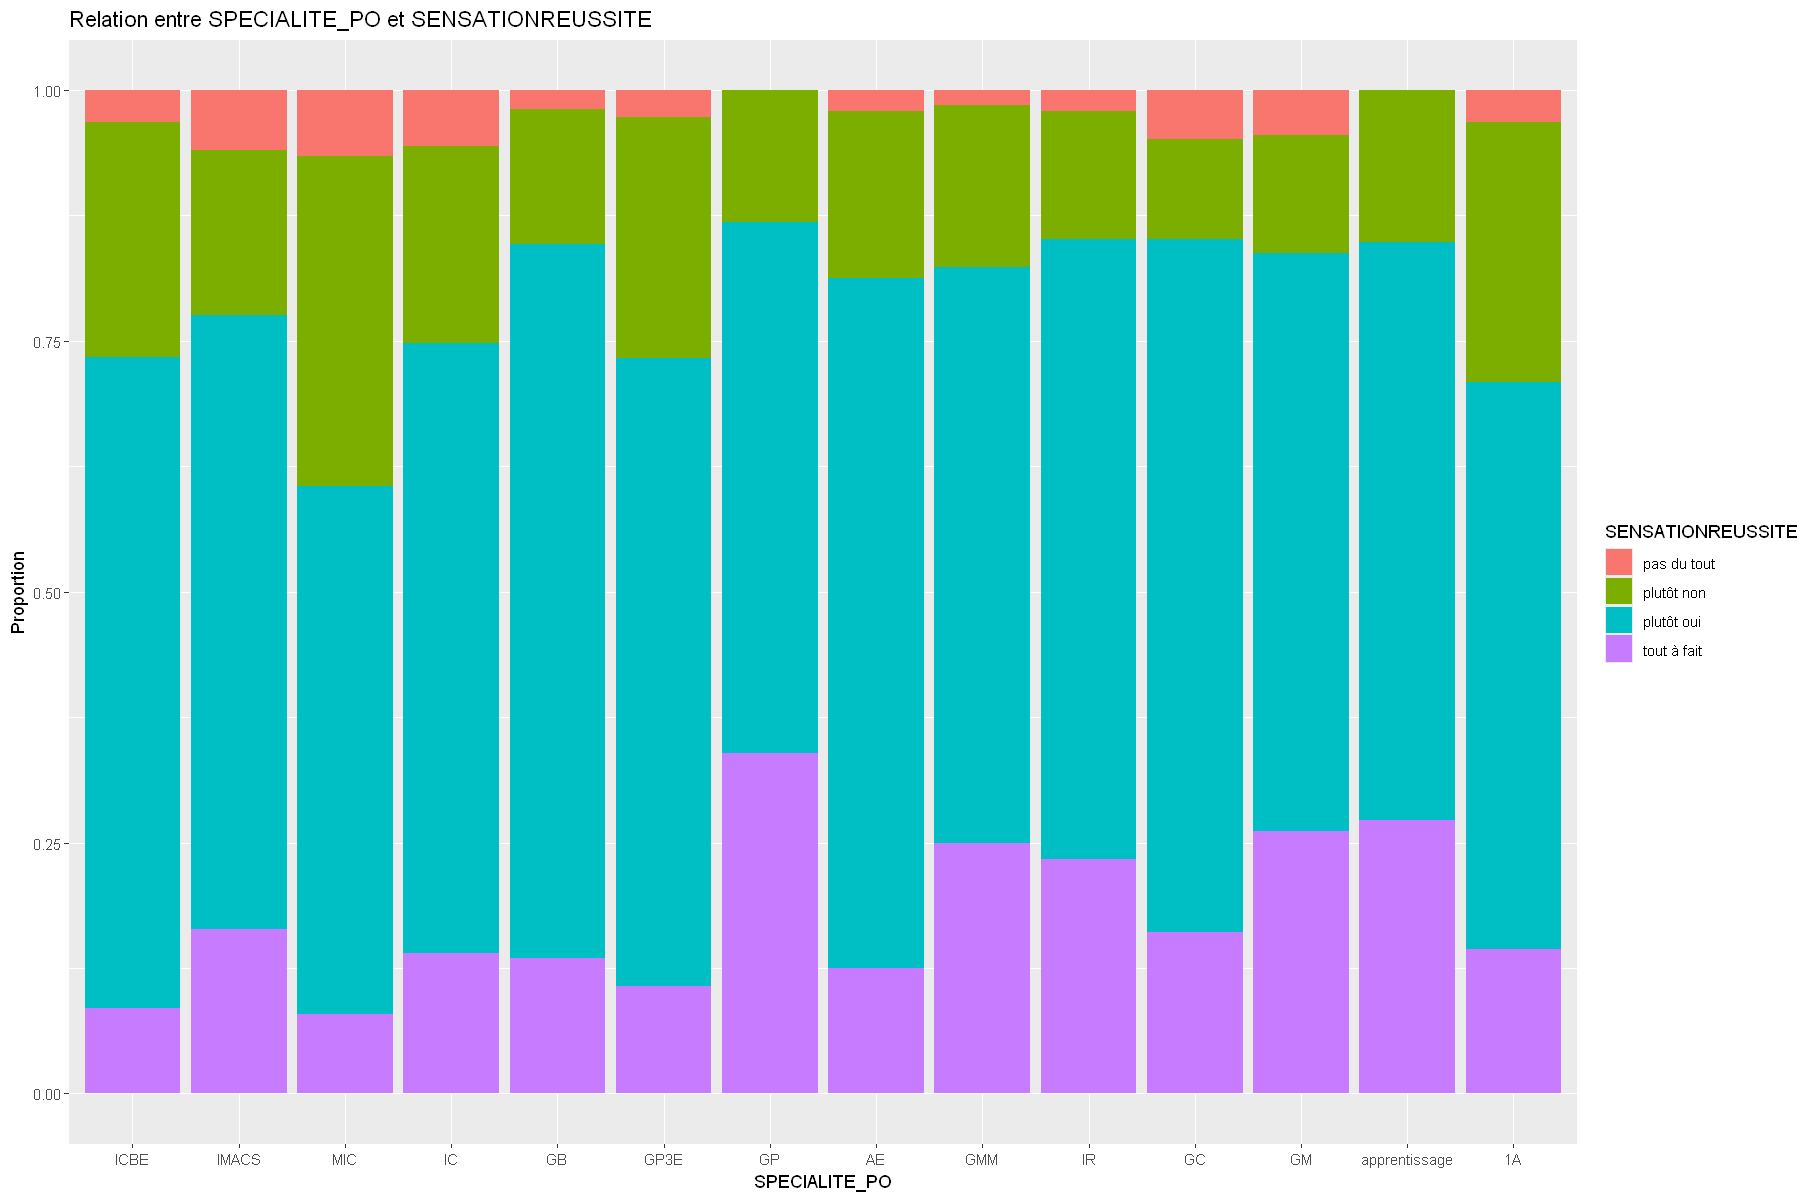

In [53]:
# Vérifier la dépendance de SPECIALITE_PO avec SENSATIONREUSSITE
chi_square_test_specialite_po <- chisq.test(table(insa_cleaned_3$SPECIALITE_PO, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_specialite_po)

with(options(repr.plot.width = 15, repr.plot.height = 10), {
    # Graphique de barres empilées pour SPECIALITE_PO et SENSATIONREUSSITE
    ggplot(insa_cleaned_3, aes(x = SPECIALITE_PO, fill = SENSATIONREUSSITE)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = "Relation entre SPECIALITE_PO et SENSATIONREUSSITE")
})



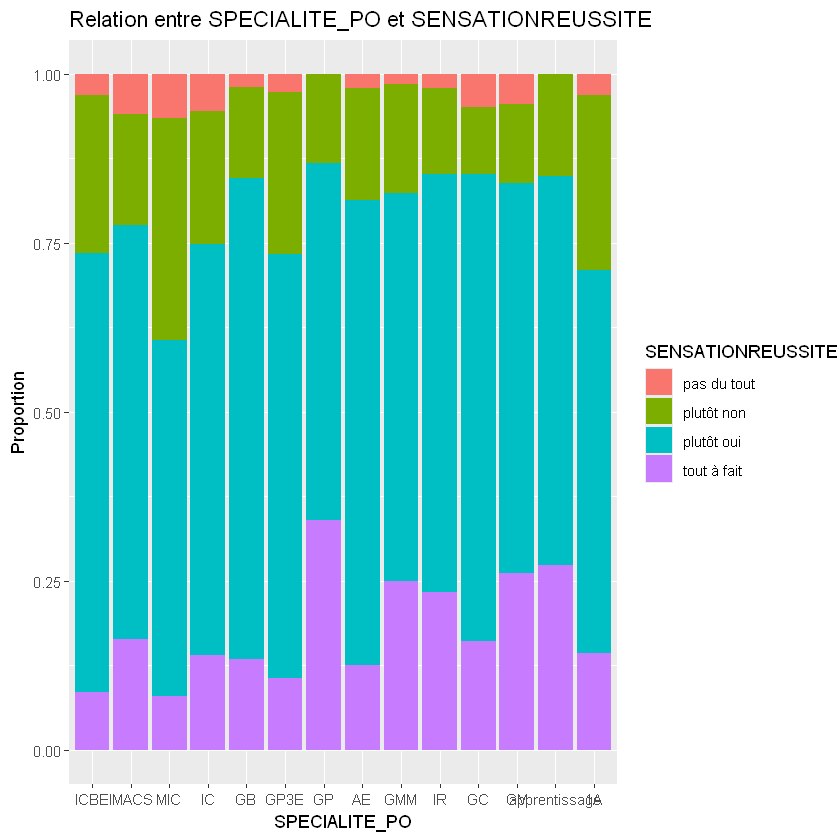

In [53]:
# Graphique de barres empilées pour SPECIALITE_PO et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = SPECIALITE_PO, fill = SENSATIONREUSSITE)) +
geom_bar(position = "fill") +
labs(y = "Proportion", title = "Relation entre SPECIALITE_PO et SENSATIONREUSSITE")

Nous constatons que les étudiants de la filière MIC sont ceux qui ont le sentiment de réussite à l'INSA le plus faible (environ 40 % des étudiants ressentent plutôt non ou pas du tout). Cela peut s'expliquer par la charge de travail importante en deuxième et troisième années de MIC, qui comprend beaucoup de théories en mathématiques et en physique nécessitant des calculs complexes. Ensuite viennent les filières ICBE, GP3E et 1A. De plus, les groupes d'étudiants qui croient le plus en leur capacité à réussir leurs études à l'INSA sont ceux des filières GP, apprentissage et GC. 
Une observation particulière est que les étudiants de PO MIC se sentent les moins capables de réussir à l'INSA, alors que les étudiants de GMM et IR se sentent relativement confiants quant à leur réussite. Cela est logique, car après avoir surmonté les deux années difficiles de PO, ils se sentent plus assurés.

Warning message in chisq.test(table(insa_cleaned_3$ETUDEWE, insa_cleaned_3$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_3$ETUDEWE, insa_cleaned_3$SENSATIONREUSSITE)
X-squared = 17.024, df = 15, p-value = 0.3174



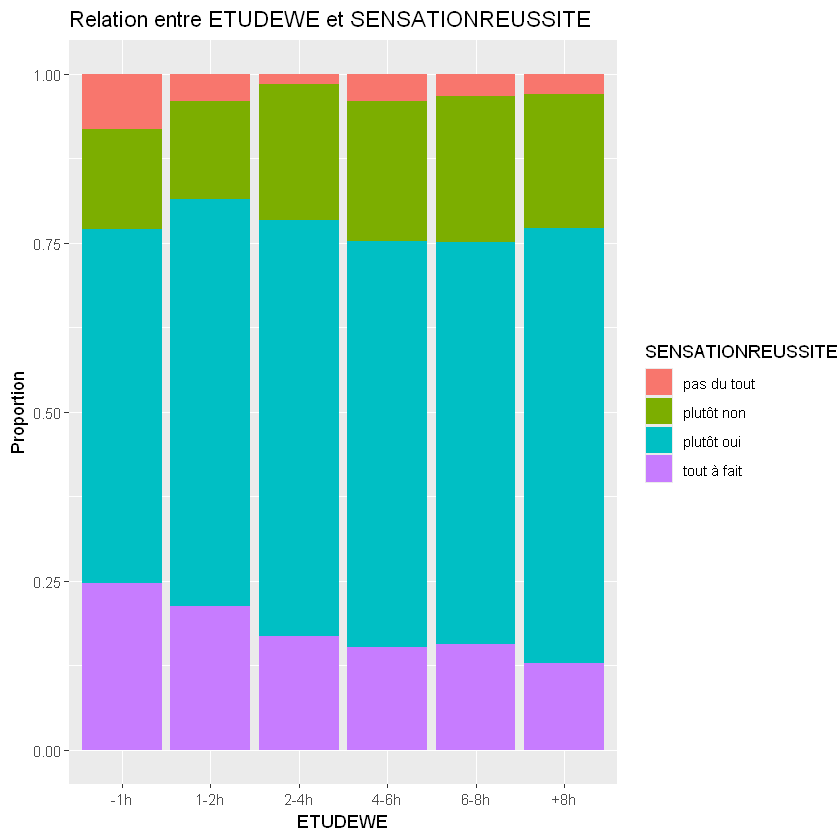

In [54]:
# Vérifier la dépendance de ETUDEWE avec SENSATIONREUSSITE
chi_square_test_etudewe <- chisq.test(table(insa_cleaned_3$ETUDEWE, insa_cleaned_3$SENSATIONREUSSITE))
print(chi_square_test_etudewe)

# Graphique de barres empilées pour ETUDEWE et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = ETUDEWE, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ETUDEWE et SENSATIONREUSSITE")


Nous constatons qu'il n'y a pas beaucoup de dépendance entre les deux variables ETUDEWE et SENSATIONREUSSITE.

**Nous constatons que l'analyse de la variable SENSATIONREUSSITE, qui est légèrement biaisée vers les sensations ou les perceptions subjectives des étudiants, dépend également de variables liées aux sentiments personnels, telles que MOTIVATION, STRESS, ADÉQUATION, ISOLEMENT et PRÉPMÉTIER.**

#### IV.1.2. Analyse pour les étudiants qui ne sont pas 1A ou nouveaux entrants (NE)

In [55]:
# Filtrage des données pour exclure les étudiants de la 1A ou en intégration
group2 <- insa_cleaned_2 %>%
  filter(PROMO != "1A" & PROMO != "INTEGRATION")

# Afficher les données filtrées
str(group2)

# Sauvegarder les données filtrées dans un fichier Excel
write_xlsx(group2, "group2.xlsx")

tibble [912 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 3 levels "plutôt non","plutôt oui",..: 3 3 2 3 3 3 3 3 2 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 3 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 4 levels "pas commentaire",..: 1 3 3 3 3

In [56]:
# Fixer le seed pour la reproductibilité
set.seed(151)

# Construire le modèle Random Forest en utilisant tout le jeu de données
rf_model_ne <- randomForest(RATTRAPAGES ~ ., data = group2, importance = TRUE)


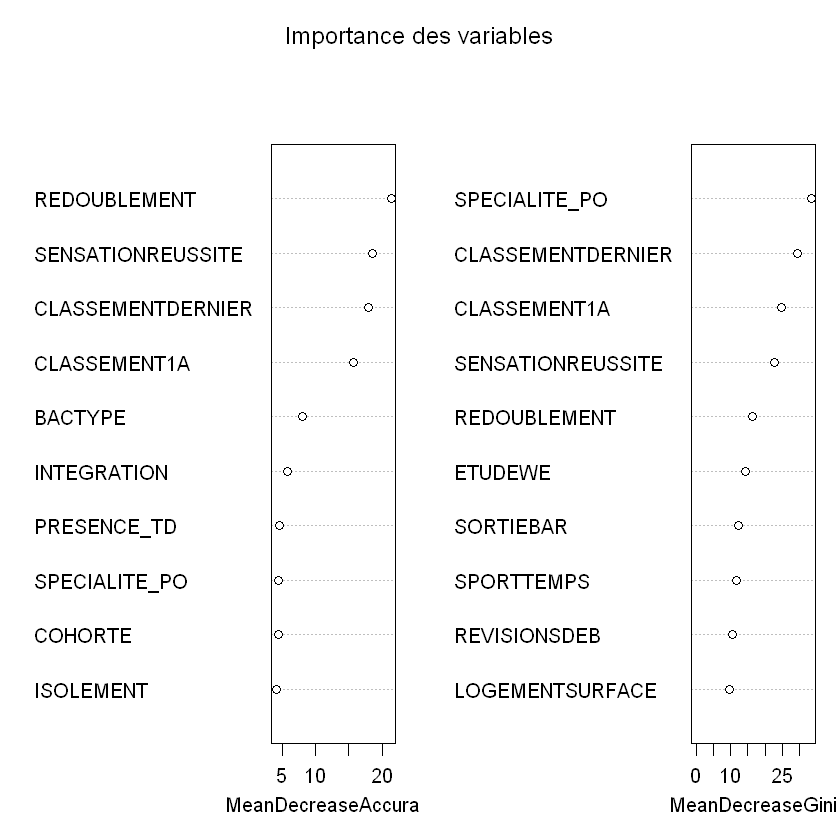

In [57]:
# Tracer l'importance des variables
varImpPlot(rf_model_ne, 
           sort = TRUE, 
           n.var = 10,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

Le graphique ci-dessus montre que les variables SENSATIONREUSSITE et RATTRAPAGES sont étroitement liées. Par conséquent, il est logique d'utiliser la variable SENSATIONREUSSITE pour étudier tous les étudiants lorsqu'il n'est pas possible d'utiliser la variable RATTRAPAGES.

De plus, nous constatons que les variables RATTRAPAGES, SENSATIONREUSSITE, REDOUBLEMENT, CLASSEMENT1A et CLASSEMENTDERNIER sont fortement corrélées, au point de pouvoir être considérées comme décrivant le même phénomène. Pour cette raison, je vais supprimer les variables SENSATIONREUSSITE, REDOUBLEMENT, CLASSEMENT1A et CLASSEMENTDERNIER avant d'analyser RATTRAPAGES, afin de pouvoir identifier d'autres variables qui influencent la réussite des étudiants.

In [58]:
# Test du chi carré entre RATTRAPAGES et SENSATIONREUSSITE
chi_sq_sensation <- chisq.test(table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE))
print(chi_sq_sensation)

# Test du chi carré entre RATTRAPAGES et REDOUBLEMENT
chi_sq_redoublement <- chisq.test(table(group2$RATTRAPAGES, group2$REDOUBLEMENT))
print(chi_sq_redoublement)

# Test du chi carré entre RATTRAPAGES et CLASSEMENT1A
chi_sq_classement1a <- chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENT1A))
print(chi_sq_classement1a)

# Test du chi carré entre RATTRAPAGES et CLASSEMENTDERNIER
chi_sq_classementdernier <- chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER))
print(chi_sq_classementdernier)

Warning message in chisq.test(table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE)
X-squared = 203.55, df = 9, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$REDOUBLEMENT)
X-squared = 132.73, df = 3, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENT1A)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$CLASSEMENT1A)
X-squared = 179.13, df = 21, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER)
X-squared = 204.33, df = 15, p-value < 2.2e-16



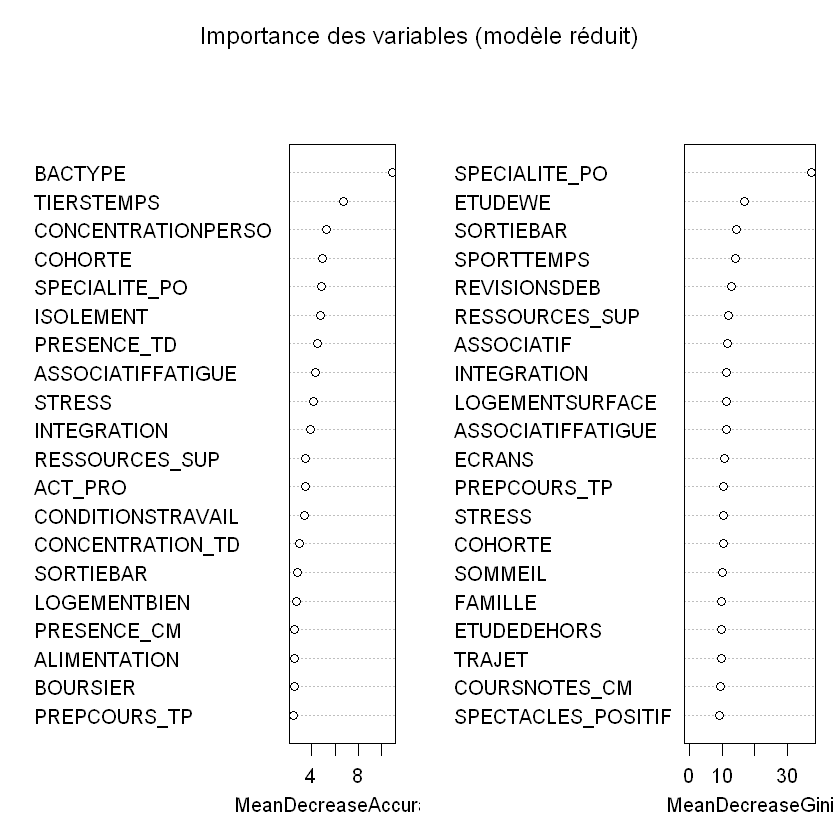

In [59]:
# Suppression des variables ayant une influence trop forte
group2_reduced <- group2 %>%
  select(-SENSATIONREUSSITE, -REDOUBLEMENT, -CLASSEMENT1A, -CLASSEMENTDERNIER)

# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_reduced <- randomForest(RATTRAPAGES ~ ., data = group2_reduced, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_reduced)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_reduced, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables (modèle réduit)")

Warning message in chisq.test(table(group2_reduced$BACTYPE, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$BACTYPE, group2_reduced$RATTRAPAGES)
X-squared = 39.215, df = 6, p-value = 6.495e-07



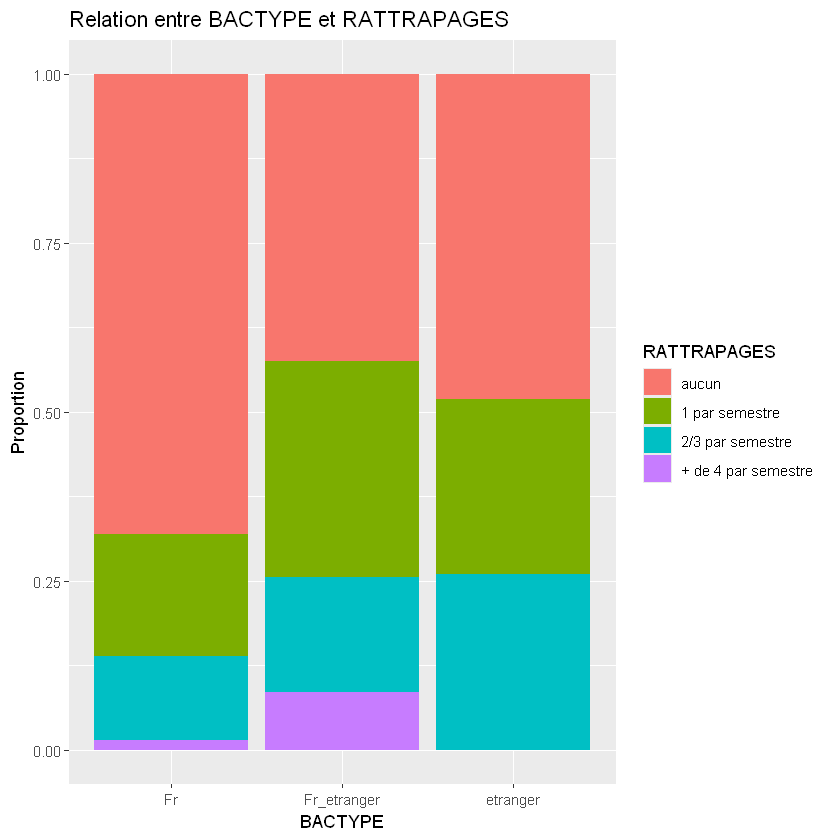

In [60]:
# Vérifier la dépendance de BACTYPE avec RATTRAPAGES
chi_square_test_bactype <- chisq.test(table(group2_reduced$BACTYPE, group2_reduced$RATTRAPAGES))
print(chi_square_test_bactype)

# Graphique de barres empilées pour BACTYPE et RATTRAPAGES
ggplot(group2_reduced, aes(x = BACTYPE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre BACTYPE et RATTRAPAGES")



	Pearson's Chi-squared test

data:  table(group2_reduced$BACTYPE, group2_reduced$ISOLEMENT)
X-squared = 44.103, df = 4, p-value = 6.107e-09



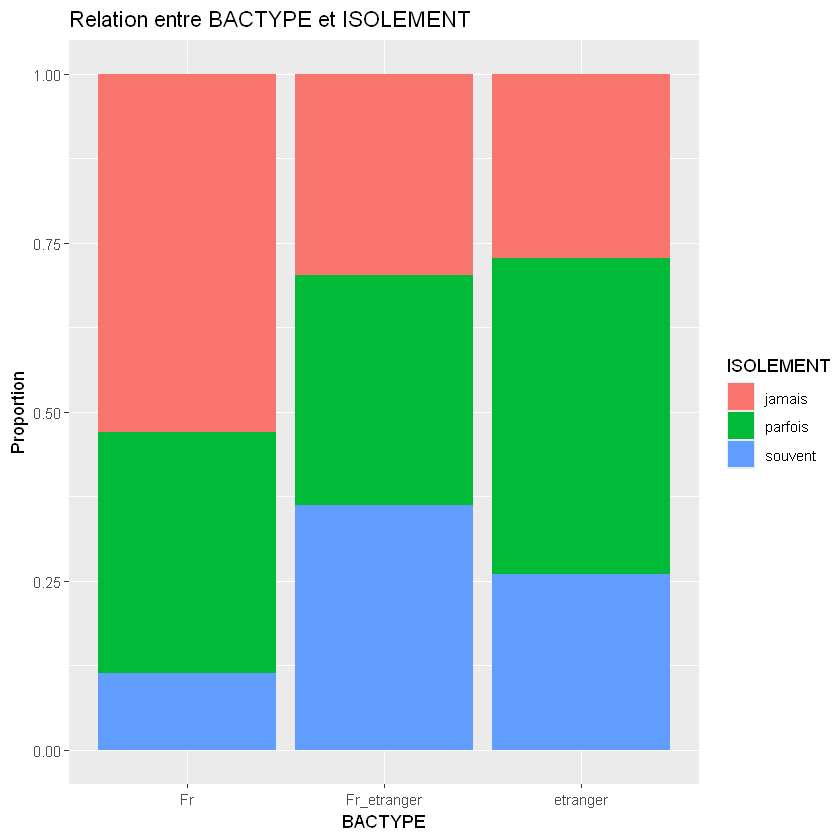

In [61]:
# Vérifier la dépendance de BACTYPE avec ISOLEMENT
chi_square_test_bactype <- chisq.test(table(group2_reduced$BACTYPE, group2_reduced$ISOLEMENT))
print(chi_square_test_bactype)

# Graphique de barres empilées pour BACTYPE et ISOLEMENT
ggplot(group2_reduced, aes(x = BACTYPE, fill = ISOLEMENT)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre BACTYPE et ISOLEMENT")


Warning message in chisq.test(table(group2_reduced$COHORTE, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$COHORTE, group2_reduced$RATTRAPAGES)
X-squared = 31.277, df = 15, p-value = 0.008063



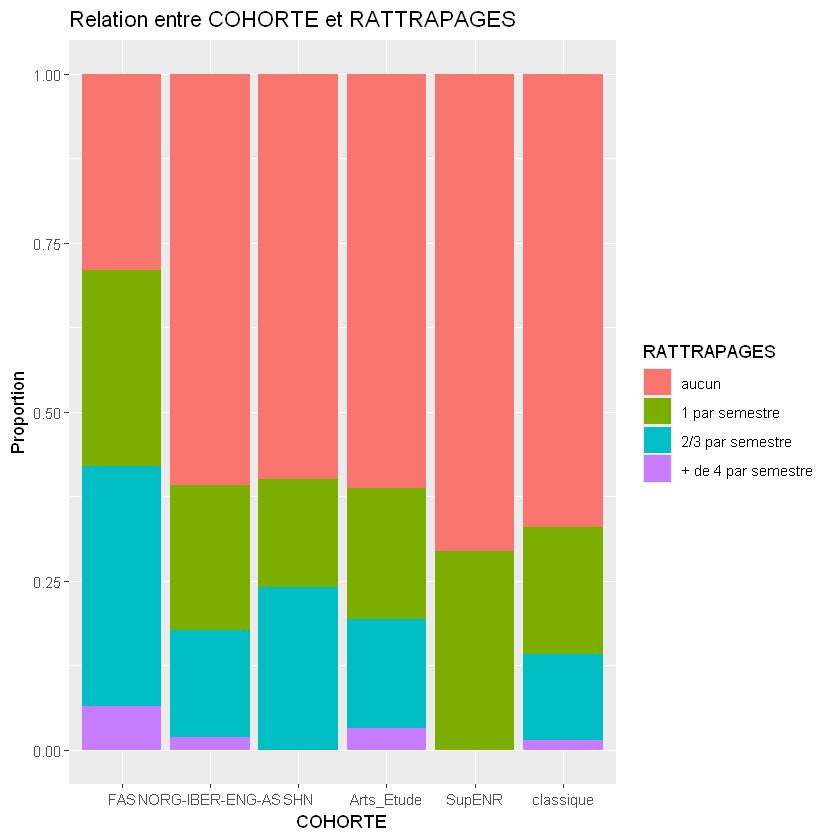

In [62]:
# Vérifier la dépendance de COHORTE avec RATTRAPAGES
chi_square_test_cohorte <- chisq.test(table(group2_reduced$COHORTE, group2_reduced$RATTRAPAGES))
print(chi_square_test_cohorte)

# Graphique de barres empilées pour COHORTE et RATTRAPAGES
ggplot(group2_reduced, aes(x = COHORTE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre COHORTE et RATTRAPAGES")


In [63]:
count_supenr <- sum(group2_reduced$COHORTE == "SupENR")
print(count_supenr)

[1] 17


In [64]:
print(sum(group2_reduced$COHORTE == 'FAS'))


[1] 31


Warning message in chisq.test(table(group2_reduced$ISOLEMENT, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$ISOLEMENT, group2_reduced$RATTRAPAGES)
X-squared = 30.007, df = 6, p-value = 3.919e-05



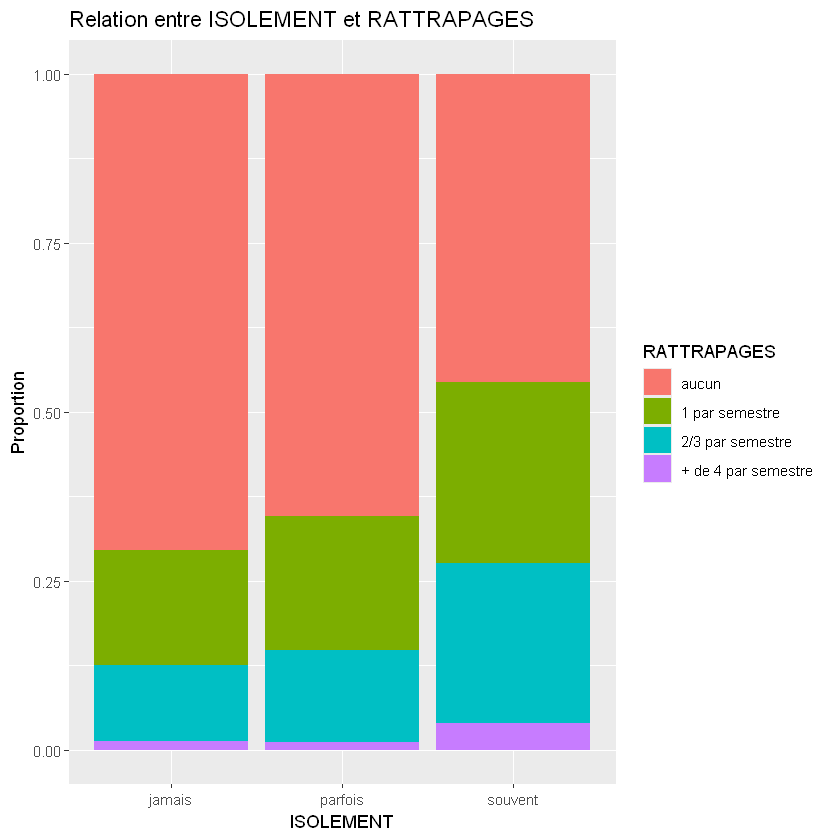

In [65]:
# Vérifier la dépendance de ISOLEMENT avec RATTRAPAGES
chi_square_test_isolement <- chisq.test(table(group2_reduced$ISOLEMENT, group2_reduced$RATTRAPAGES))
print(chi_square_test_isolement)

# Graphique de barres empilées pour ISOLEMENT et RATTRAPAGES
ggplot(group2_reduced, aes(x = ISOLEMENT, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ISOLEMENT et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$TIERSTEMPS, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$TIERSTEMPS, group2_reduced$RATTRAPAGES)
X-squared = 8.4878, df = 3, p-value = 0.03694



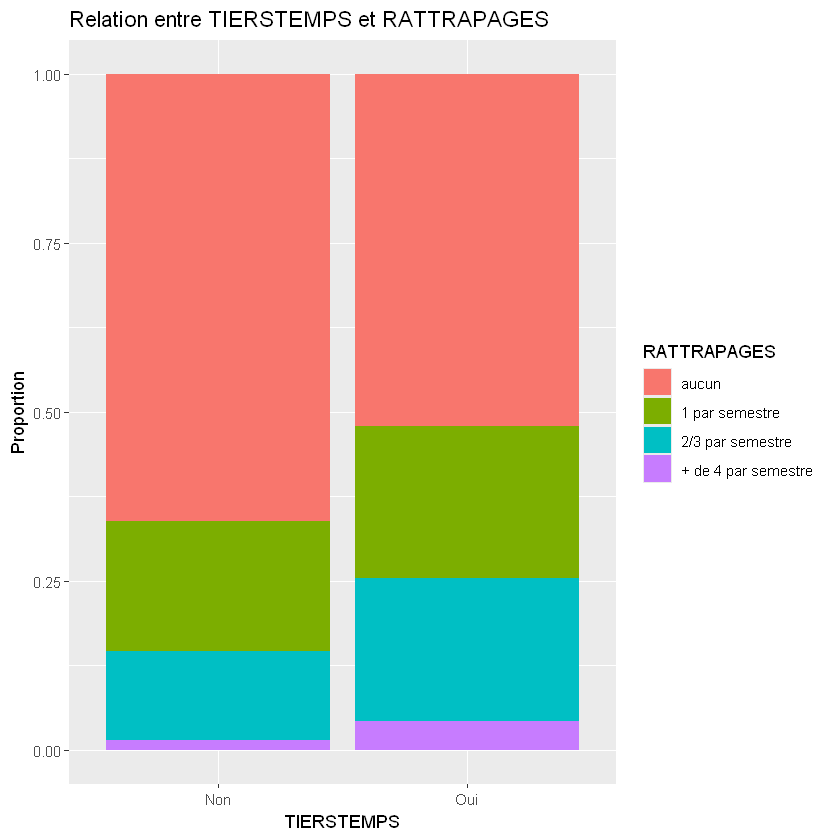

In [66]:
# Vérifier la dépendance de TIERSTEMPS avec RATTRAPAGES
chi_square_test_tierstemps <- chisq.test(table(group2_reduced$TIERSTEMPS, group2_reduced$RATTRAPAGES))
print(chi_square_test_tierstemps)

# Graphique de barres empilées pour TIERSTEMPS et RATTRAPAGES
ggplot(group2_reduced, aes(x = TIERSTEMPS, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre TIERSTEMPS et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$SPECIALITE_PO, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$SPECIALITE_PO, group2_reduced$RATTRAPAGES)
X-squared = NaN, df = 39, p-value = NA



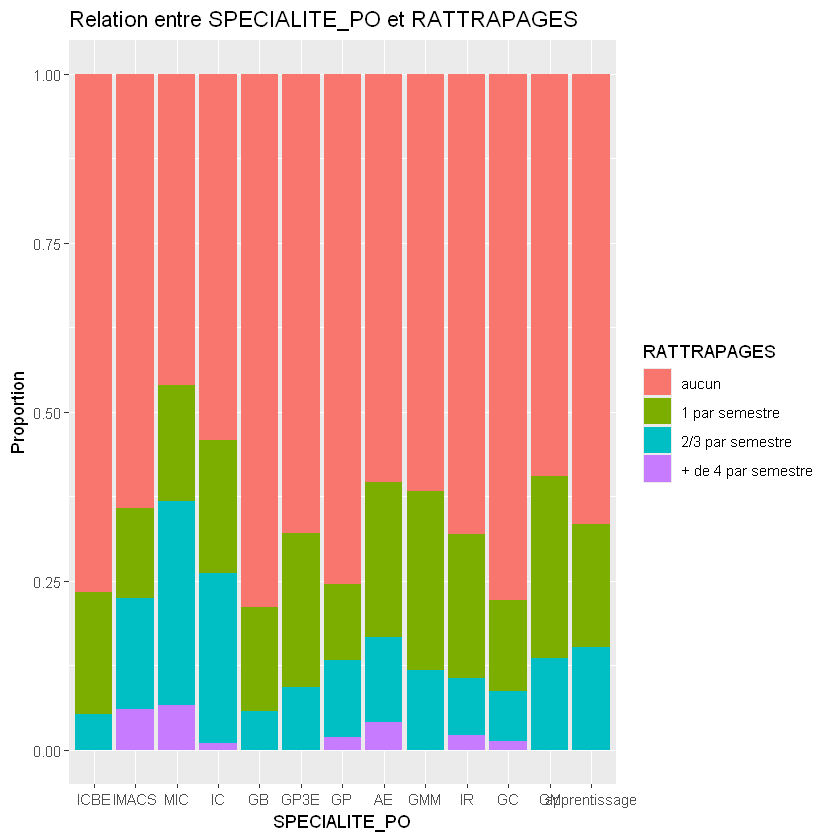

In [67]:
# Vérifier la dépendance de SPECIALITE_PO avec RATTRAPAGES
chi_square_test_specialite_po <- chisq.test(table(group2_reduced$SPECIALITE_PO, group2_reduced$RATTRAPAGES))
print(chi_square_test_specialite_po)

# Graphique de barres empilées pour SPECIALITE_PO et RATTRAPAGES
ggplot(group2_reduced, aes(x = SPECIALITE_PO, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SPECIALITE_PO et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$INTEGRATION, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$INTEGRATION, group2_reduced$RATTRAPAGES)
X-squared = 25.436, df = 12, p-value = 0.01289



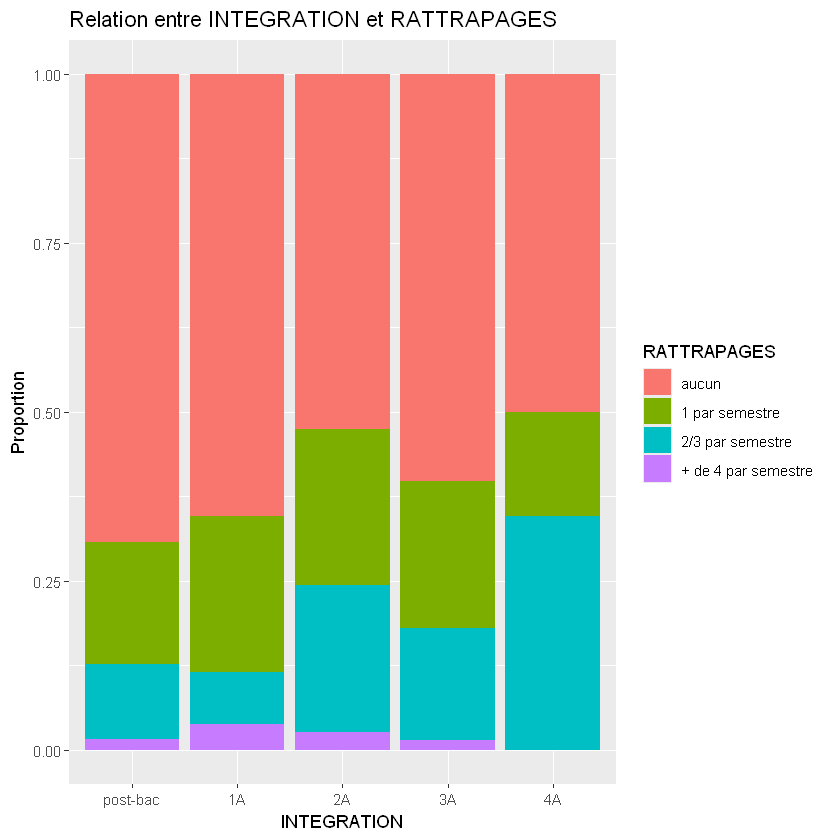

In [68]:
# Vérifier la dépendance de INTEGRATION avec RATTRAPAGES
chi_square_test_integration <- chisq.test(table(group2_reduced$INTEGRATION, group2_reduced$RATTRAPAGES))
print(chi_square_test_integration)

# Graphique de barres empilées pour INTEGRATION et RATTRAPAGES
ggplot(group2_reduced, aes(x = INTEGRATION, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre INTEGRATION et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$PRESENCE_TD, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$PRESENCE_TD, group2_reduced$RATTRAPAGES)
X-squared = 44.766, df = 3, p-value = 1.038e-09



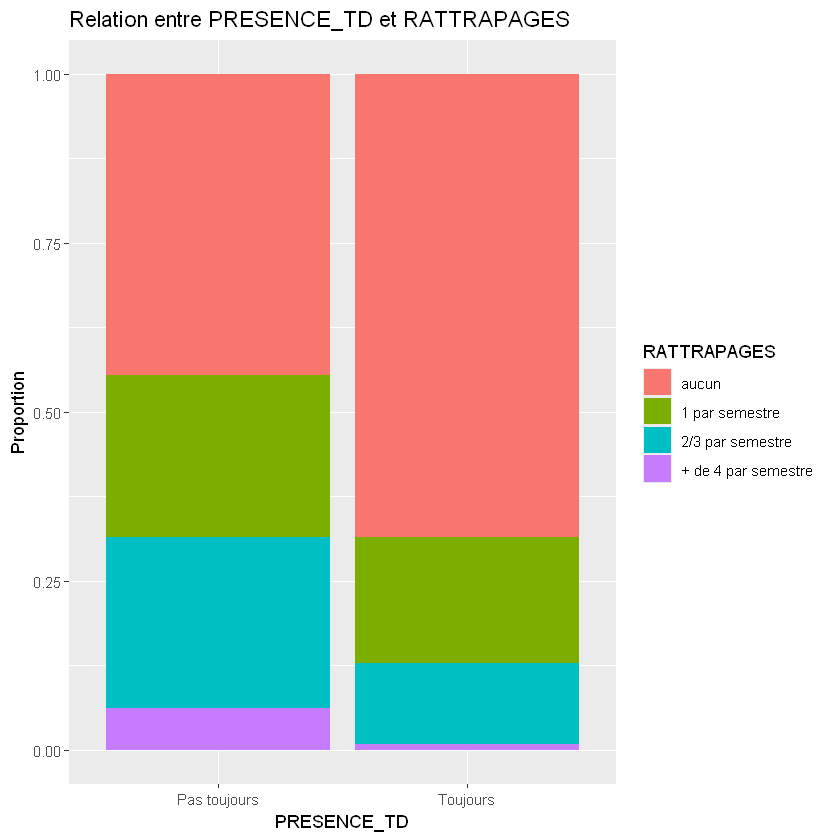

In [69]:
# Vérifier la dépendance de PRESENCE_TD avec RATTRAPAGES
chi_square_test_presence_td <- chisq.test(table(group2_reduced$PRESENCE_TD, group2_reduced$RATTRAPAGES))
print(chi_square_test_presence_td)

# Graphique de barres empilées pour PRESENCE_TD et RATTRAPAGES
ggplot(group2_reduced, aes(x = PRESENCE_TD, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre PRESENCE_TD et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$SORTIEBAR, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$SORTIEBAR, group2_reduced$RATTRAPAGES)
X-squared = 34.759, df = 12, p-value = 0.0005116



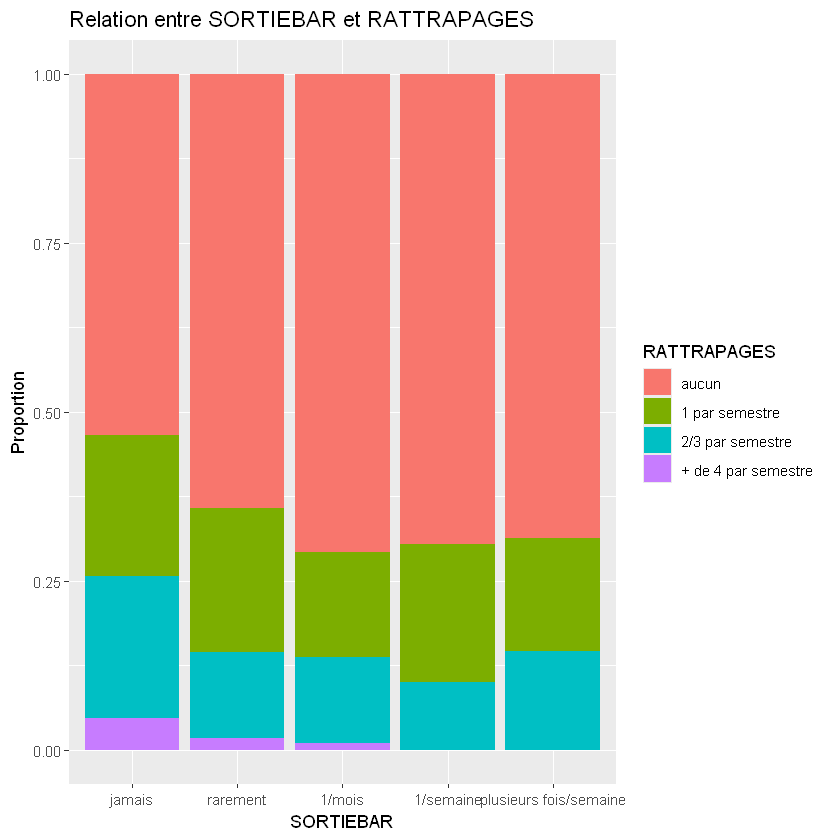

In [70]:
# Vérifier la dépendance de SORTIEBAR avec RATTRAPAGES
chi_square_test_sortiebar <- chisq.test(table(group2_reduced$SORTIEBAR, group2_reduced$RATTRAPAGES))
print(chi_square_test_sortiebar)

# Graphique de barres empilées pour SORTIEBAR et RATTRAPAGES
ggplot(group2_reduced, aes(x = SORTIEBAR, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SORTIEBAR et RATTRAPAGES")



	Pearson's Chi-squared test

data:  table(group2_reduced$SORTIEBAR, group2_reduced$ISOLEMENT)
X-squared = 126.94, df = 8, p-value < 2.2e-16



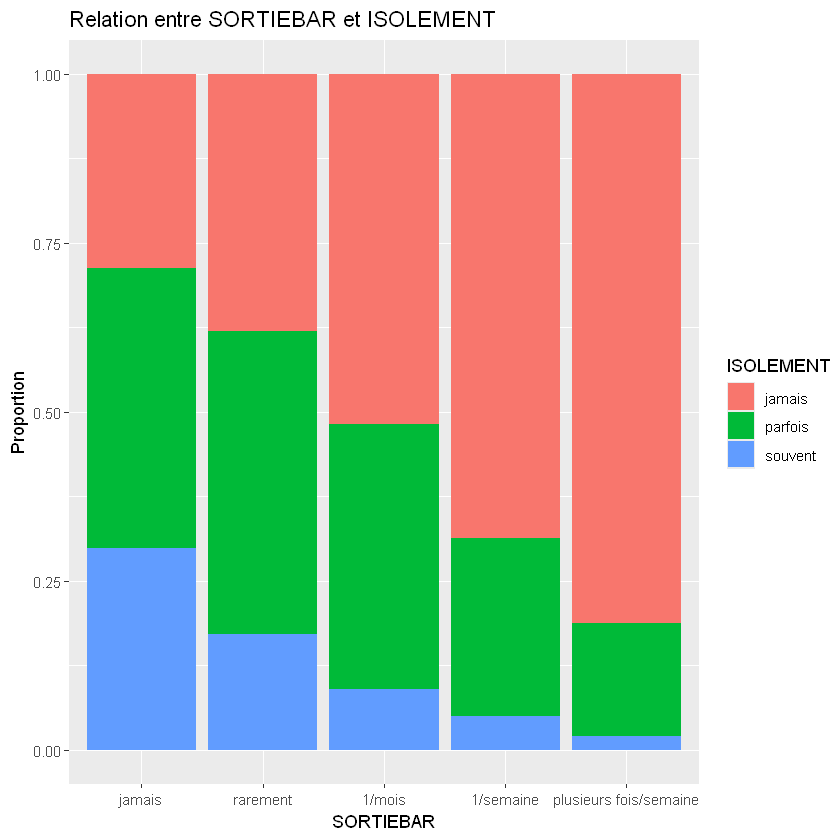

In [71]:
# Vérifier la dépendance de SORTIEBAR avec ISOLEMENT
chi_square_test_sortiebar <- chisq.test(table(group2_reduced$SORTIEBAR, group2_reduced$ISOLEMENT))
print(chi_square_test_sortiebar)

# Graphique de barres empilées pour SORTIEBAR et ISOLEMENT
ggplot(group2_reduced, aes(x = SORTIEBAR, fill = ISOLEMENT)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SORTIEBAR et ISOLEMENT")

Warning message in chisq.test(table(group2_reduced$CONCENTRATIONPERSO, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$CONCENTRATIONPERSO, group2_reduced$RATTRAPAGES)
X-squared = 24.67, df = 6, p-value = 0.000393



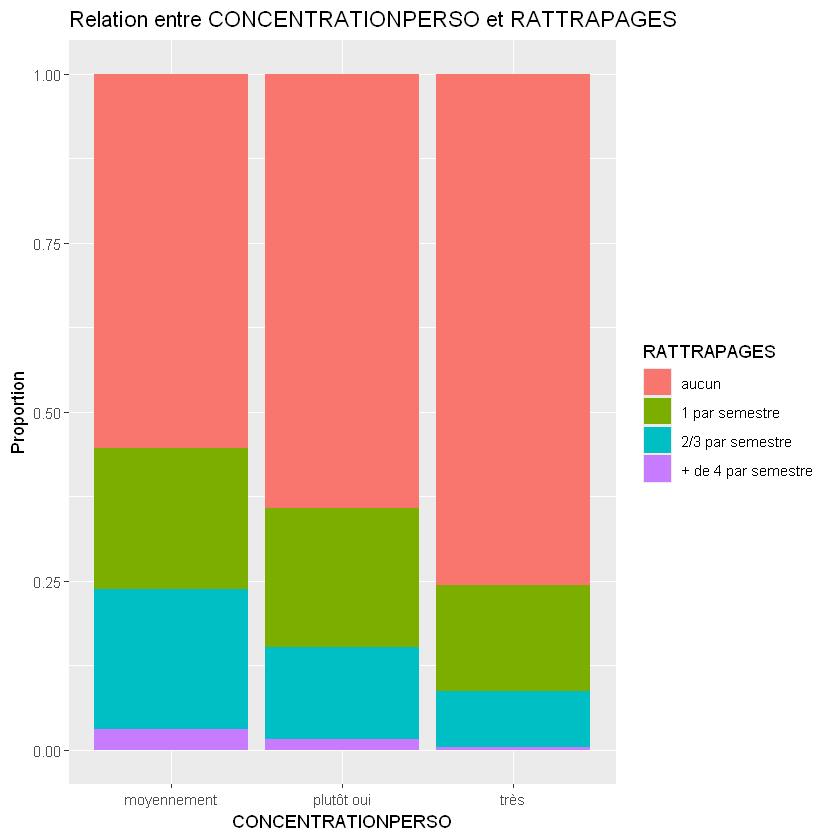

In [72]:
# Vérifier la dépendance de CONCENTRATIONPERSO avec RATTRAPAGES
chi_square_test_concentrationperso <- chisq.test(table(group2_reduced$CONCENTRATIONPERSO, group2_reduced$RATTRAPAGES))
print(chi_square_test_concentrationperso)

# Graphique de barres empilées pour CONCENTRATIONPERSO et RATTRAPAGES
ggplot(group2_reduced, aes(x = CONCENTRATIONPERSO, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre CONCENTRATIONPERSO et RATTRAPAGES")


Warning message in chisq.test(table(group2_reduced$ETUDEWE, group2_reduced$RATTRAPAGES)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced$ETUDEWE, group2_reduced$RATTRAPAGES)
X-squared = 23.435, df = 15, p-value = 0.07533



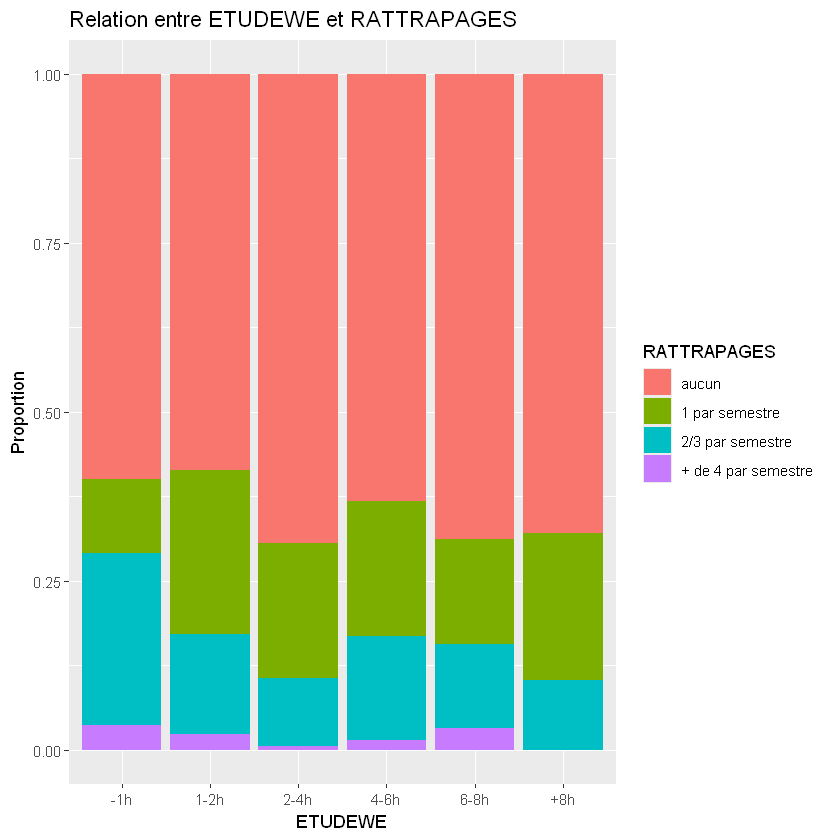

In [73]:
# Vérifier la dépendance de ETUDEWE avec RATTRAPAGES
chi_square_test_etudewe <- chisq.test(table(group2_reduced$ETUDEWE, group2_reduced$RATTRAPAGES))
print(chi_square_test_etudewe)

# Graphique de barres empilées pour ETUDEWE et RATTRAPAGES
ggplot(group2_reduced, aes(x = ETUDEWE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ETUDEWE et RATTRAPAGES")


**Nous constatons que les étudiants ayant un taux plus élevé de rattrapages sont ceux qui : 
 +Sont étudiants étrangers, 
 +Appartiennent à la cohorte FAS (cursus adapté aux étudiants titulaires d'un BAC STI2D), 
 +Ressentent fréquemment un isolement, 
 +Bénéficient d'un tiers-temps (étudiants en situation de handicap ou ceux qui ne maîtrisent pas encore parfaitement le français), 
 +Sont inscrits en PO MIC ou IC ou en spécialité AE, GMM, GM, 
 +Ne participent pas toujours aux TD, 
 +Ceux qui ne vont jamais ou rarement au bar (variable corrélée à l'isolement), 
 +Ceux ayant une faible concentration lorsqu'ils travaillent individuellement.**

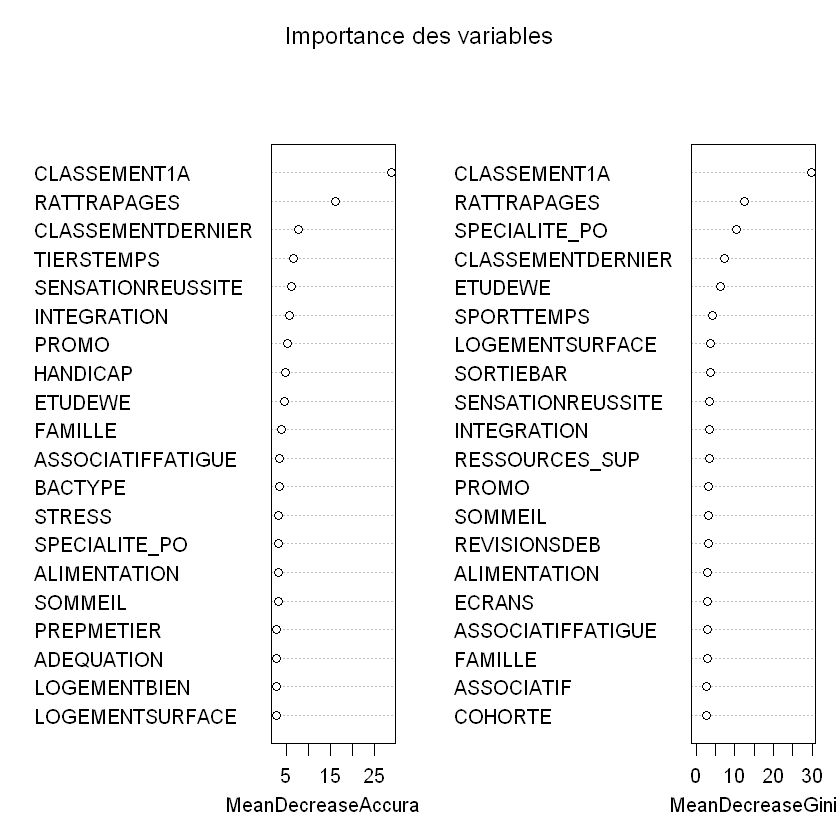

In [74]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_redoublement <- randomForest(REDOUBLEMENT ~ ., data = group2, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

Warning message in chisq.test(table(group2$CLASSEMENT1A, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$CLASSEMENT1A, group2$REDOUBLEMENT)
X-squared = 286.26, df = 7, p-value < 2.2e-16



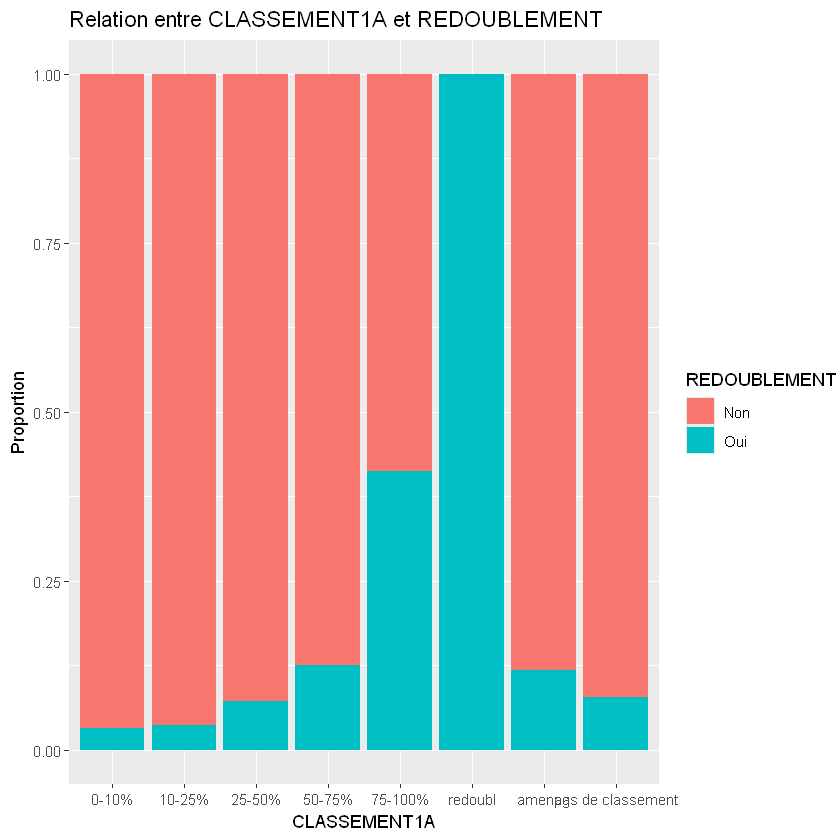

In [75]:
# Vérifier la dépendance de CLASSEMENT1A avec REDOUBLEMENT
chi_square_test_classement1a <- chisq.test(table(group2$CLASSEMENT1A, group2$REDOUBLEMENT))
print(chi_square_test_classement1a)

# Graphique de barres empilées pour CLASSEMENT1A et REDOUBLEMENT
ggplot(group2, aes(x = CLASSEMENT1A, fill = REDOUBLEMENT)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre CLASSEMENT1A et REDOUBLEMENT")


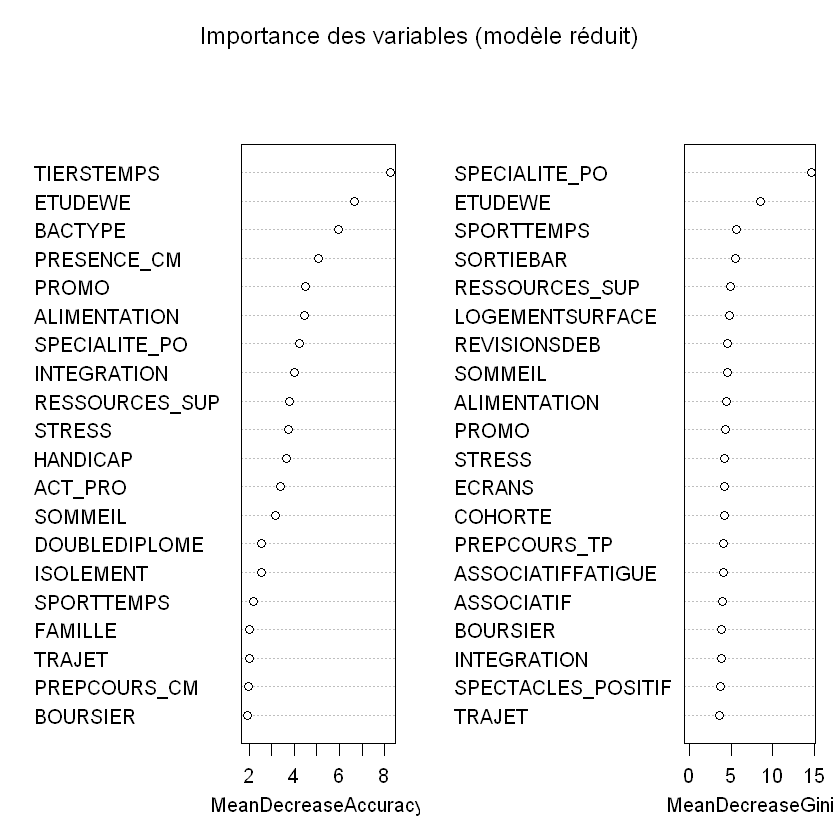

In [76]:
# Suppression des variables ayant une influence trop forte
group2_reduced_redoublement <- group2 %>%
  select(-SENSATIONREUSSITE, -RATTRAPAGES, -CLASSEMENT1A, -CLASSEMENTDERNIER)

# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_redoublement <- randomForest(REDOUBLEMENT ~ ., data = group2_reduced_redoublement, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables (modèle réduit)")


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(group2$TIERSTEMPS, group2$REDOUBLEMENT)
X-squared = 13.705, df = 1, p-value = 0.0002139



`summarise()` has grouped output by 'TIERSTEMPS'. You can override using the `.groups` argument.


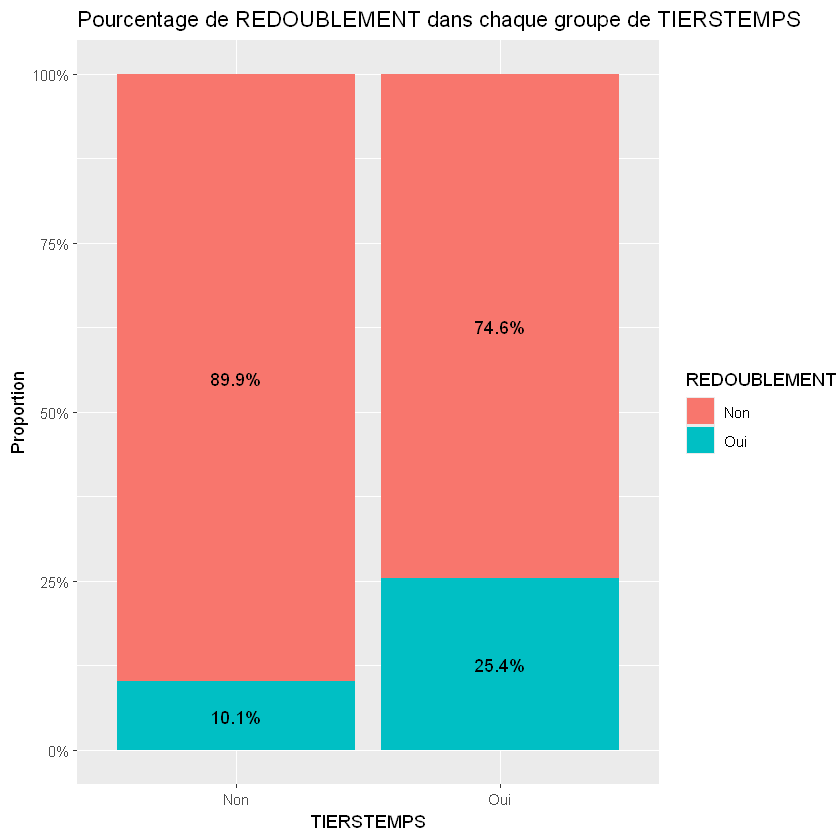

In [77]:
# 1. Variable TIERSTEMPS
# Test du chi-carré pour TIERSTEMPS et REDOUBLEMENT
chi_square_test_tierstemps <- chisq.test(table(group2$TIERSTEMPS, group2$REDOUBLEMENT))
print(chi_square_test_tierstemps)

# Calcul des pourcentages pour chaque groupe de TIERSTEMPS et REDOUBLEMENT
group2_percent_tierstemps <- group2 %>%
  group_by(TIERSTEMPS, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour TIERSTEMPS et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_tierstemps, aes(x = TIERSTEMPS, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de TIERSTEMPS") +
  scale_y_continuous(labels = scales::percent_format())

Warning message in chisq.test(table(group2$PROMO, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$PROMO, group2$REDOUBLEMENT)
X-squared = NaN, df = 4, p-value = NA



`summarise()` has grouped output by 'PROMO'. You can override using the `.groups` argument.


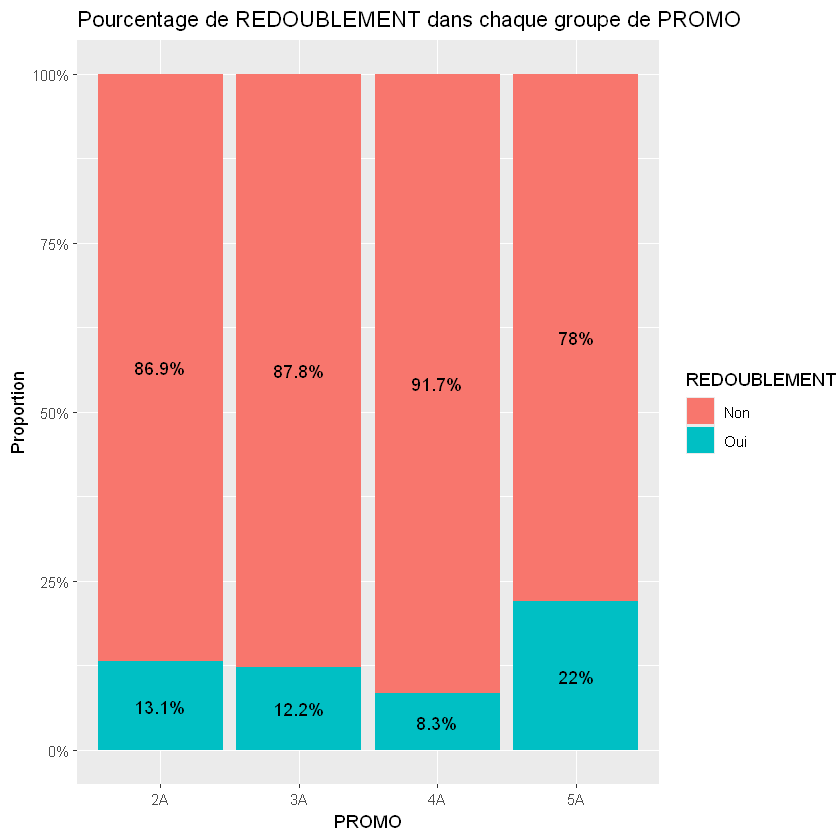

In [78]:
# 2. Variable PROMO
# Test du chi-carré pour PROMO et REDOUBLEMENT
chi_square_test_promo <- chisq.test(table(group2$PROMO, group2$REDOUBLEMENT))
print(chi_square_test_promo)

# Calcul des pourcentages pour chaque groupe de PROMO et REDOUBLEMENT
group2_percent_promo <- group2 %>%
  group_by(PROMO, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour PROMO et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_promo, aes(x = PROMO, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de PROMO") +
  scale_y_continuous(labels = scales::percent_format())

Warning message in chisq.test(table(group2$INTEGRATION, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$INTEGRATION, group2$REDOUBLEMENT)
X-squared = 11.291, df = 4, p-value = 0.02348



`summarise()` has grouped output by 'INTEGRATION'. You can override using the `.groups` argument.


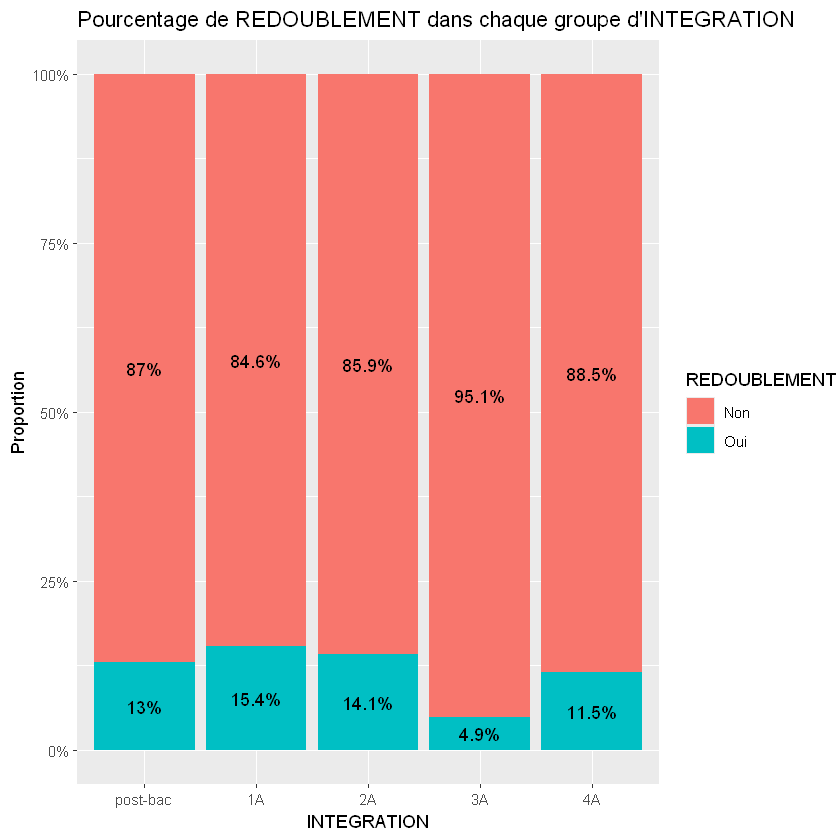

In [79]:
# 3. Variable INTEGRATION
# Test du chi-carré pour INTEGRATION et REDOUBLEMENT
chi_square_test_integration <- chisq.test(table(group2$INTEGRATION, group2$REDOUBLEMENT))
print(chi_square_test_integration)

# Calcul des pourcentages pour chaque groupe d'INTEGRATION et REDOUBLEMENT
group2_percent_integration <- group2 %>%
  group_by(INTEGRATION, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour INTEGRATION et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_integration, aes(x = INTEGRATION, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe d'INTEGRATION") +
  scale_y_continuous(labels = scales::percent_format())

Warning message in chisq.test(table(group2$HANDICAP, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(group2$HANDICAP, group2$REDOUBLEMENT)
X-squared = 6.8002, df = 1, p-value = 0.009115



`summarise()` has grouped output by 'HANDICAP'. You can override using the `.groups` argument.


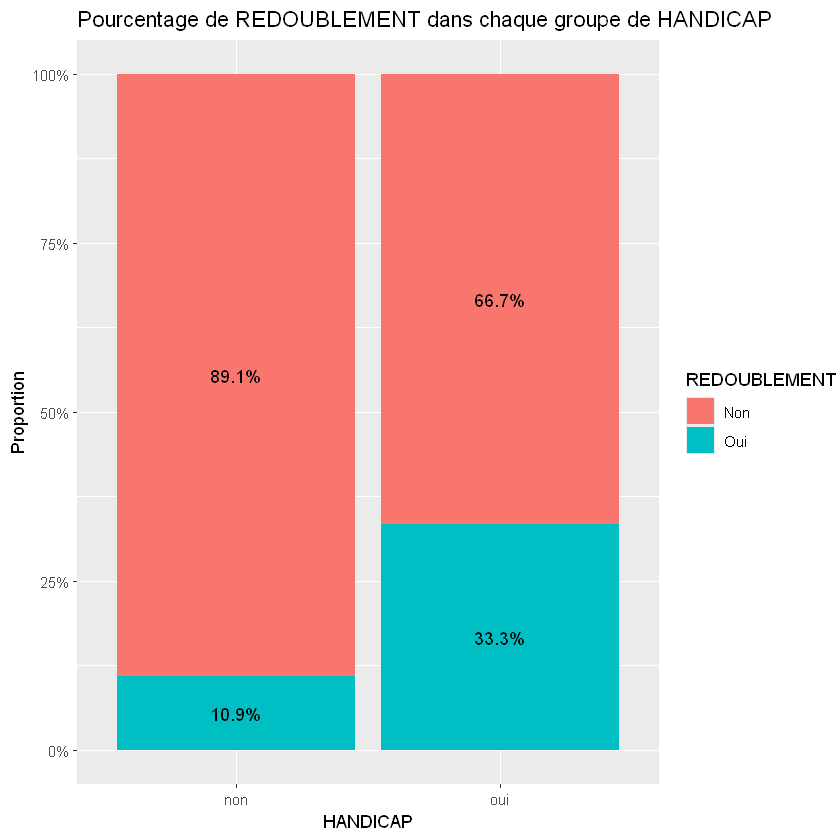

In [80]:
# 4. Variable HANDICAP
# Test du chi-carré pour HANDICAP et REDOUBLEMENT
chi_square_test_handicap <- chisq.test(table(group2$HANDICAP, group2$REDOUBLEMENT))
print(chi_square_test_handicap)

# Calcul des pourcentages pour chaque groupe de HANDICAP et REDOUBLEMENT
group2_percent_handicap <- group2 %>%
  group_by(HANDICAP, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour HANDICAP et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_handicap, aes(x = HANDICAP, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de HANDICAP") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$PRESENCE_CM, group2$REDOUBLEMENT)
X-squared = 15.032, df = 2, p-value = 0.0005442



`summarise()` has grouped output by 'PRESENCE_CM'. You can override using the `.groups` argument.


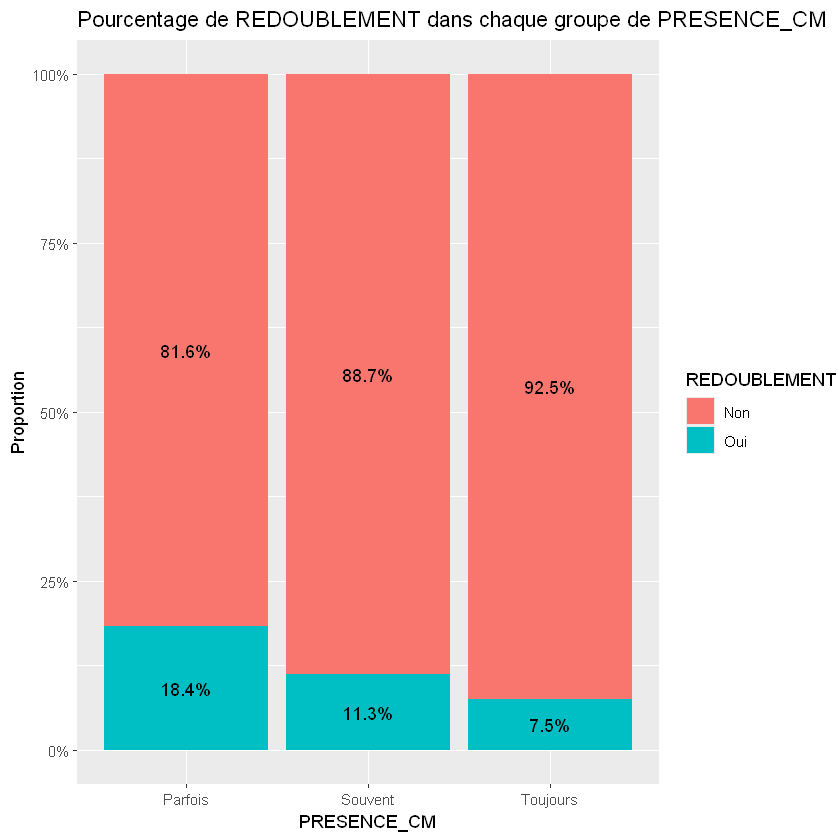

In [81]:
# 5. Variable PRESENCE_CM
# Test du chi-carré pour PRESENCE_CM et REDOUBLEMENT
chi_square_test_presence_cm <- chisq.test(table(group2$PRESENCE_CM, group2$REDOUBLEMENT))
print(chi_square_test_presence_cm)

# Calcul des pourcentages pour chaque groupe de PRESENCE_CM et REDOUBLEMENT
group2_percent_presence_cm <- group2 %>%
  group_by(PRESENCE_CM, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour PRESENCE_CM et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_presence_cm, aes(x = PRESENCE_CM, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de PRESENCE_CM") +
  scale_y_continuous(labels = scales::percent_format())



	Pearson's Chi-squared test

data:  table(group2$ALIMENTATION, group2$REDOUBLEMENT)
X-squared = 27.413, df = 2, p-value = 1.115e-06



`summarise()` has grouped output by 'ALIMENTATION'. You can override using the `.groups` argument.


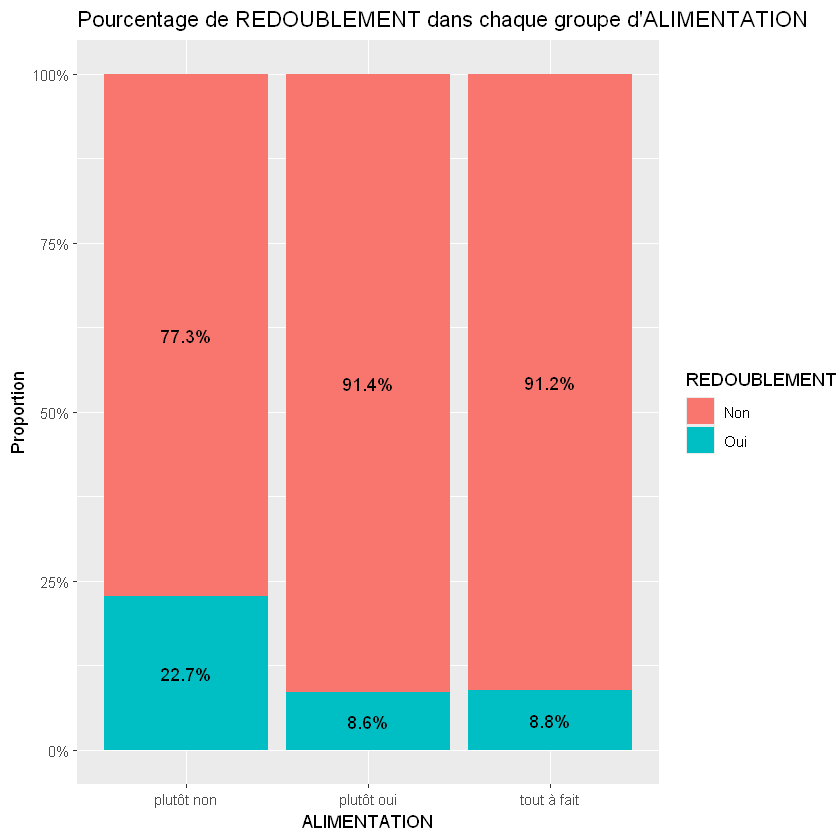

In [82]:
# 6. Variable ALIMENTATION
# Test du chi-carré pour ALIMENTATION et REDOUBLEMENT
chi_square_test_alimentation <- chisq.test(table(group2$ALIMENTATION, group2$REDOUBLEMENT))
print(chi_square_test_alimentation)

# Calcul des pourcentages pour chaque groupe d'ALIMENTATION et REDOUBLEMENT
group2_percent_alimentation <- group2 %>%
  group_by(ALIMENTATION, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour ALIMENTATION et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_alimentation, aes(x = ALIMENTATION, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe d'ALIMENTATION") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$ETUDEWE, group2$REDOUBLEMENT)
X-squared = 25.516, df = 5, p-value = 0.0001108



`summarise()` has grouped output by 'ETUDEWE'. You can override using the `.groups` argument.


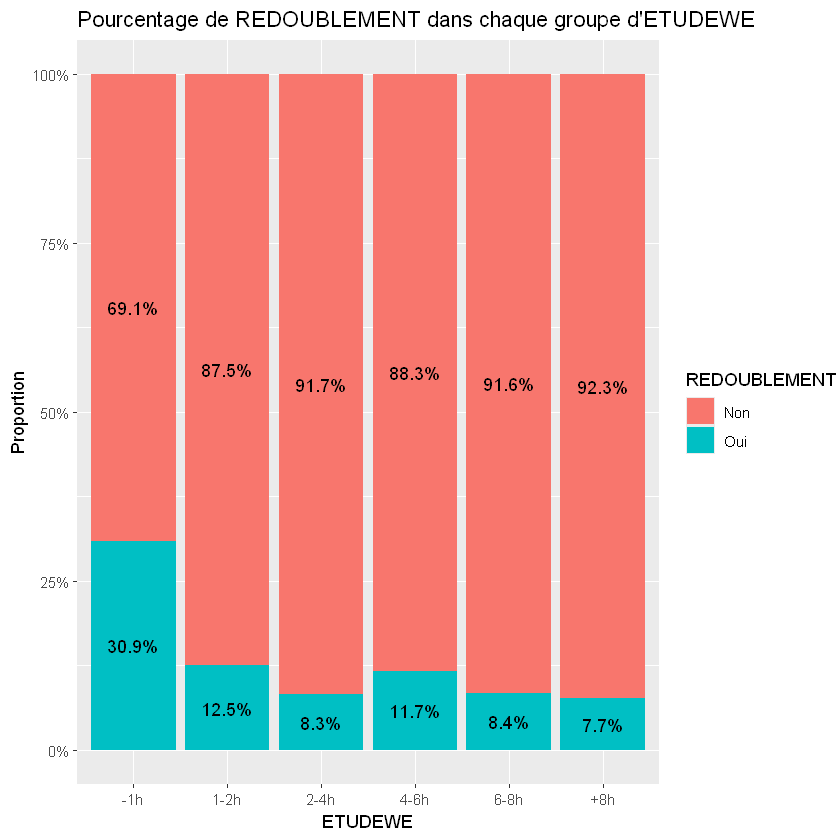

In [83]:
# 7. Variable ETUDEWE
# Test du chi-carré pour ETUDEWE et REDOUBLEMENT
chi_square_test_etudewe <- chisq.test(table(group2$ETUDEWE, group2$REDOUBLEMENT))
print(chi_square_test_etudewe)

# Calcul des pourcentages pour chaque groupe d'ETUDEWE et REDOUBLEMENT
group2_percent_etudewe <- group2 %>%
  group_by(ETUDEWE, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour ETUDEWE et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_etudewe, aes(x = ETUDEWE, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe d'ETUDEWE") +
  scale_y_continuous(labels = scales::percent_format())


Warning message in chisq.test(table(group2$STRESS, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$STRESS, group2$REDOUBLEMENT)
X-squared = 16.37, df = 3, p-value = 0.0009522



`summarise()` has grouped output by 'STRESS'. You can override using the `.groups` argument.


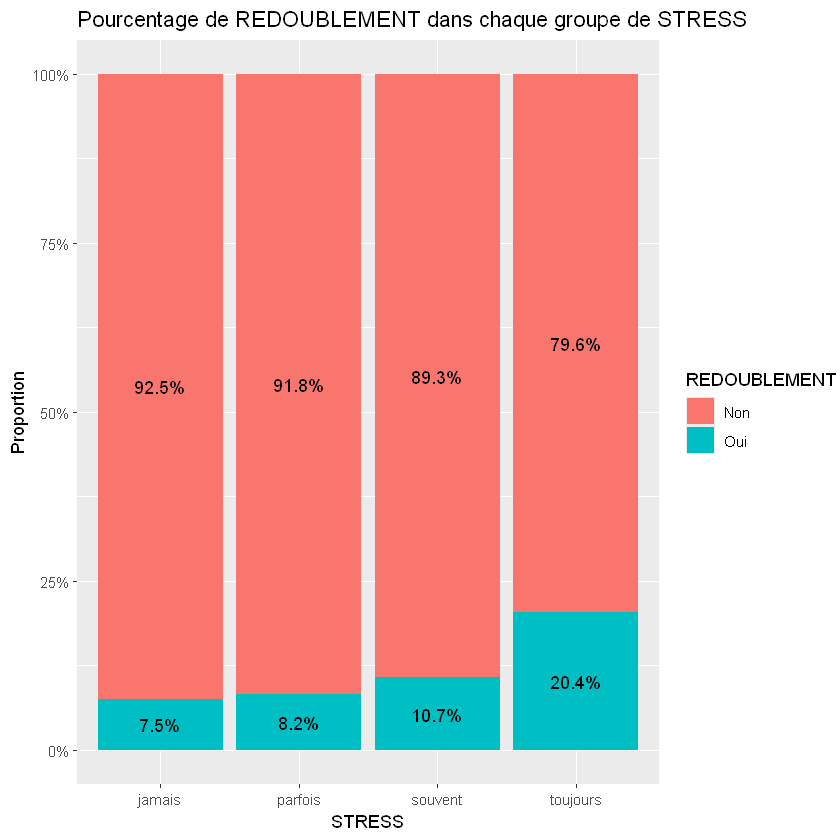

In [84]:
# 8. Variable STRESS
# Test du chi-carré pour STRESS et REDOUBLEMENT
chi_square_test_stress <- chisq.test(table(group2$STRESS, group2$REDOUBLEMENT))
print(chi_square_test_stress)
# Calcul des pourcentages pour chaque groupe de STRESS et REDOUBLEMENT
group2_percent_stress <- group2 %>%
  group_by(STRESS, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour STRESS et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_stress, aes(x = STRESS, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de STRESS") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$RESSOURCES_SUP, group2$REDOUBLEMENT)
X-squared = 11.208, df = 3, p-value = 0.01065



`summarise()` has grouped output by 'RESSOURCES_SUP'. You can override using the `.groups` argument.


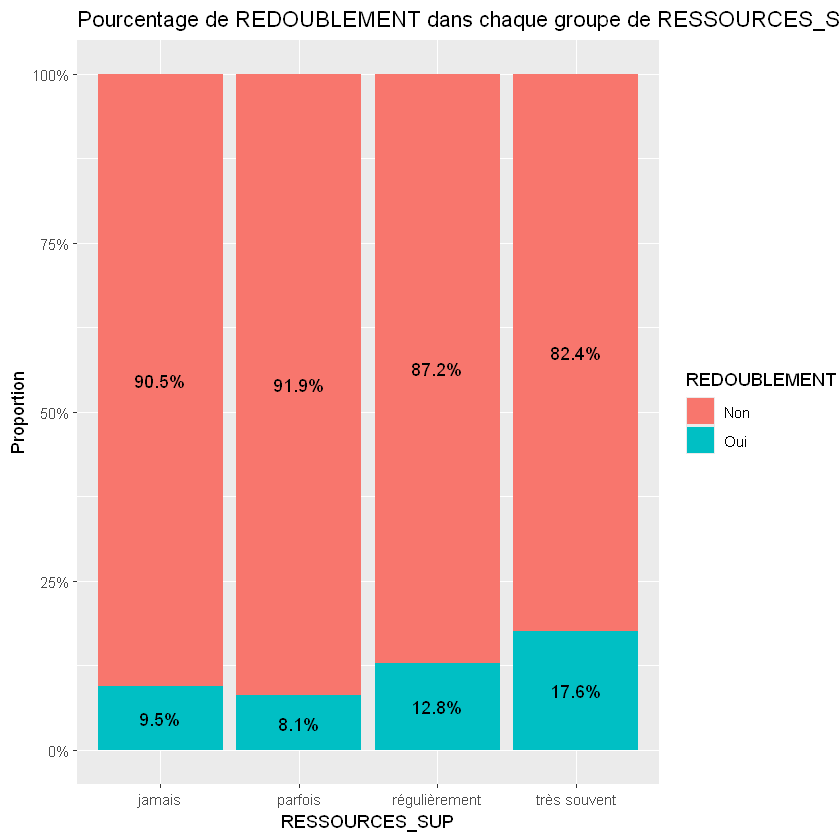

In [85]:
# 9. Variable RESSOURCES_SUP
# Test du chi-carré pour RESSOURCES_SUP et REDOUBLEMENT
chi_square_test_ressources_sup <- chisq.test(table(group2$RESSOURCES_SUP, group2$REDOUBLEMENT))
print(chi_square_test_ressources_sup)

# Calcul des pourcentages pour chaque groupe de RESSOURCES_SUP et REDOUBLEMENT
group2_percent_ressources_sup <- group2 %>%
  group_by(RESSOURCES_SUP, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour RESSOURCES_SUP et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_ressources_sup, aes(x = RESSOURCES_SUP, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de RESSOURCES_SUP") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$PREPCOURS_CM, group2$REDOUBLEMENT)
X-squared = 2.1777, df = 2, p-value = 0.3366



`summarise()` has grouped output by 'PREPCOURS_CM'. You can override using the `.groups` argument.


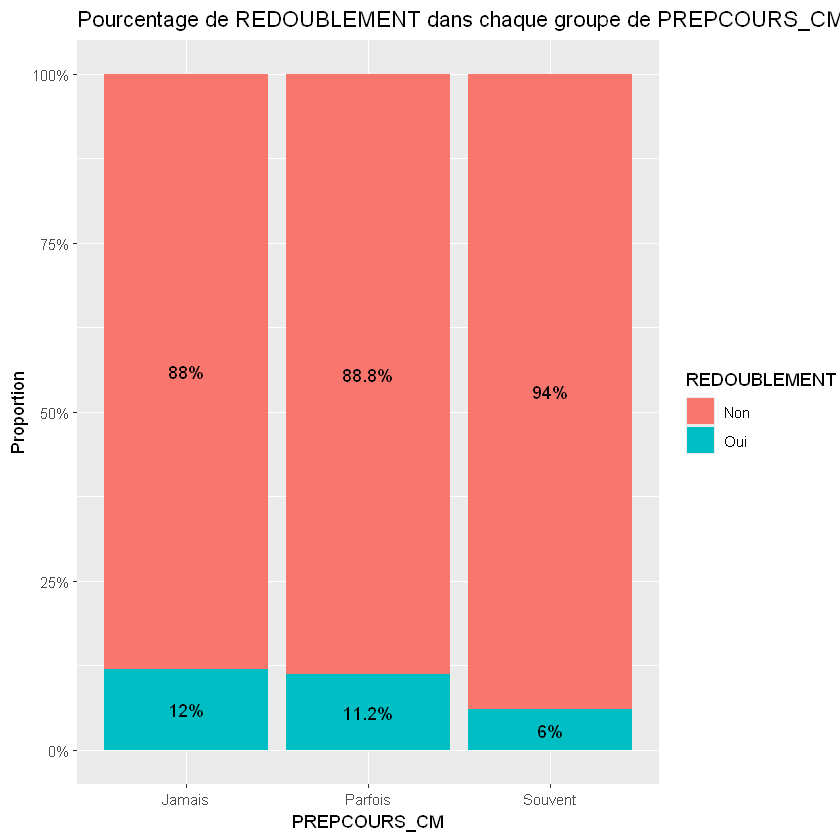

In [86]:
# 10. Variable PREPCOURS_CM
# Test du chi-carré pour PREPCOURS_CM et REDOUBLEMENT
chi_square_test_prepours_cm <- chisq.test(table(group2$PREPCOURS_CM, group2$REDOUBLEMENT))
print(chi_square_test_prepours_cm)

# Calcul des pourcentages pour chaque groupe de PREPCOURS_CM et REDOUBLEMENT
group2_percent_prepours_cm <- group2 %>%
  group_by(PREPCOURS_CM, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour PREPCOURS_CM et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_prepours_cm, aes(x = PREPCOURS_CM, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de PREPCOURS_CM") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$BACTYPE, group2$REDOUBLEMENT)
X-squared = 4.8743, df = 2, p-value = 0.08741



`summarise()` has grouped output by 'BACTYPE'. You can override using the `.groups` argument.


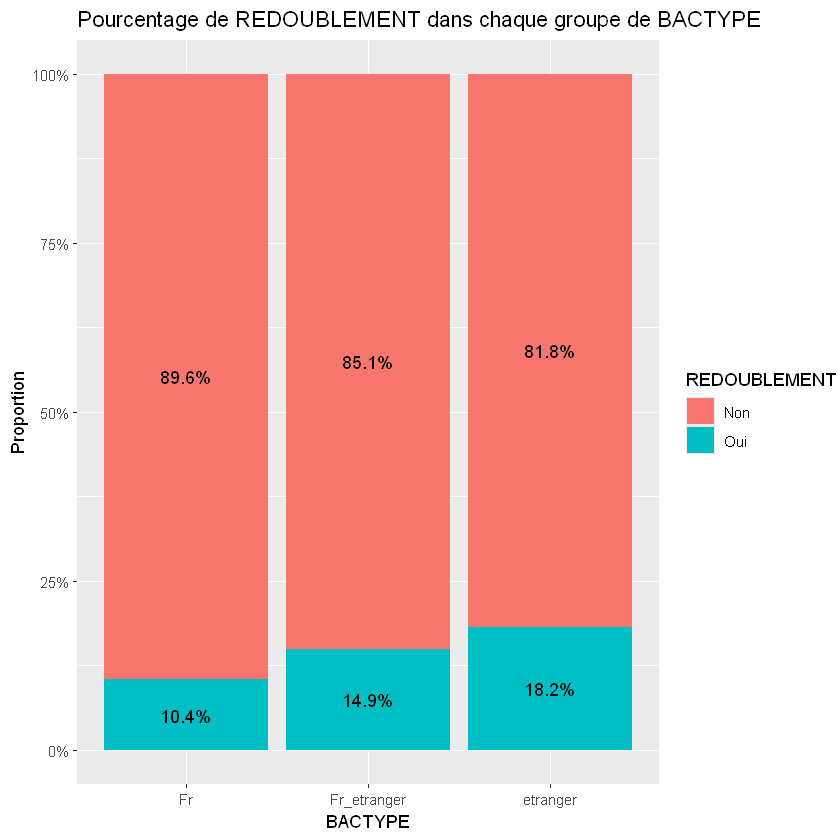

In [87]:
# 11. Variable BACTYPE
# Test du chi-carré pour BACTYPE et REDOUBLEMENT
chi_square_test_bactype <- chisq.test(table(group2$BACTYPE, group2$REDOUBLEMENT))
print(chi_square_test_bactype)

# Calcul des pourcentages pour chaque groupe de BACTYPE et REDOUBLEMENT
group2_percent_bactype <- group2 %>%
  group_by(BACTYPE, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour BACTYPE et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_bactype, aes(x = BACTYPE, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de BACTYPE") +
  scale_y_continuous(labels = scales::percent_format())


Warning message in chisq.test(table(group2$SPECIALITE_PO, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$SPECIALITE_PO, group2$REDOUBLEMENT)
X-squared = NaN, df = 13, p-value = NA



`summarise()` has grouped output by 'SPECIALITE_PO'. You can override using the `.groups` argument.


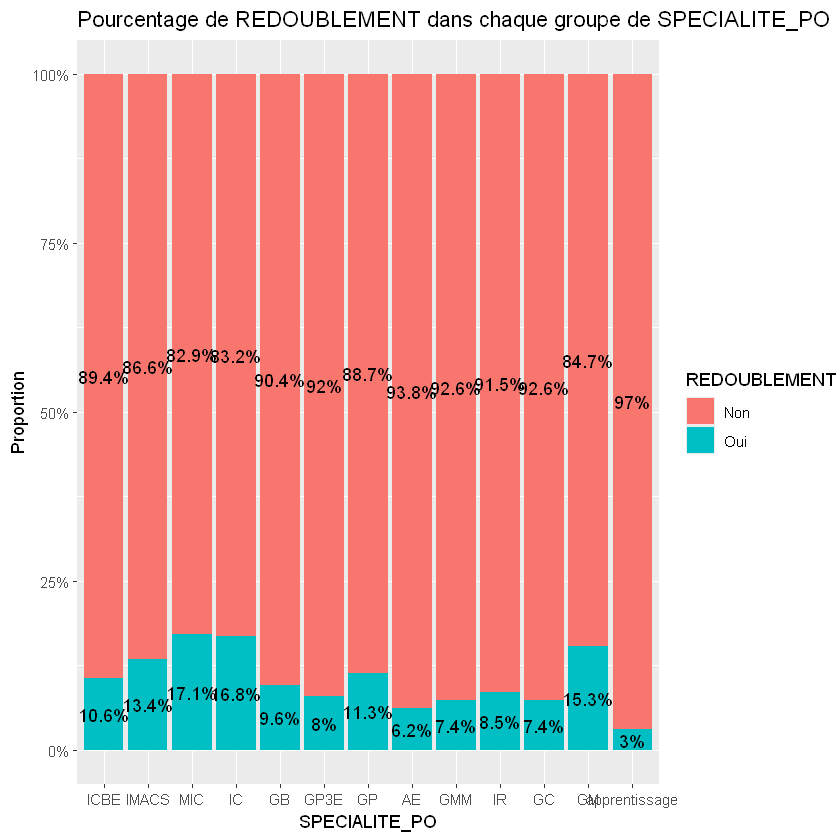

In [88]:
# 12. Variable SPECIALITE_PO
# Test du chi-carré pour SPECIALITE_PO et REDOUBLEMENT
chi_square_test_specialite_po <- chisq.test(table(group2$SPECIALITE_PO, group2$REDOUBLEMENT))
print(chi_square_test_specialite_po)

# Calcul des pourcentages pour chaque groupe de SPECIALITE_PO et REDOUBLEMENT
group2_percent_specialite_po <- group2 %>%
  group_by(SPECIALITE_PO, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour SPECIALITE_PO et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_specialite_po, aes(x = SPECIALITE_PO, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de SPECIALITE_PO") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$SPORTTEMPS, group2$REDOUBLEMENT)
X-squared = 12.425, df = 4, p-value = 0.01446



`summarise()` has grouped output by 'SPORTTEMPS'. You can override using the `.groups` argument.


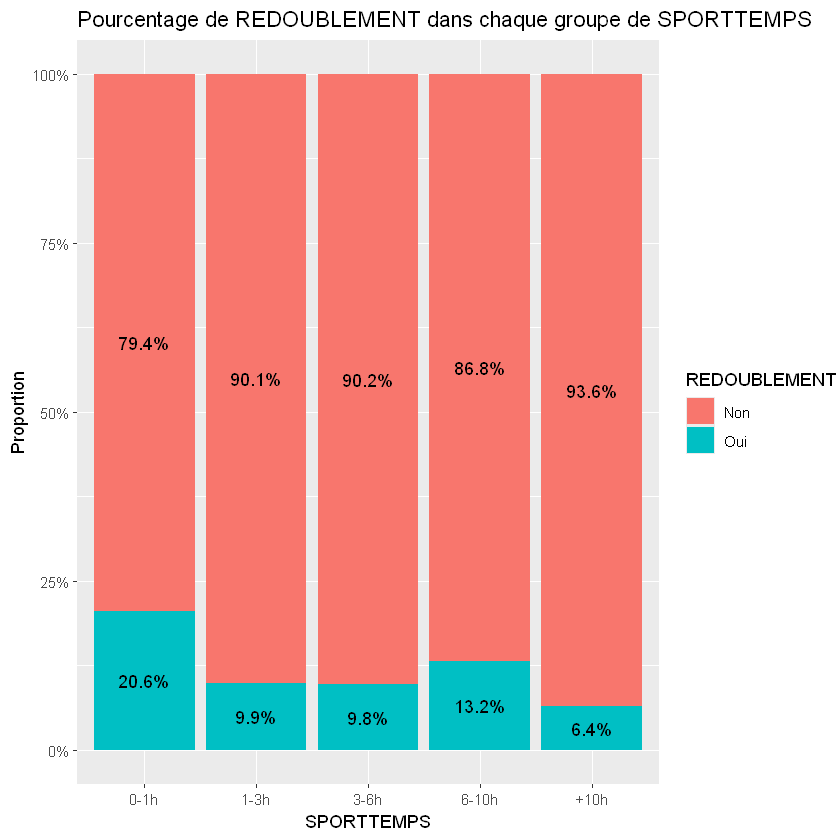

In [89]:
# 13. Variable SPORTTEMPS
# Test du chi-carré pour SPORTTEMPS et REDOUBLEMENT
chi_square_test_sporttemps <- chisq.test(table(group2$SPORTTEMPS, group2$REDOUBLEMENT))
print(chi_square_test_sporttemps)

# Calcul des pourcentages pour chaque groupe de SPORTTEMPS et REDOUBLEMENT
group2_percent_sporttemps <- group2 %>%
  group_by(SPORTTEMPS, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour SPORTTEMPS et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_sporttemps, aes(x = SPORTTEMPS, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de SPORTTEMPS") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$REVISIONSDEB, group2$REDOUBLEMENT)
X-squared = 13.328, df = 4, p-value = 0.009778



`summarise()` has grouped output by 'REVISIONSDEB'. You can override using the `.groups` argument.


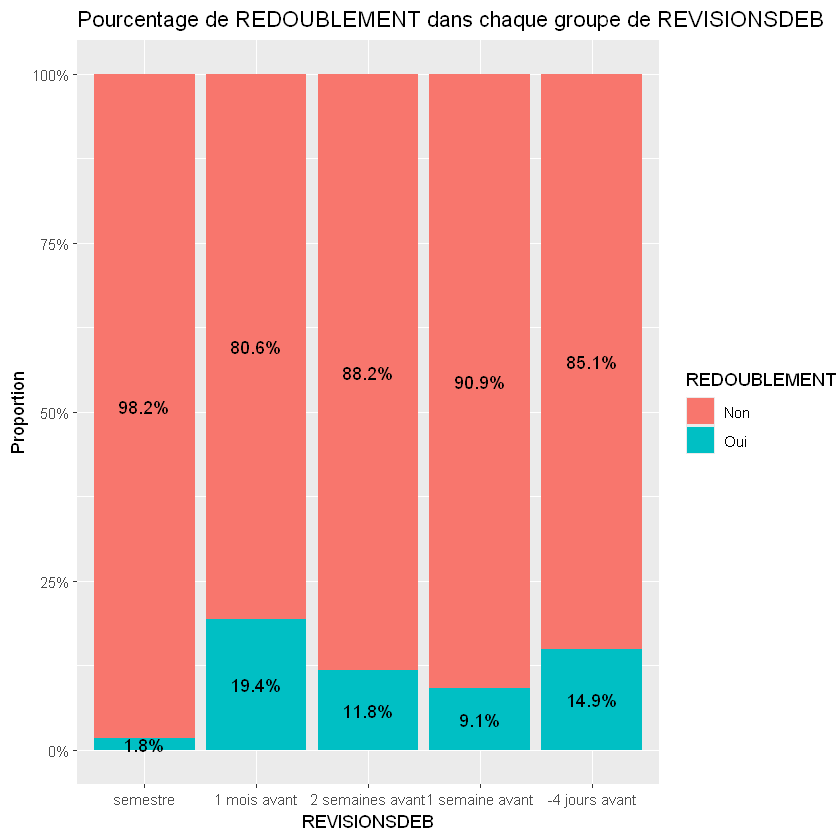

In [90]:
# 14. Variable REVISIONSDEB
# Test du chi-carré pour REVISIONSDEB et REDOUBLEMENT
chi_square_test_revisionsdeb <- chisq.test(table(group2$REVISIONSDEB, group2$REDOUBLEMENT))
print(chi_square_test_revisionsdeb)

# Calcul des pourcentages pour chaque groupe de REVISIONSDEB et REDOUBLEMENT
group2_percent_revisionsdeb <- group2 %>%
  group_by(REVISIONSDEB, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour REVISIONSDEB et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_revisionsdeb, aes(x = REVISIONSDEB, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de REVISIONSDEB") +
  scale_y_continuous(labels = scales::percent_format())


	Pearson's Chi-squared test

data:  table(group2$SORTIEBAR, group2$REDOUBLEMENT)
X-squared = 12.315, df = 4, p-value = 0.01515



`summarise()` has grouped output by 'SORTIEBAR'. You can override using the `.groups` argument.


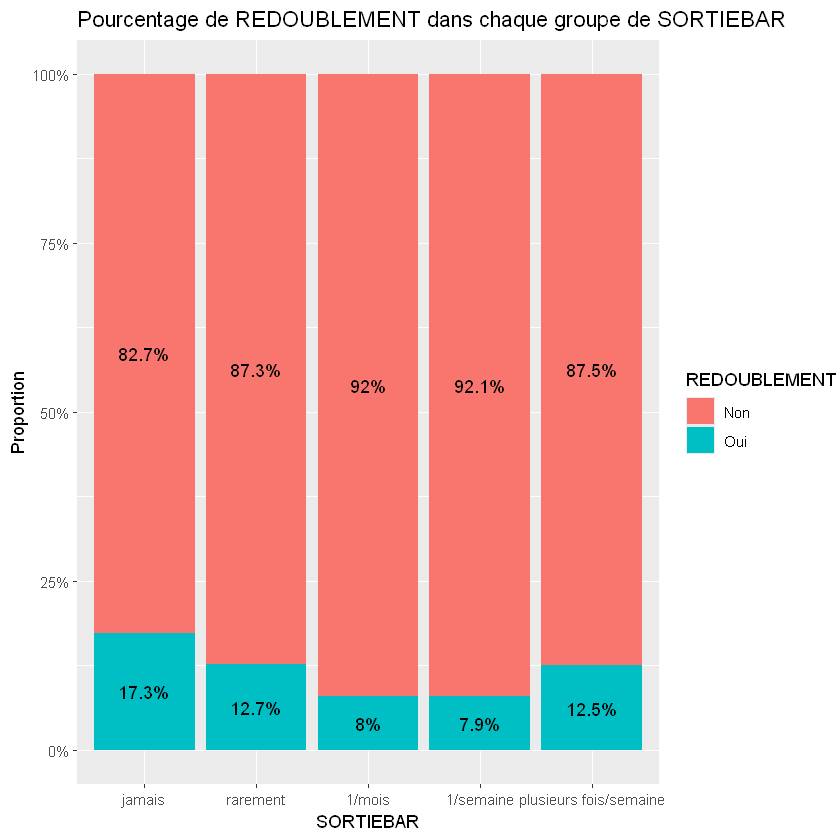

In [91]:
# 15. Variable SORTIEBAR
# Test du chi-carré pour SORTIEBAR et REDOUBLEMENT
chi_square_test_sortiebar <- chisq.test(table(group2$SORTIEBAR, group2$REDOUBLEMENT))
print(chi_square_test_sortiebar)

# Calcul des pourcentages pour chaque groupe de SORTIEBAR et REDOUBLEMENT
group2_percent_sortiebar <- group2 %>%
  group_by(SORTIEBAR, REDOUBLEMENT) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Graphique de barres empilées pour SORTIEBAR et REDOUBLEMENT avec pourcentages
ggplot(group2_percent_sortiebar, aes(x = SORTIEBAR, y = percentage, fill = REDOUBLEMENT)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5)) +
  labs(y = "Proportion", title = "Pourcentage de REDOUBLEMENT dans chaque groupe de SORTIEBAR") +
  scale_y_continuous(labels = scales::percent_format())

In [92]:
# Taille du dataframe avant la suppression
taille_avant <- dim(group2)
print(paste("Taille avant suppression : ", taille_avant[1], "lignes et", taille_avant[2], "colonnes"))

# Supprimer les observations où CLASSEMENTDERNIER est égal à "jsp"
group2_classementdernier <- group2[group2$CLASSEMENTDERNIER != "jsp", ]

# Taille du dataframe après la suppression
taille_apres <- dim(group2_classementdernier)
print(paste("Taille après suppression : ", taille_apres[1], "lignes et", taille_apres[2], "colonnes"))


[1] "Taille avant suppression :  912 lignes et 60 colonnes"
[1] "Taille après suppression :  734 lignes et 60 colonnes"


In [93]:
table(group2_classementdernier$CLASSEMENTDERNIER)



  0-10%  10-25%  25-50%  50-75% 75-100%     jsp 
    133     179     220     156      46       0 

In [94]:
# Convertir la colonne CLASSEMENTDERNIER de facteur à caractère
# Cela permet de manipuler plus facilement les modalités
group2_classementdernier$CLASSEMENTDERNIER <- as.character(group2_classementdernier$CLASSEMENTDERNIER)

# Reconvertir la colonne CLASSEMENTDERNIER en facteur
# Cela permet de supprimer les modalités inutiles comme "jsp"
group2_classementdernier$CLASSEMENTDERNIER <- factor(group2_classementdernier$CLASSEMENTDERNIER)

# Vérifier la distribution après la suppression de la modalité "jsp"
table(group2_classementdernier$CLASSEMENTDERNIER)


  0-10%  10-25%  25-50%  50-75% 75-100% 
    133     179     220     156      46 

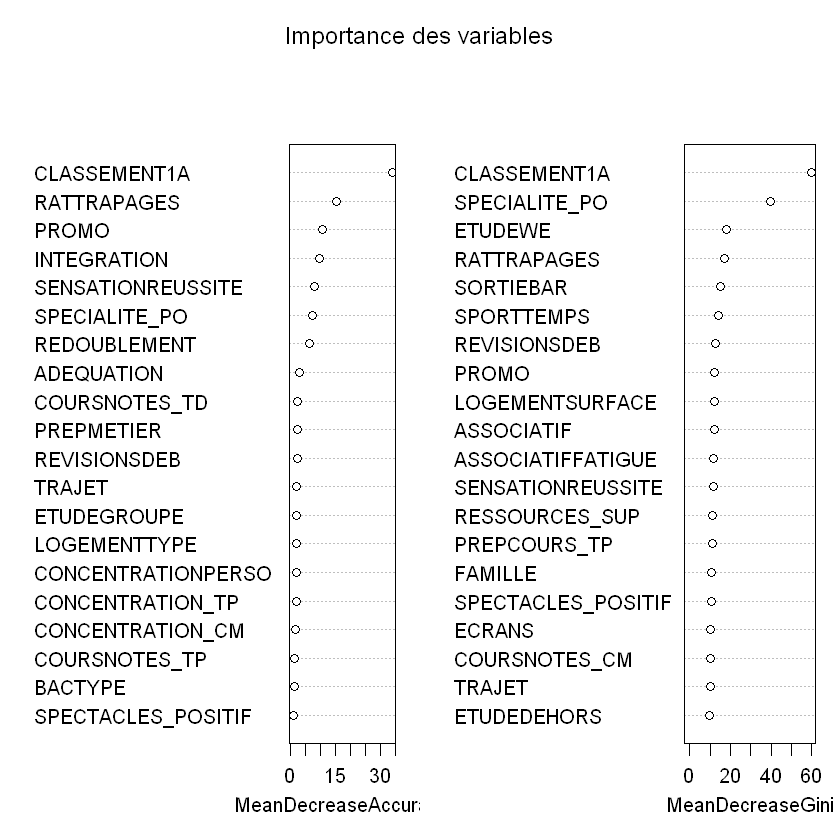

In [95]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_classementdernier <- randomForest(CLASSEMENTDERNIER ~ ., data = group2_classementdernier, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_classementdernier)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_classementdernier, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 20 variables les plus importantes
           main = "Importance des variables")

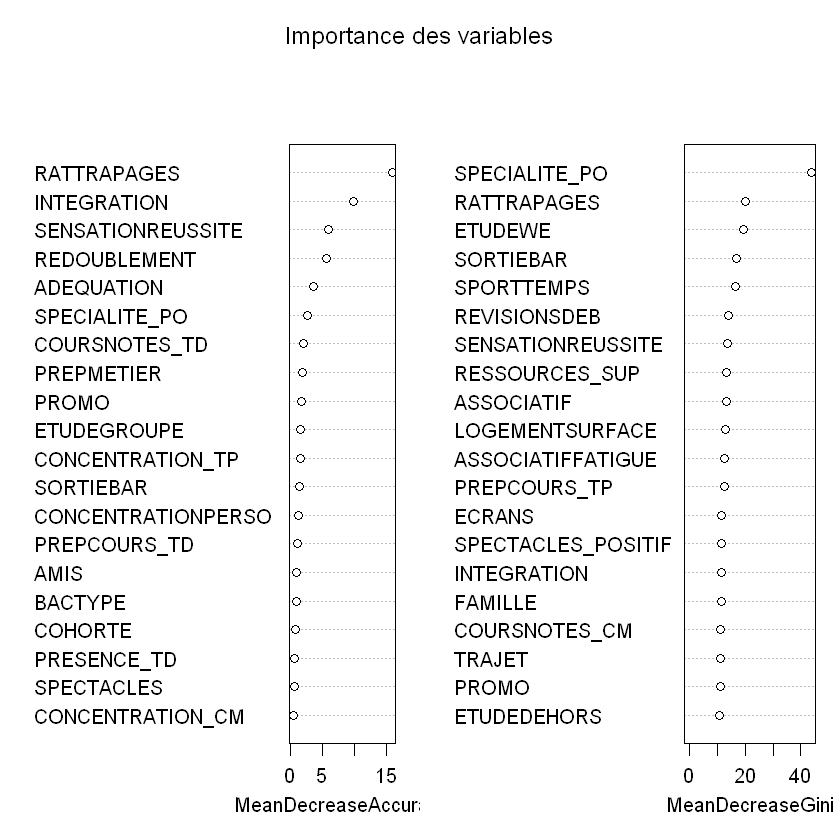

In [96]:
# Suppression des variables ayant une influence trop forte
group2_reduced_classementdernier <- group2_classementdernier %>%
  select(-CLASSEMENT1A)

# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_classementdernier <- randomForest(CLASSEMENTDERNIER ~ ., data = group2_reduced_classementdernier, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_classementdernier)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_classementdernier, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 20 variables les plus importantes
           main = "Importance des variables")

In [97]:
# Test du chi-carré pour RATTRAPAGES et CLASSEMENTDERNIER
chi_square_test_rattrapages <- chisq.test(table(group2_reduced_classementdernier$RATTRAPAGES, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_rattrapages)

# Test du chi-carré pour INTEGRATION et CLASSEMENTDERNIER
chi_square_test_integration <- chisq.test(table(group2_reduced_classementdernier$INTEGRATION, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_integration)

# Test du chi-carré pour SENSATIONREUSSITE et CLASSEMENTDERNIER
chi_square_test_sensationreussite <- chisq.test(table(group2_reduced_classementdernier$SENSATIONREUSSITE, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_sensationreussite)

# Test du chi-carré pour SPECIALITE_PO et CLASSEMENTDERNIER
chi_square_test_specialite_po <- chisq.test(table(group2_reduced_classementdernier$SPECIALITE_PO, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_specialite_po)

# Test du chi-carré pour PREPMETIER et CLASSEMENTDERNIER
chi_square_test_prepmétier <- chisq.test(table(group2_reduced_classementdernier$PREPMETIER, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_prepmétier)

# Test du chi-carré pour COURSNOTES_TD et CLASSEMENTDERNIER
chi_square_test_coursnotes_td <- chisq.test(table(group2_reduced_classementdernier$COURSNOTES_TD, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_coursnotes_td)

# Test du chi-carré pour REDOUBLEMENT et CLASSEMENTDERNIER
chi_square_test_redoublement <- chisq.test(table(group2_reduced_classementdernier$REDOUBLEMENT, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_redoublement)

# Test du chi-carré pour BACTYPE et CLASSEMENTDERNIER
chi_square_test_bactype <- chisq.test(table(group2_reduced_classementdernier$BACTYPE, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_bactype)

# Test du chi-carré pour ETUDEWE et CLASSEMENTDERNIER
chi_square_test_etudewe <- chisq.test(table(group2_reduced_classementdernier$ETUDEWE, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_etudewe)

# Test du chi-carré pour SORTIEBAR et CLASSEMENTDERNIER
chi_square_test_sortiebar <- chisq.test(table(group2_reduced_classementdernier$SORTIEBAR, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_sortiebar)

# Test du chi-carré pour SPORTTEMPS et CLASSEMENTDERNIER
chi_square_test_sporttemps <- chisq.test(table(group2_reduced_classementdernier$SPORTTEMPS, group2_reduced_classementdernier$CLASSEMENTDERNIER))
print(chi_square_test_sporttemps)


Warning message in chisq.test(table(group2_reduced_classementdernier$RATTRAPAGES, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$RATTRAPAGES, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 202.61, df = 12, p-value < 2.2e-16



Warning message in chisq.test(table(group2_reduced_classementdernier$INTEGRATION, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$INTEGRATION, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 65.908, df = 16, p-value = 5.138e-08



Warning message in chisq.test(table(group2_reduced_classementdernier$SENSATIONREUSSITE, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$SENSATIONREUSSITE, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 97.489, df = 12, p-value = 1.726e-15



Warning message in chisq.test(table(group2_reduced_classementdernier$SPECIALITE_PO, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$SPECIALITE_PO, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = NaN, df = 52, p-value = NA


	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$PREPMETIER, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 21.819, df = 8, p-value = 0.005262



Warning message in chisq.test(table(group2_reduced_classementdernier$COURSNOTES_TD, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$COURSNOTES_TD, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 18.409, df = 4, p-value = 0.001026



Warning message in chisq.test(table(group2_reduced_classementdernier$REDOUBLEMENT, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$REDOUBLEMENT, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 65.771, df = 4, p-value = 1.77e-13



Warning message in chisq.test(table(group2_reduced_classementdernier$BACTYPE, group2_reduced_classementdernier$CLASSEMENTDERNIER)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$BACTYPE, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 21.873, df = 8, p-value = 0.005157



Warning message in chisq.test(table(group2_reduced_classementdernier$ETUDEWE, group2_reduced_classementdernier$CLASSEMENTDERNIER)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$ETUDEWE, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 22.953, df = 20, p-value = 0.2911



Warning message in chisq.test(table(group2_reduced_classementdernier$SORTIEBAR, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$SORTIEBAR, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 30.005, df = 16, p-value = 0.01798



Warning message in chisq.test(table(group2_reduced_classementdernier$SPORTTEMPS, :
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2_reduced_classementdernier$SPORTTEMPS, group2_reduced_classementdernier$CLASSEMENTDERNIER)
X-squared = 10.507, df = 16, p-value = 0.8388



`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


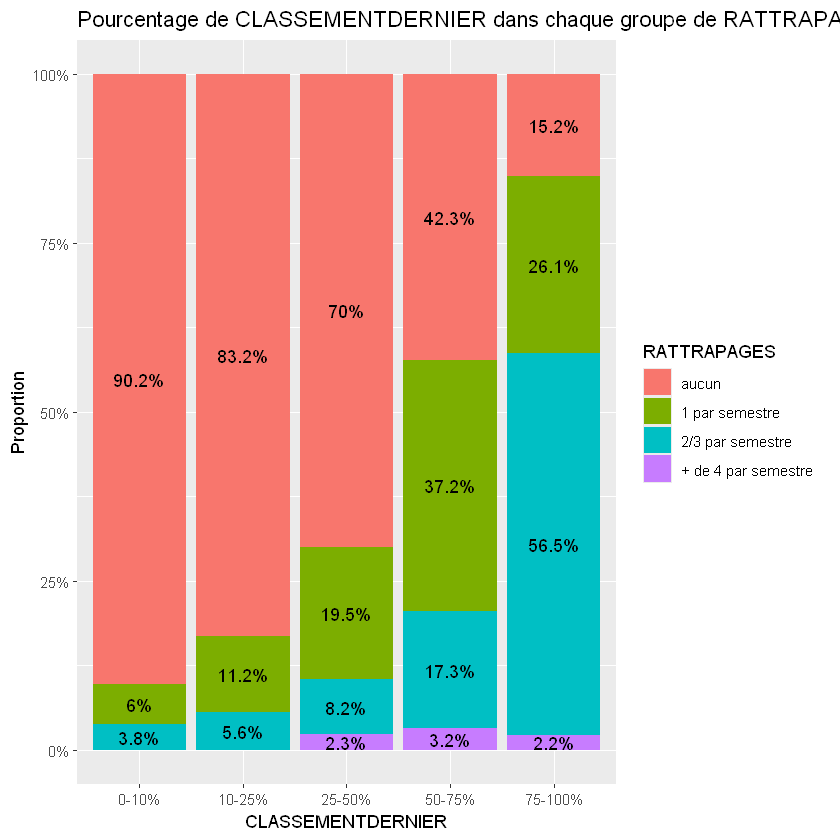

`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


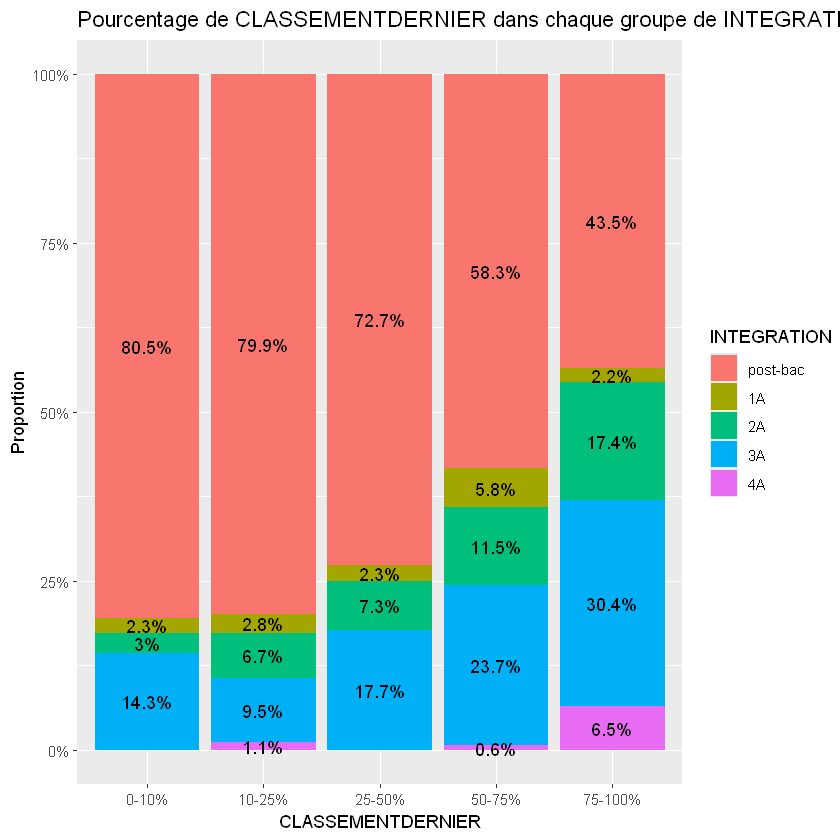

`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


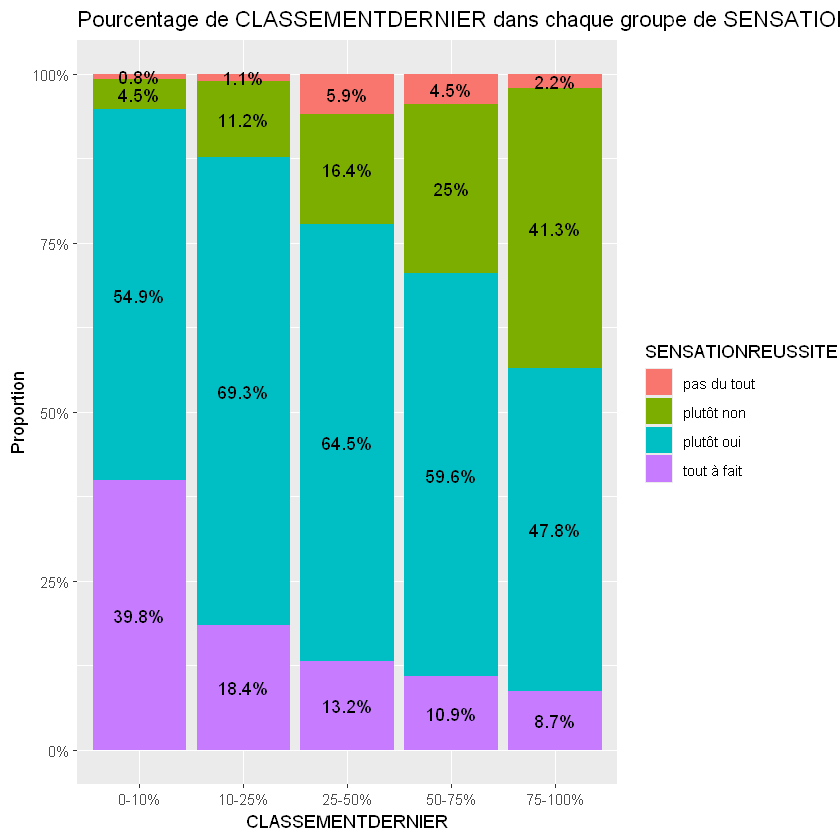

`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


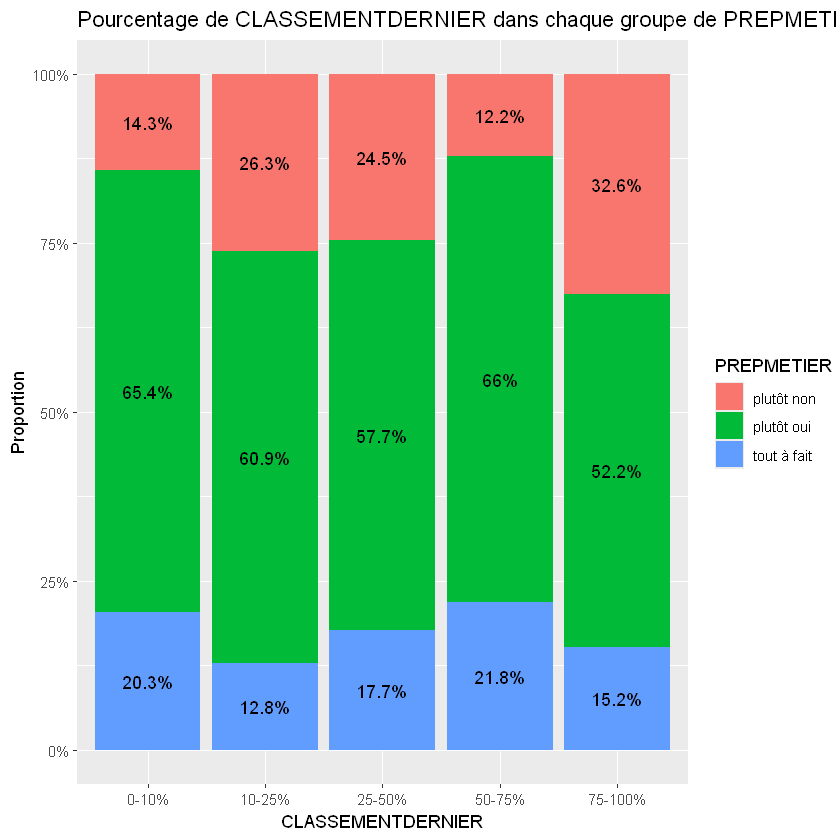

`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


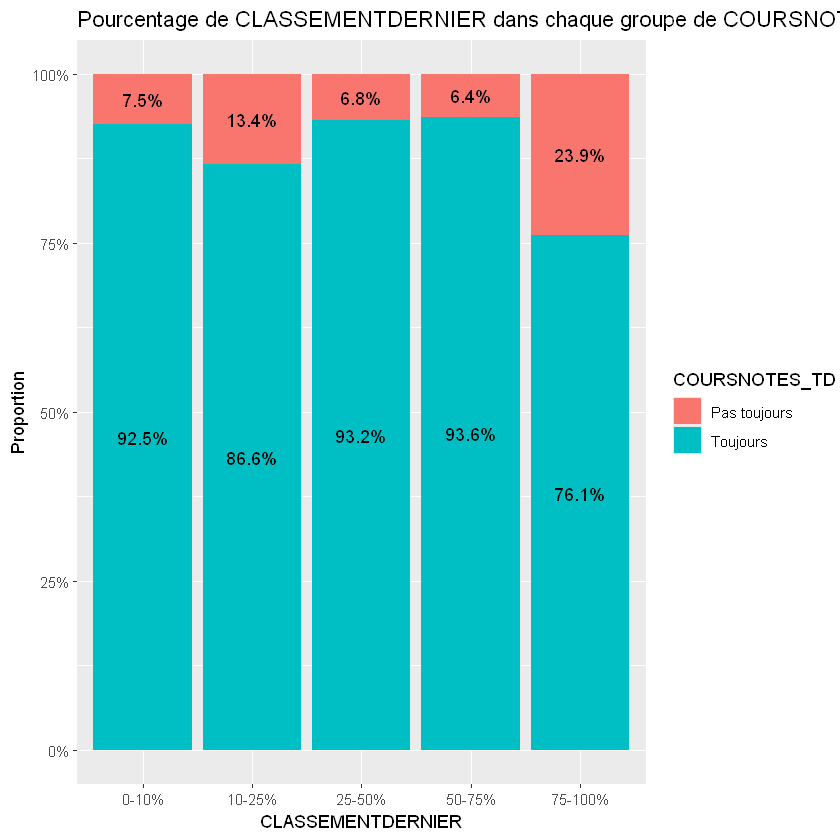

`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


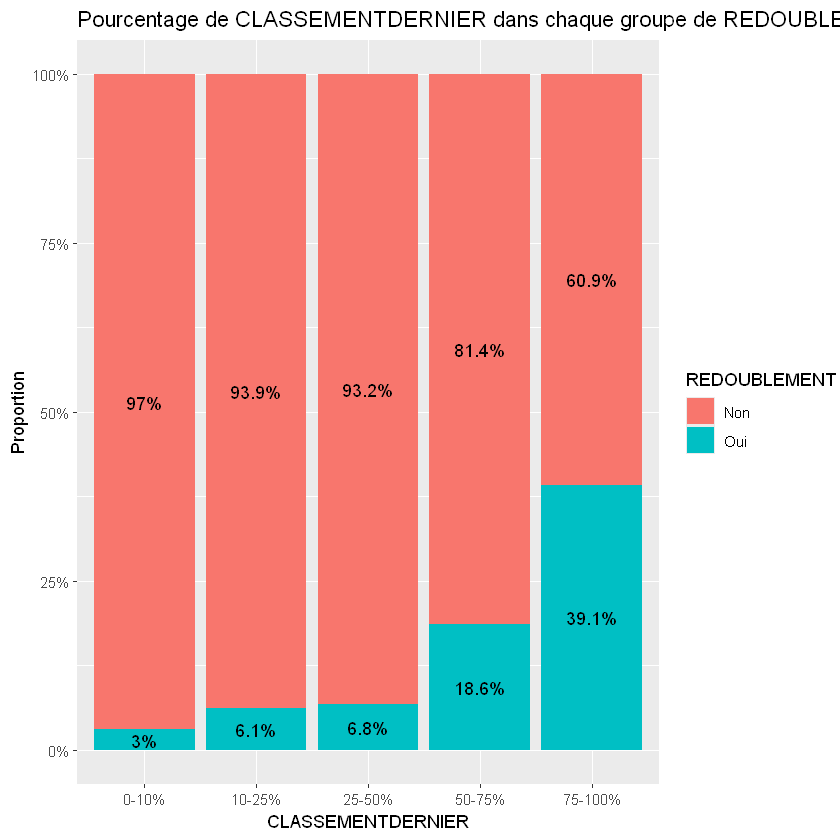

`summarise()` has grouped output by 'SPECIALITE_PO'. You can override using the `.groups` argument.


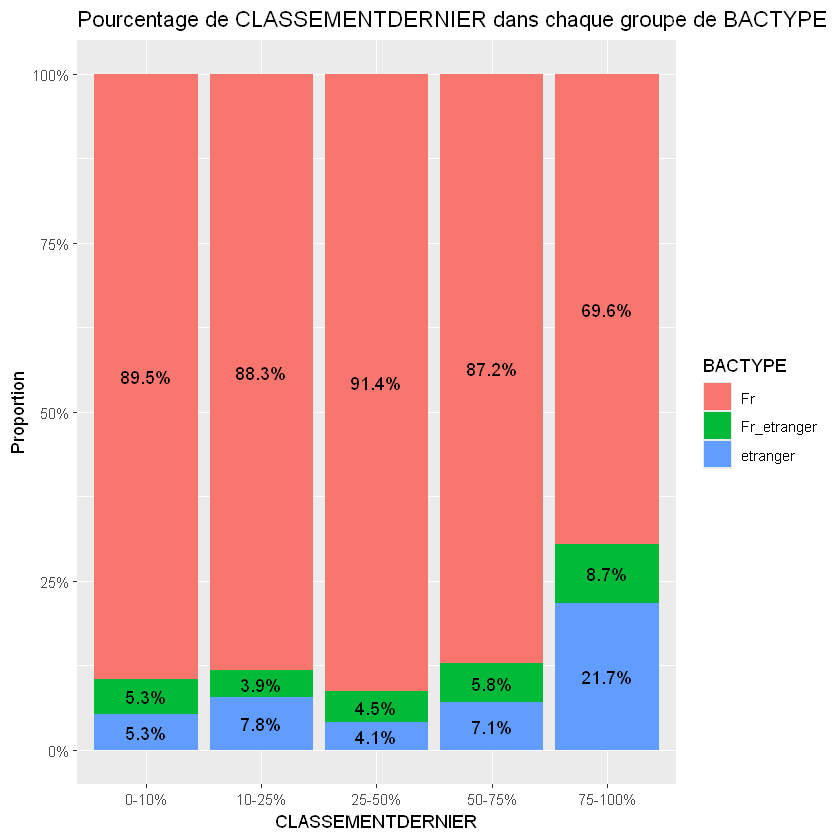

`summarise()` has grouped output by 'ETUDEWE'. You can override using the `.groups` argument.


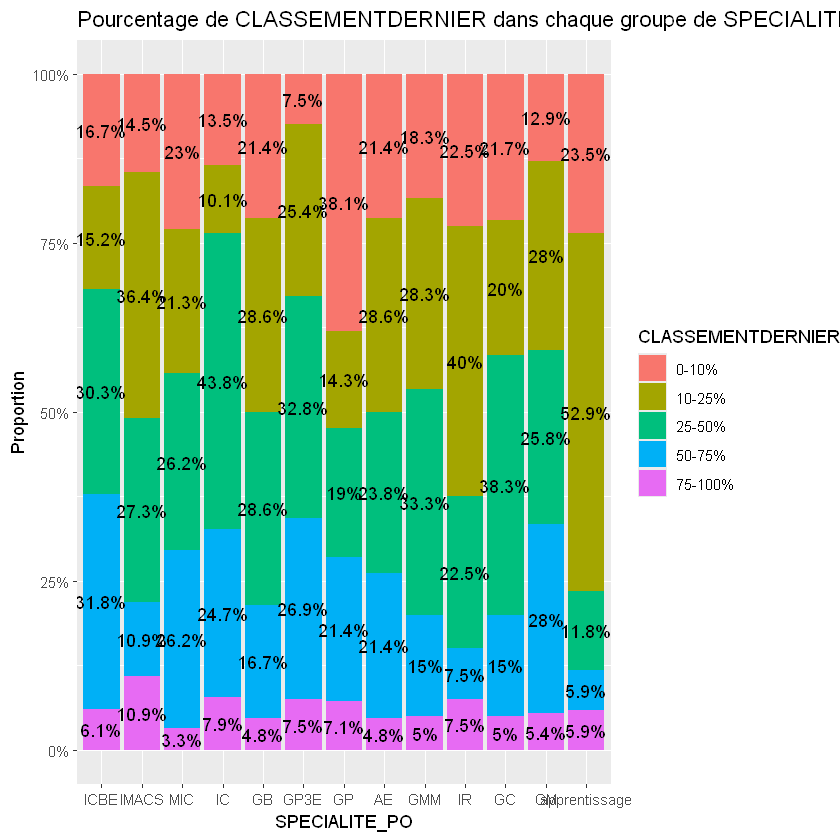

`summarise()` has grouped output by 'SORTIEBAR'. You can override using the `.groups` argument.


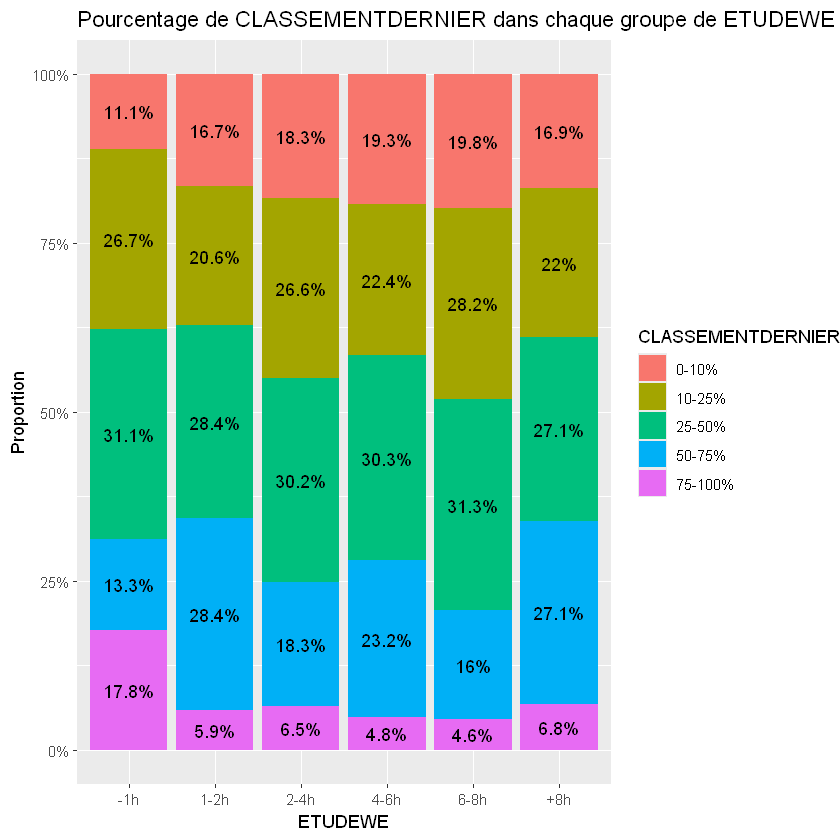

`summarise()` has grouped output by 'SPORTTEMPS'. You can override using the `.groups` argument.


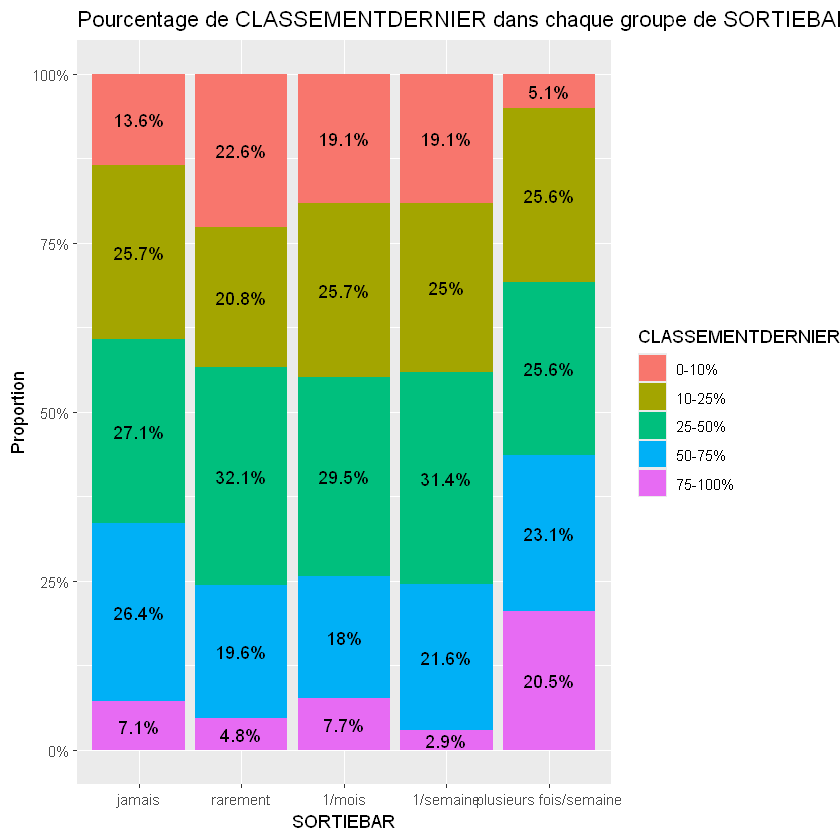

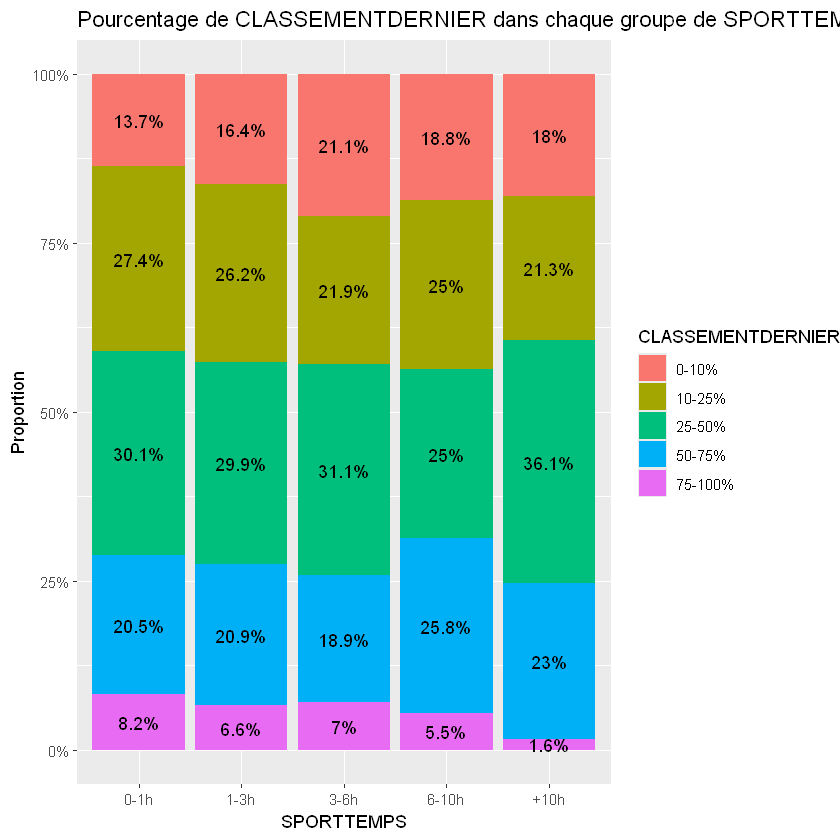

In [100]:
# Fonction pour calculer les pourcentages et tracer les graphiques
plot_percentage <- function(variable_name) {
  group2_percent <- group2_reduced_classementdernier %>%
    group_by_at(vars("CLASSEMENTDERNIER",variable_name )) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count) * 100)
  
  ggplot(group2_percent, aes_string(x = "CLASSEMENTDERNIER", y = "percentage", fill = variable_name)) +
    geom_bar(stat = "identity", position = "fill") +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), 
              position = position_fill(vjust = 0.5)) +
    labs(y = "Proportion", title = paste("Pourcentage de CLASSEMENTDERNIER dans chaque groupe de", variable_name)) +
    scale_y_continuous(labels = scales::percent_format())
}

plot_percentage_2 <- function(variable_name) {
  group2_percent <- group2_reduced_classementdernier %>%
    group_by_at(vars(variable_name,"CLASSEMENTDERNIER" )) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count) * 100)
  
  ggplot(group2_percent, aes_string(x = variable_name, y = "percentage", fill =  "CLASSEMENTDERNIER")) +
    geom_bar(stat = "identity", position = "fill") +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), 
              position = position_fill(vjust = 0.5)) +
    labs(y = "Proportion", title = paste("Pourcentage de CLASSEMENTDERNIER dans chaque groupe de", variable_name)) +
    scale_y_continuous(labels = scales::percent_format())
}


# Graphiques pour les variables du graphique de gauche
plot_percentage("RATTRAPAGES")
plot_percentage("INTEGRATION")
plot_percentage("SENSATIONREUSSITE")
plot_percentage("PREPMETIER")
plot_percentage("COURSNOTES_TD")
plot_percentage("REDOUBLEMENT")
plot_percentage("BACTYPE")
plot_percentage_2("SPECIALITE_PO")
plot_percentage_2("ETUDEWE")
plot_percentage_2("SORTIEBAR")
plot_percentage_2("SPORTTEMPS")

#### IV.1.3. Analyse pour les étudiants 4A 

In [101]:
# Filtrer les données pour obtenir uniquement les étudiants de la promotion 4A
etudiants_4A <- subset(group2, PROMO == "4A")

# Supprimer la colonne PROMO car elle n'est plus nécessaire
etudiants_4A <- etudiants_4A[ , !(names(etudiants_4A) %in% c("PROMO"))]

# Sauvegarder les données filtrées dans un fichier Excel
write_xlsx(etudiants_4A, "etudiants_4A.xlsx")

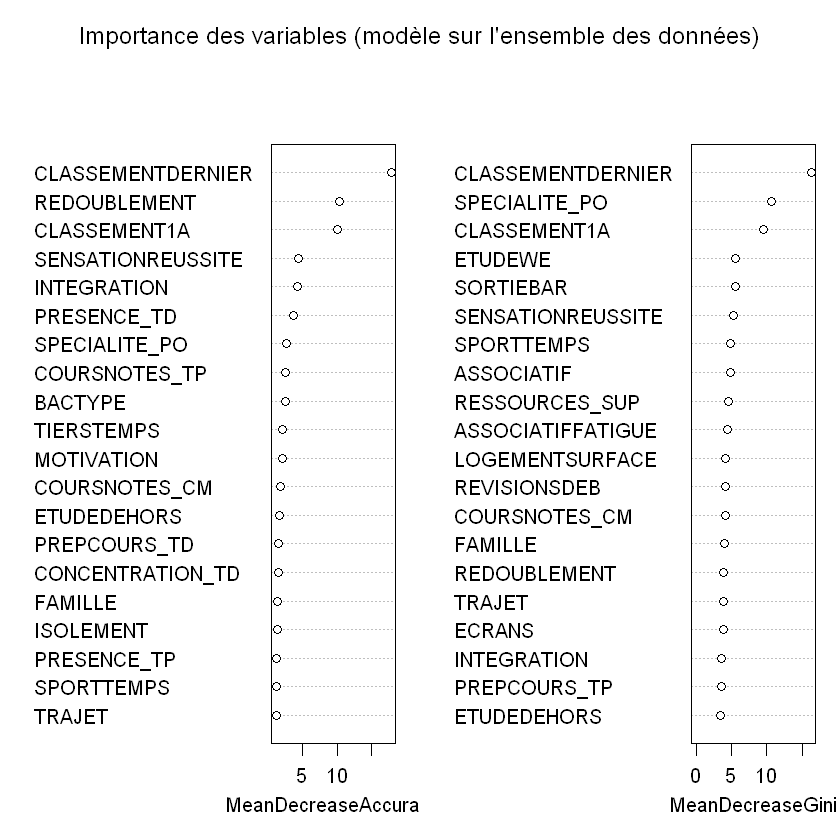

In [102]:
# Fixer le seed pour garantir la reproductibilité
set.seed(151)

# Construire le modèle Random Forest sur les données filtrées
rf_model_full <- randomForest(RATTRAPAGES ~ ., data = etudiants_4A, importance = TRUE)

# Extraire l'importance des variables
var_importance_full <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 20,  # Afficher les 20 variables les plus importantes
           main = "Importance des variables (modèle sur l'ensemble des données)")


In [103]:
etudiants_4A_reduced <- etudiants_4A %>%
  select(-SENSATIONREUSSITE, -REDOUBLEMENT, -CLASSEMENT1A, -CLASSEMENTDERNIER)

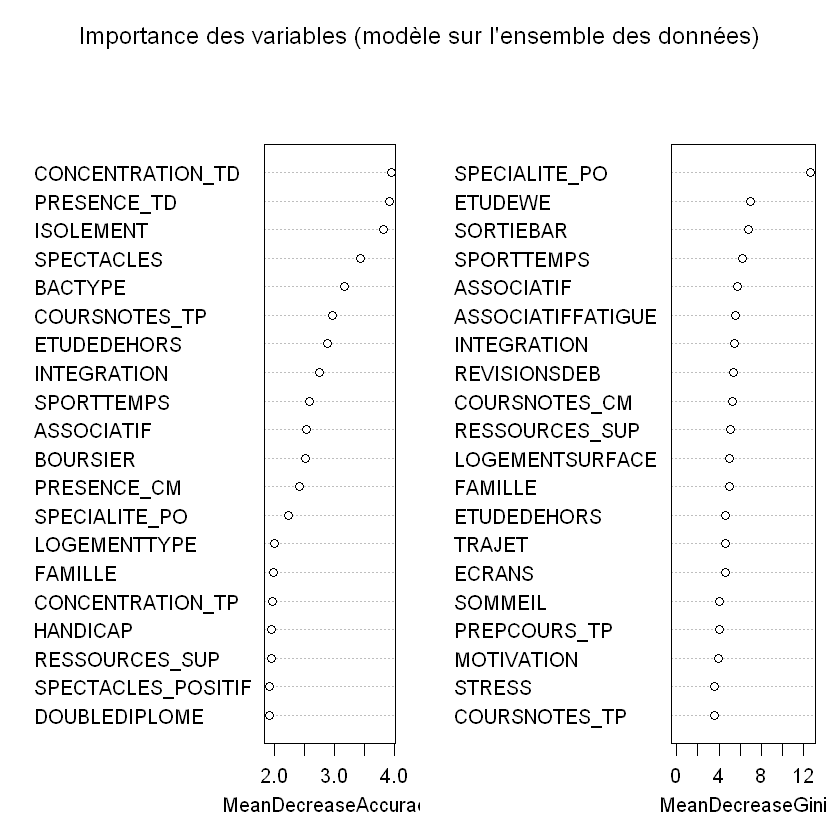

In [104]:
# Fixer le seed pour garantir la reproductibilité
set.seed(151)

# Construire le modèle Random Forest sur les données filtrées
rf_model_full <- randomForest(RATTRAPAGES ~ ., data = etudiants_4A_reduced, importance = TRUE)

# Extraire l'importance des variables
var_importance_full <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 20,  # Afficher les 20 variables les plus importantes
           main = "Importance des variables (modèle sur l'ensemble des données)")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : PRESENCE_TD"

	Pearson's Chi-squared test

data:  table_var
X-squared = 23.041, df = 3, p-value = 3.96e-05



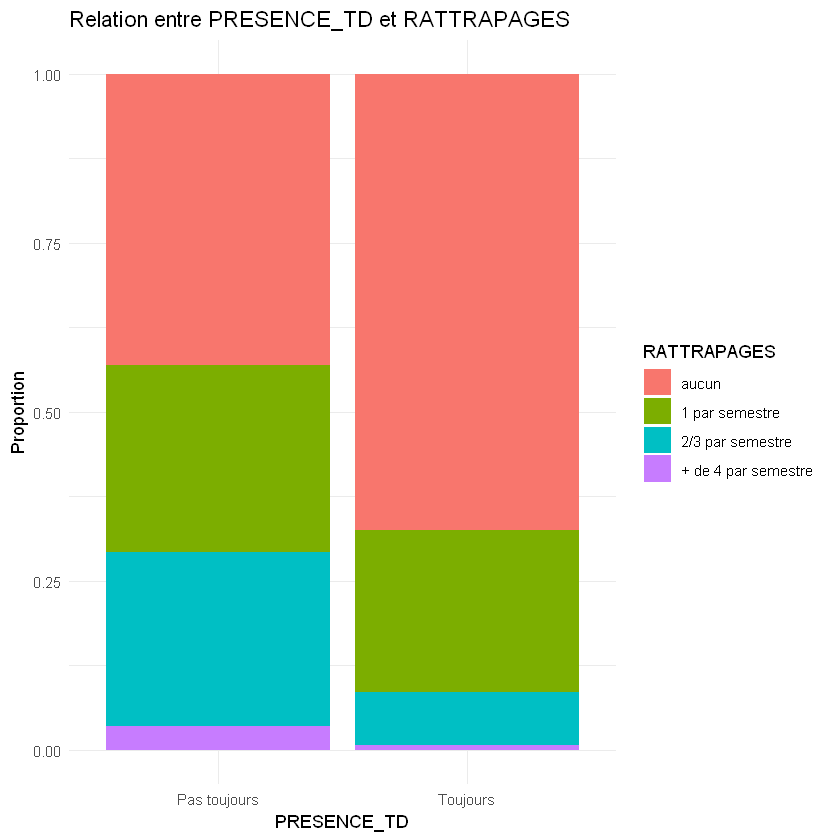

In [105]:
# Créer un tableau de contingence entre PRESENCE_TD et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$PRESENCE_TD, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour PRESENCE_TD
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : PRESENCE_TD")
print(chi_test)

# Créer le graphique de barres empilées pour PRESENCE_TD
plot <- ggplot(etudiants_4A_reduced, aes(x = PRESENCE_TD, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre PRESENCE_TD et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : SORTIEBAR"

	Pearson's Chi-squared test

data:  table_var
X-squared = 25.463, df = 12, p-value = 0.01277



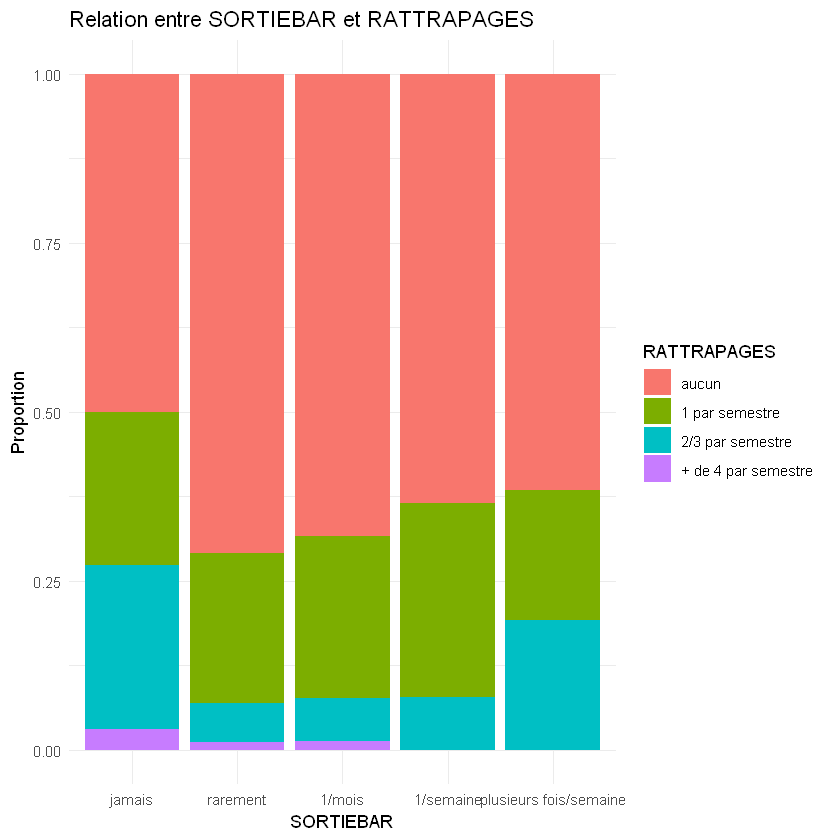

In [106]:
# Créer un tableau de contingence entre SORTIEBAR et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$SORTIEBAR, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour SORTIEBAR
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : SORTIEBAR")
print(chi_test)

# Créer le graphique de barres empilées pour SORTIEBAR
plot <- ggplot(etudiants_4A_reduced, aes(x = SORTIEBAR, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SORTIEBAR et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : PRESENCE_CM"

	Pearson's Chi-squared test

data:  table_var
X-squared = 13.965, df = 6, p-value = 0.03003



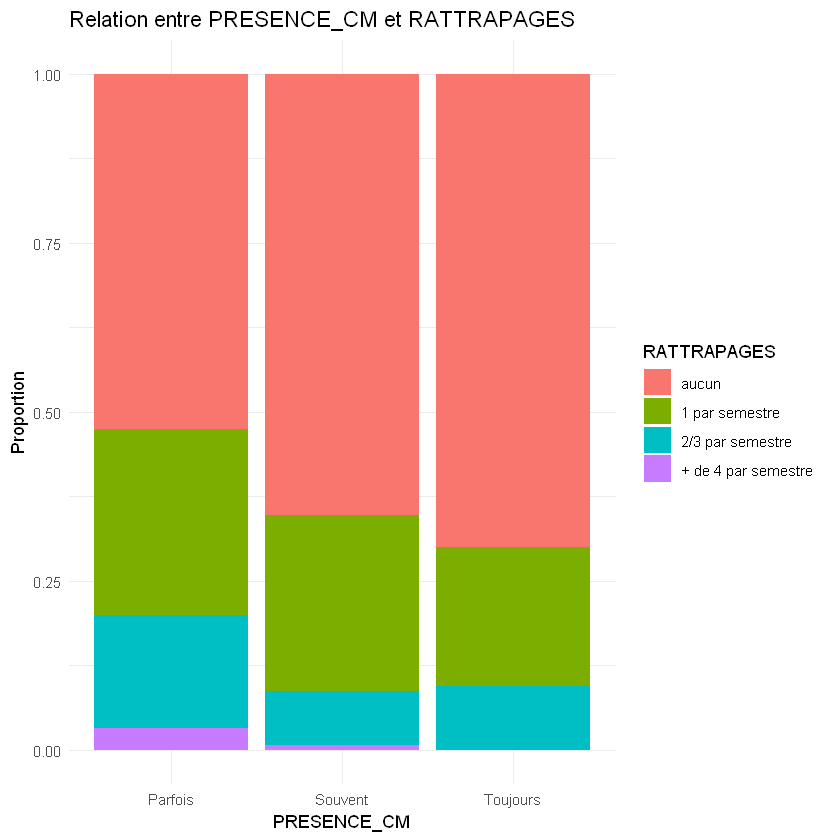

In [107]:
# Créer un tableau de contingence entre PRESENCE_CM et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$PRESENCE_CM, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour PRESENCE_CM
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : PRESENCE_CM")
print(chi_test)

# Créer le graphique de barres empilées pour PRESENCE_CM
plot <- ggplot(etudiants_4A_reduced, aes(x = PRESENCE_CM, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre PRESENCE_CM et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : CONCENTRATION_TD"

	Pearson's Chi-squared test

data:  table_var
X-squared = 17.779, df = 6, p-value = 0.00681



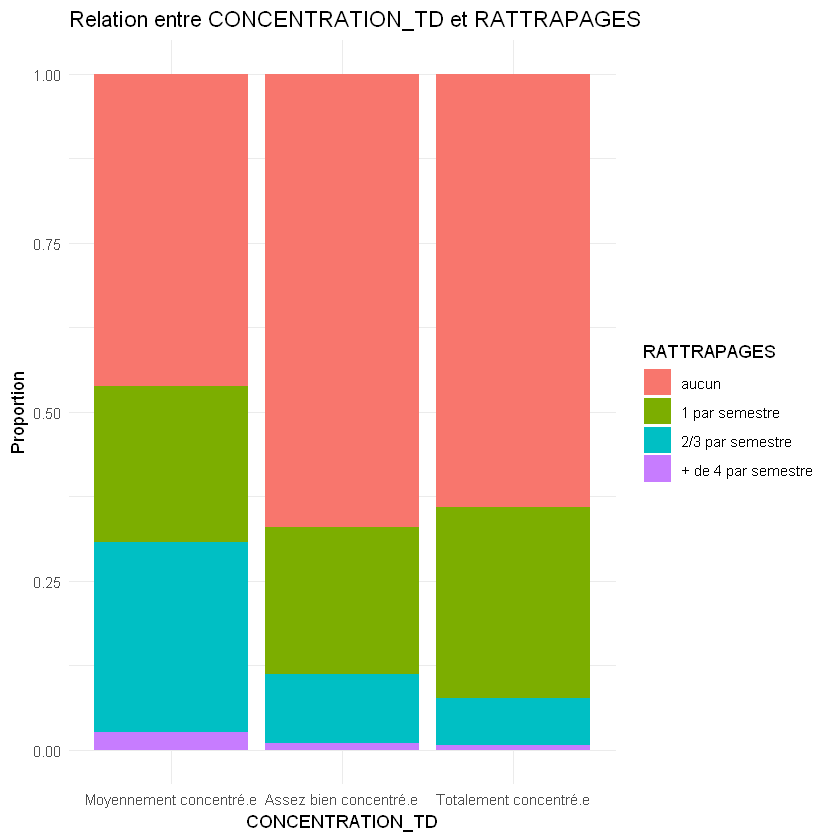

In [108]:
# Créer un tableau de contingence entre CONCENTRATION_TD et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$CONCENTRATION_TD, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour CONCENTRATION_TD
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : CONCENTRATION_TD")
print(chi_test)

# Créer le graphique de barres empilées pour CONCENTRATION_TD
plot <- ggplot(etudiants_4A_reduced, aes(x = CONCENTRATION_TD, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre CONCENTRATION_TD et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : BACTYPE"

	Pearson's Chi-squared test

data:  table_var
X-squared = 20.253, df = 6, p-value = 0.002496



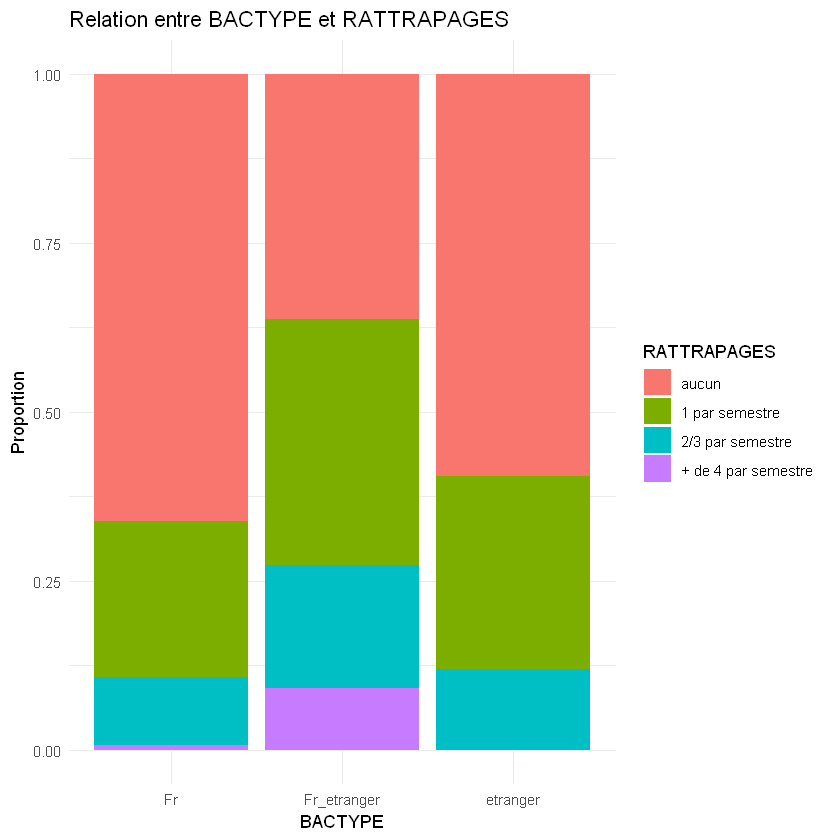

In [109]:
# Créer un tableau de contingence entre BACTYPE et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$BACTYPE, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour BACTYPE
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : BACTYPE")
print(chi_test)

# Créer le graphique de barres empilées pour BACTYPE
plot <- ggplot(etudiants_4A_reduced, aes(x = BACTYPE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre BACTYPE et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : INTEGRATION"

	Pearson's Chi-squared test

data:  table_var
X-squared = 20.273, df = 12, p-value = 0.06209



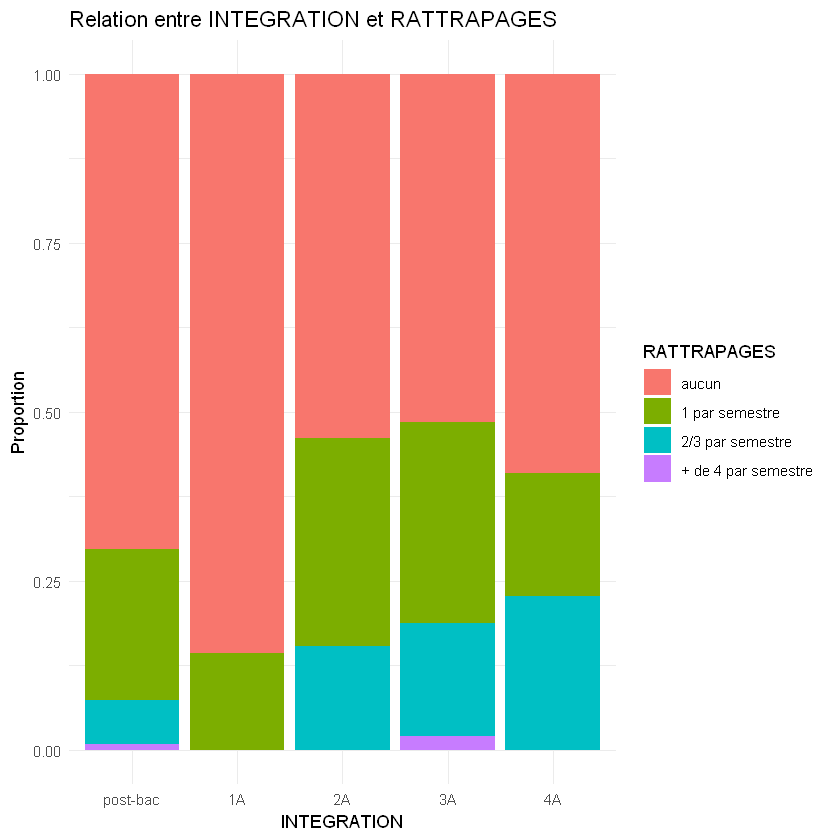

In [110]:
# Créer un tableau de contingence entre INTEGRATION et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$INTEGRATION, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour INTEGRATION
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : INTEGRATION")
print(chi_test)

# Créer le graphique de barres empilées pour INTEGRATION
plot <- ggplot(etudiants_4A_reduced, aes(x = INTEGRATION, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre INTEGRATION et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : ISOLEMENT"

	Pearson's Chi-squared test

data:  table_var
X-squared = 8.2169, df = 6, p-value = 0.2226



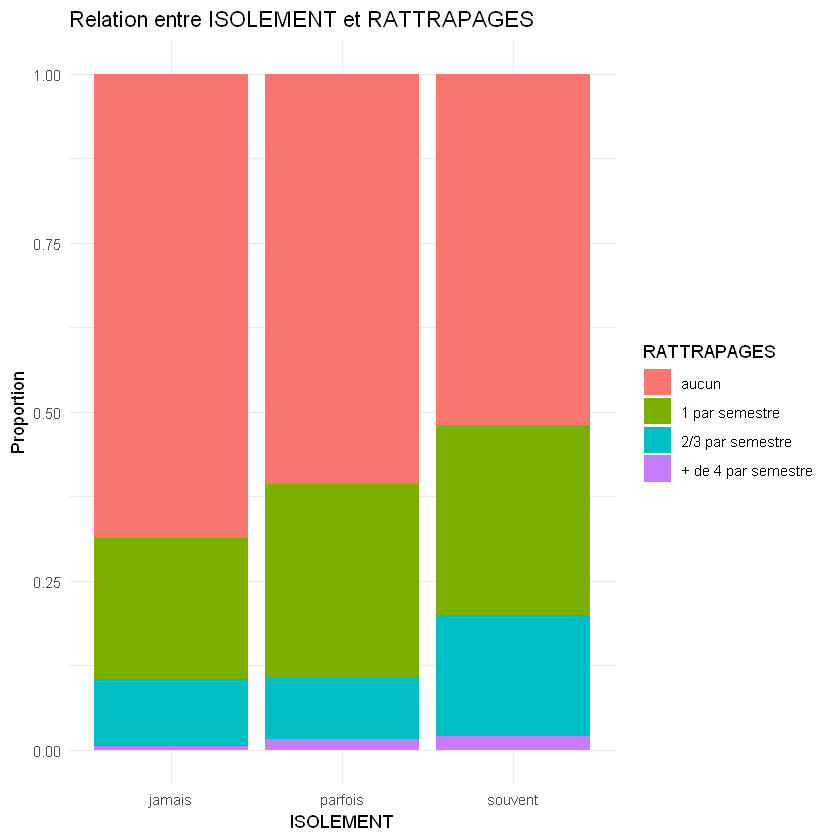

In [111]:
# Créer un tableau de contingence entre ISOLEMENT et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$ISOLEMENT, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour ISOLEMENT
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : ISOLEMENT")
print(chi_test)

# Créer le graphique de barres empilées pour ISOLEMENT
plot <- ggplot(etudiants_4A_reduced, aes(x = ISOLEMENT, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ISOLEMENT et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : SPECIALITE_PO"

	Pearson's Chi-squared test

data:  table_var
X-squared = NaN, df = 39, p-value = NA



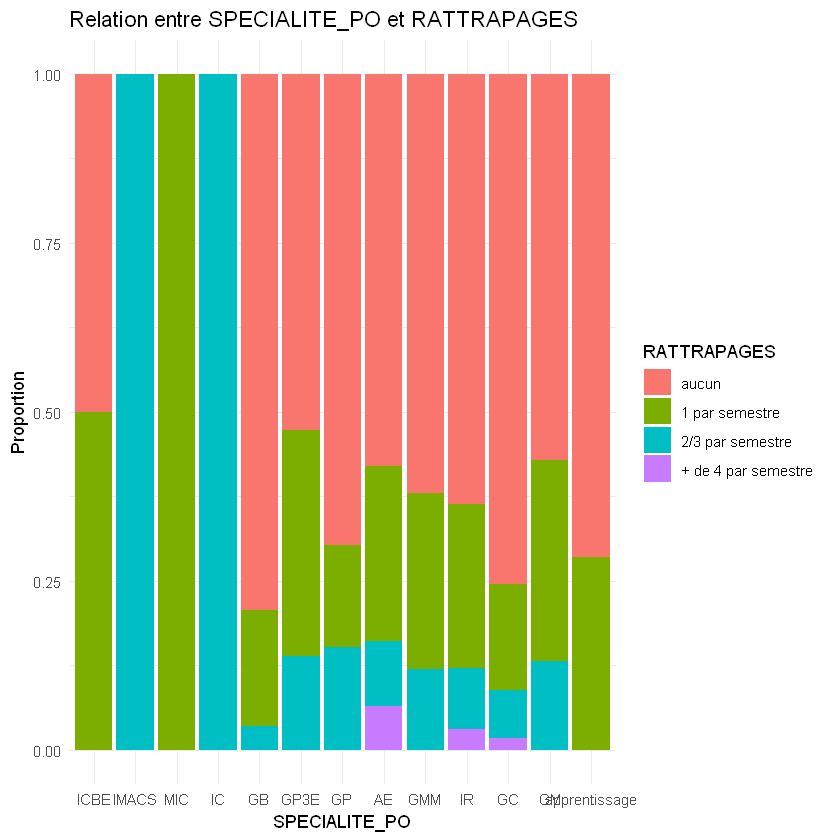

In [112]:
# Créer un tableau de contingence entre SPECIALITE_PO et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$SPECIALITE_PO, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour SPECIALITE_PO
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : SPECIALITE_PO")
print(chi_test)

# Créer le graphique de barres empilées pour SPECIALITE_PO
plot <- ggplot(etudiants_4A_reduced, aes(x = SPECIALITE_PO, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SPECIALITE_PO et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


In [113]:
print(sum(etudiants_4A_reduced$SPECIALITE_PO == 'MIC'))
print(sum(etudiants_4A_reduced$SPECIALITE_PO == 'IMACS'))
print(sum(etudiants_4A_reduced$SPECIALITE_PO == 'IC'))
print(sum(etudiants_4A_reduced$SPECIALITE_PO == 'ICBE'))

[1] 1
[1] 1
[1] 1
[1] 2


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : COHORTE"

	Pearson's Chi-squared test

data:  table_var
X-squared = 15.707, df = 15, p-value = 0.4018



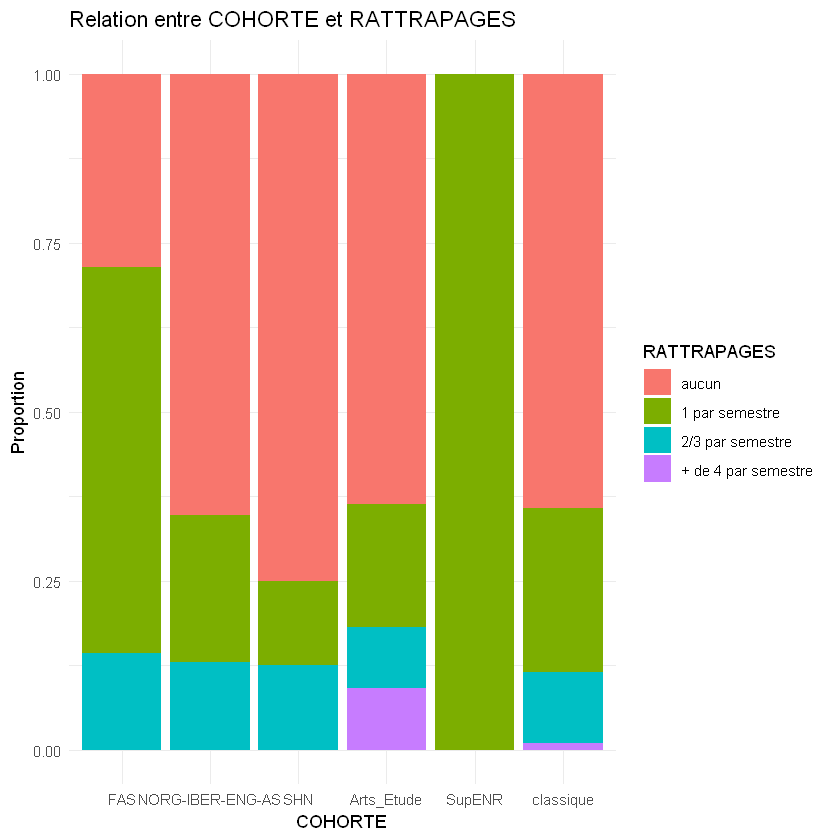

In [114]:
# Créer un tableau de contingence entre COHORTE et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$COHORTE, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour COHORTE
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : COHORTE")
print(chi_test)

# Créer le graphique de barres empilées pour COHORTE
plot <- ggplot(etudiants_4A_reduced, aes(x = COHORTE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre COHORTE et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


In [115]:
print(sum(etudiants_4A_reduced$COHORTE == 'SupENR'))
print(sum(etudiants_4A_reduced$COHORTE == 'FAS'))


[1] 1
[1] 7


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : TIERSTEMPS"

	Pearson's Chi-squared test

data:  table_var
X-squared = 0.43361, df = 3, p-value = 0.9332



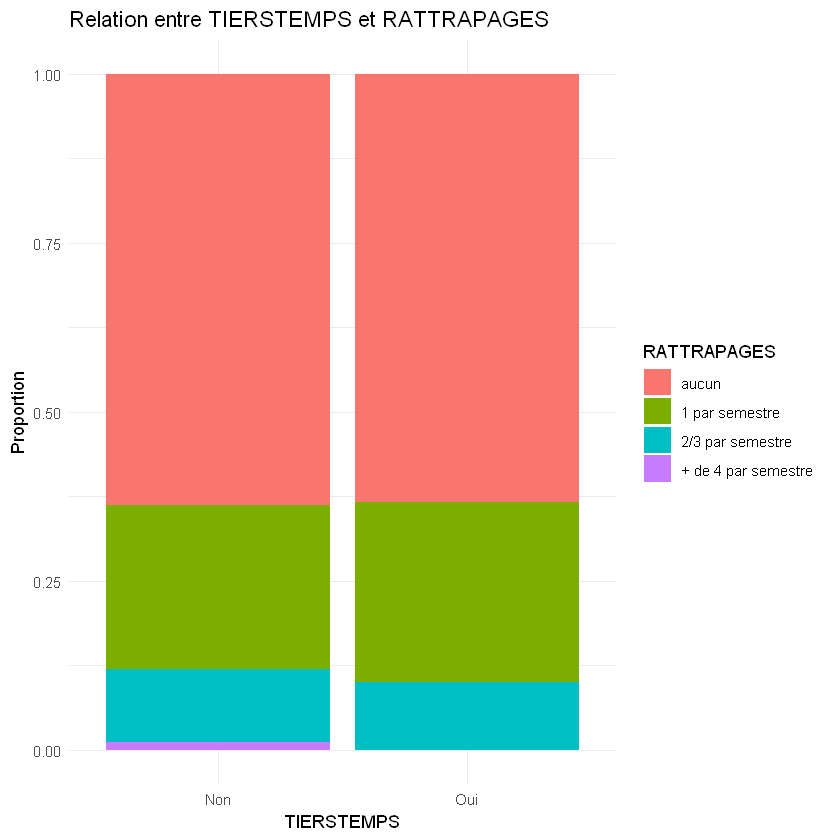

In [116]:
# Créer un tableau de contingence entre TIERSTEMPS et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$TIERSTEMPS, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour TIERSTEMPS
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : TIERSTEMPS")
print(chi_test)

# Créer le graphique de barres empilées pour TIERSTEMPS
plot <- ggplot(etudiants_4A_reduced, aes(x = TIERSTEMPS, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre TIERSTEMPS et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : COURSNOTES_TD"

	Pearson's Chi-squared test

data:  table_var
X-squared = 10.51, df = 3, p-value = 0.01469



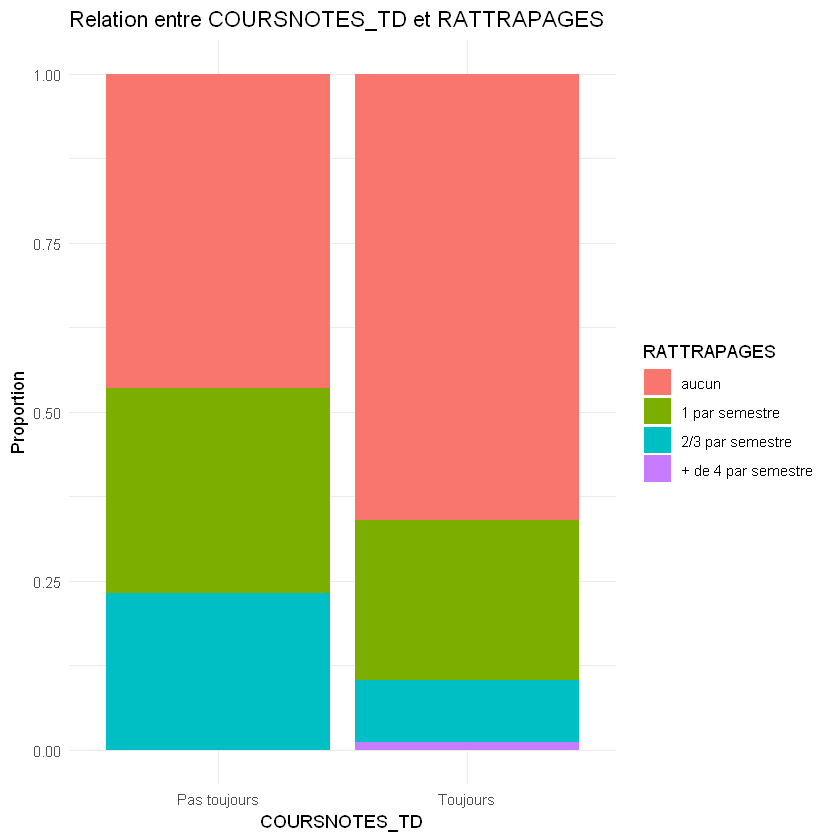

In [117]:
# Créer un tableau de contingence entre COURSNOTES_TD et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$COURSNOTES_TD, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour COURSNOTES_TD
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : COURSNOTES_TD")
print(chi_test)

# Créer le graphique de barres empilées pour COURSNOTES_TD
plot <- ggplot(etudiants_4A_reduced, aes(x = COURSNOTES_TD, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre COURSNOTES_TD et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : SPECTACLES"

	Pearson's Chi-squared test

data:  table_var
X-squared = 8.8321, df = 6, p-value = 0.1832



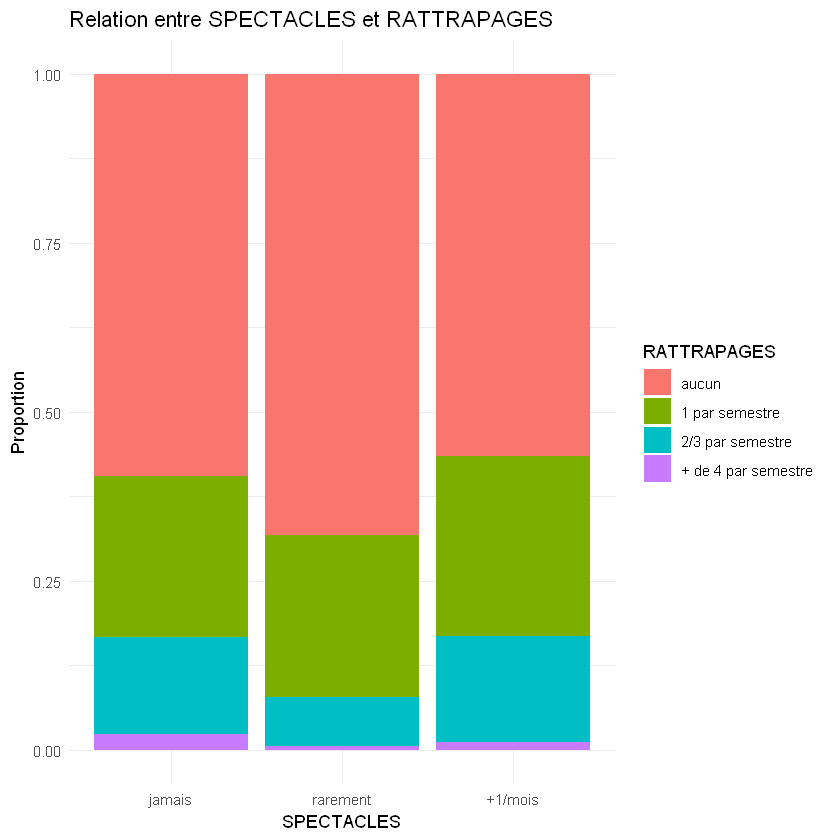

In [118]:
# Créer un tableau de contingence entre SPECTACLES et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$SPECTACLES, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour SPECTACLES
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : SPECTACLES")
print(chi_test)

# Créer le graphique de barres empilées pour SPECTACLES
plot <- ggplot(etudiants_4A_reduced, aes(x = SPECTACLES, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SPECTACLES et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : FAMILLE"

	Pearson's Chi-squared test

data:  table_var
X-squared = 14.4, df = 9, p-value = 0.1088



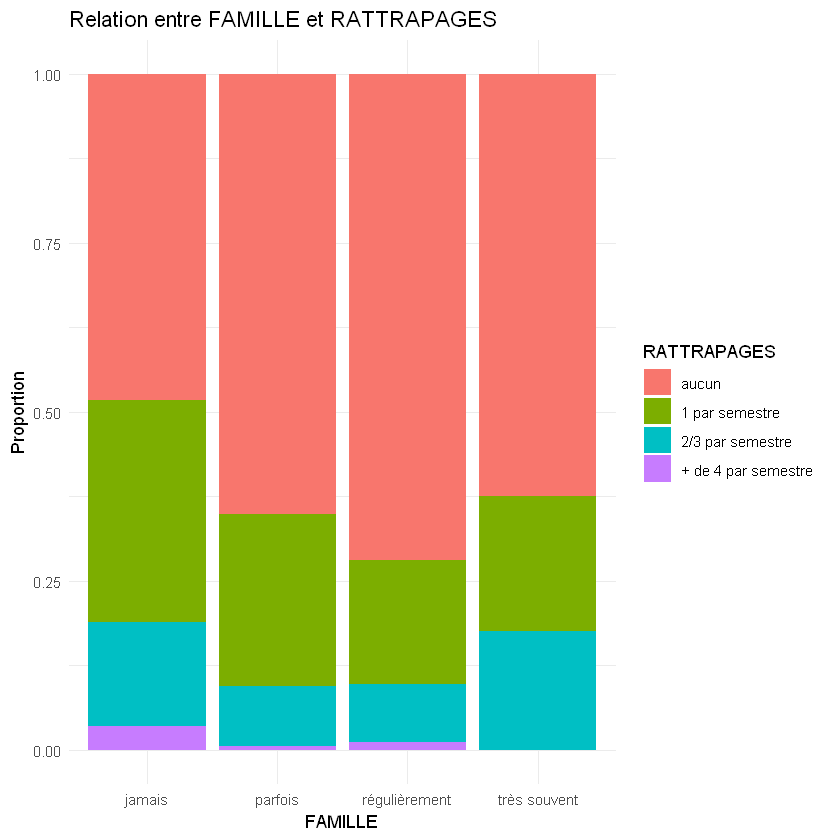

In [119]:
# Créer un tableau de contingence entre FAMILLE et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$FAMILLE, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour FAMILLE
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : FAMILLE")
print(chi_test)

# Créer le graphique de barres empilées pour FAMILLE
plot <- ggplot(etudiants_4A_reduced, aes(x = FAMILLE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre FAMILLE et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : ETUDEWE"

	Pearson's Chi-squared test

data:  table_var
X-squared = 16.981, df = 15, p-value = 0.32



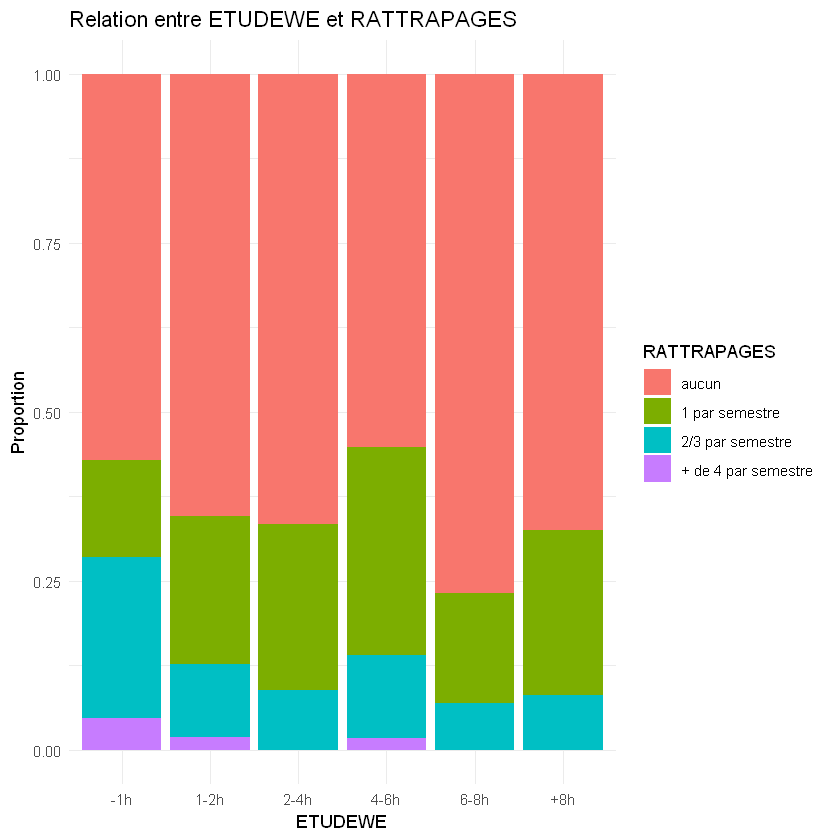

In [120]:
# Créer un tableau de contingence entre ETUDEWE et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$ETUDEWE, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour ETUDEWE
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : ETUDEWE")
print(chi_test)

# Créer le graphique de barres empilées pour ETUDEWE
plot <- ggplot(etudiants_4A_reduced, aes(x = ETUDEWE, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre ETUDEWE et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


[1] "Résultat du test Chi-deux pour la variable : SPORTTEMPS"

	Pearson's Chi-squared test

data:  table_var
X-squared = 17.349, df = 12, p-value = 0.1369



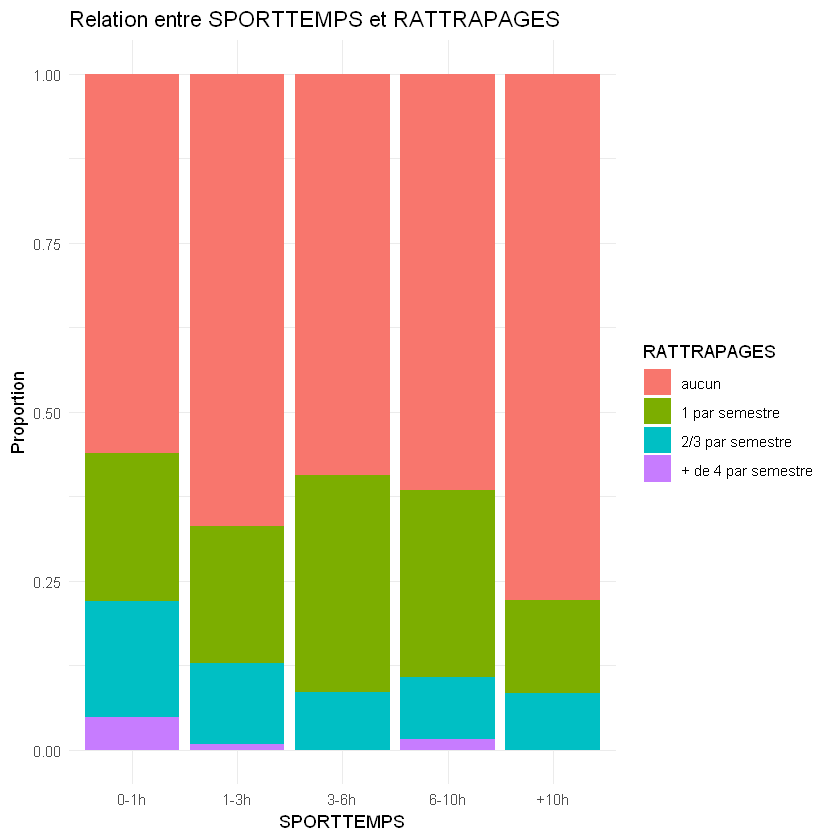

In [121]:
# Créer un tableau de contingence entre SPORTTEMPS et RATTRAPAGES
table_var <- table(etudiants_4A_reduced$SPORTTEMPS, etudiants_4A_reduced$RATTRAPAGES)

# Réaliser le test Chi-deux pour SPORTTEMPS
chi_test <- chisq.test(table_var)

# Afficher le résultat du test Chi-deux
print("Résultat du test Chi-deux pour la variable : SPORTTEMPS")
print(chi_test)

# Créer le graphique de barres empilées pour SPORTTEMPS
plot <- ggplot(etudiants_4A_reduced, aes(x = SPORTTEMPS, fill = RATTRAPAGES)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SPORTTEMPS et RATTRAPAGES") +
  theme_minimal()

# Afficher le graphique
print(plot)

Nous constatons que trois variables liées à la presence et l'attitude au TD semblent être importantes pour la variable RATTRAPAGES. Je trouve cela logique et assez similaire à mes expériences à l'INSA. En effet, je pense que si nous participons aux cours de TD et que nous nous concentrons sur la résolution des exercices, nous pouvons non seulement reviser les connaissances acquises en CM, mais aussi appliquer ces connaissances aux exercices. Par conséquent, je pense que comprendre les exercices en TD augmente nos chances de réussir les évaluations. D'après mon expérience, la seule matière pour laquelle j'ai dû passer un rattrapage est celle où, pour diverses raisons, je n'ai pas assisté à tous les cours de TD. Si nous ne faisons pas les exercices au fur et à mesure des cours, nous risquons d'accumuler beaucoup de exercices lors de la révision pour les examens. De plus, pour moi, il y a des matières pour lesquelles les corrections des TD sont disponibles sur Google Drive, et je pensais pouvoir les lire moi-même sans assister aux cours de TD. Cependant, cela m'a pris plus de temps pour les lire, ou bien je ne les ai pas lues avant la fin du semestre et mes notes dans ces matières n'ont pas été excellentes. En conclusion, la participation et la concentration pendant les cours de TD sont cruciales pour la réussite académique des étudiants. 

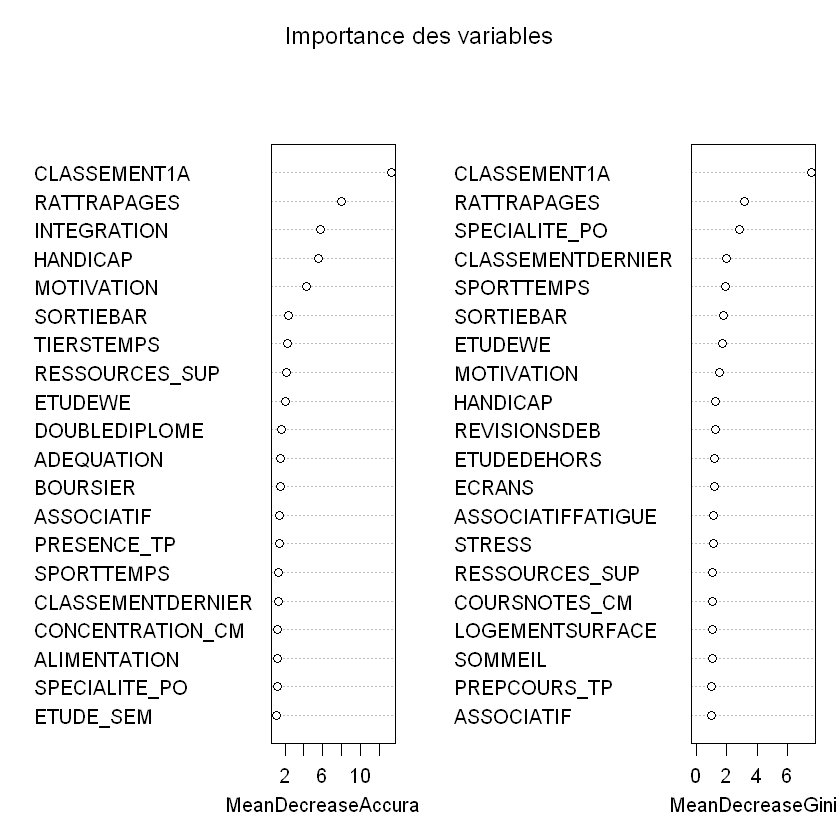

In [122]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_4a_redoublement <- randomForest(REDOUBLEMENT ~ ., data = etudiants_4A, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_4a_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_4a_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

In [123]:
# Suppression des variables ayant une influence trop forte
etudiants_4A_reduced_redoublement <- etudiants_4A %>%
  select(-RATTRAPAGES, -CLASSEMENT1A)

In [124]:
# Supprimer les observations avec des modalités sans cas dans SPECIALITE_PO et INTEGRATION
etudiants_4A_reduced_redoublement <- droplevels(etudiants_4A_reduced_redoublement[etudiants_4A_reduced_redoublement$SPECIALITE_PO != "1A" & 
                                                                               etudiants_4A_reduced_redoublement$INTEGRATION != "5A", ])

# Vérifier les nouvelles distributions
print("Nouvelle distribution de SPECIALITE_PO :")
print(table(etudiants_4A_reduced_redoublement$SPECIALITE_PO))

print("Nouvelle distribution de INTEGRATION :")
print(table(etudiants_4A_reduced_redoublement$INTEGRATION))

[1] "Nouvelle distribution de SPECIALITE_PO :"

         ICBE         IMACS           MIC            IC            GB 
            2             1             1             1            29 
         GP3E            GP            AE           GMM            IR 
           36            33            31            50            33 
           GC            GM apprentissage 
           57            84            14 
[1] "Nouvelle distribution de INTEGRATION :"

post-bac       1A       2A       3A       4A 
     216        7       26      101       22 


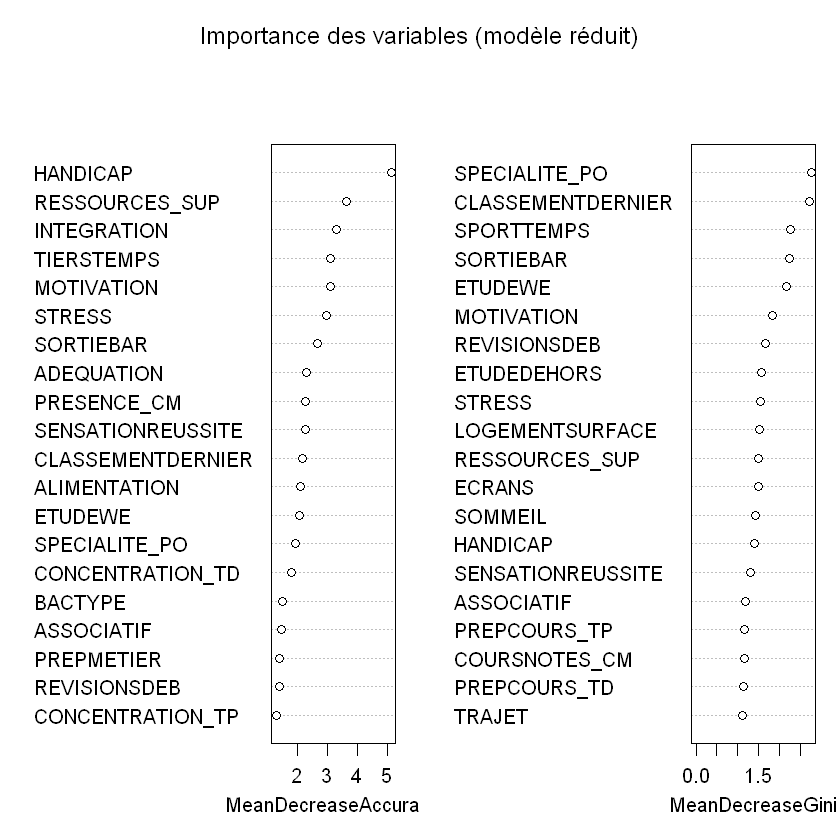

In [125]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_4a_redoublement <- randomForest(REDOUBLEMENT ~ ., data = etudiants_4A_reduced_redoublement, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_4a_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_4a_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables (modèle réduit)")

In [128]:
sum(etudiants_4A_reduced_redoublement$HANDICAP=='oui')

[1] 8

Warning message in chisq.test(table(group2[[var]], group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"


[1] "Test du chi-carré pour la variable : HANDICAP"

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 6.8002, df = 1, p-value = 0.009115



`summarise()` has grouped output by 'HANDICAP'. You can override using the `.groups` argument.


[1] "Test du chi-carré pour la variable : RESSOURCES_SUP"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 11.208, df = 3, p-value = 0.01065



`summarise()` has grouped output by 'RESSOURCES_SUP'. You can override using the `.groups` argument.
Warning message in chisq.test(table(group2[[var]], group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"


[1] "Test du chi-carré pour la variable : INTEGRATION"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 11.291, df = 4, p-value = 0.02348



`summarise()` has grouped output by 'INTEGRATION'. You can override using the `.groups` argument.


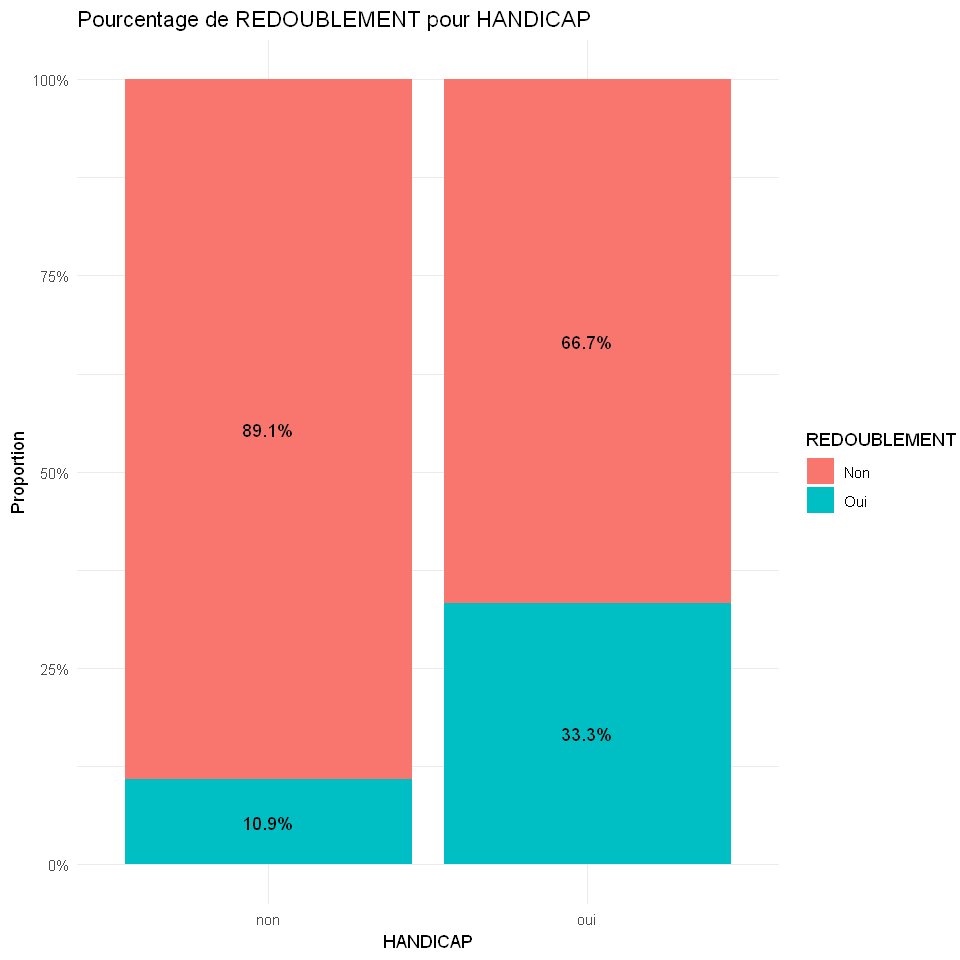

[1] "Test du chi-carré pour la variable : TIERSTEMPS"

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 13.705, df = 1, p-value = 0.0002139



`summarise()` has grouped output by 'TIERSTEMPS'. You can override using the `.groups` argument.


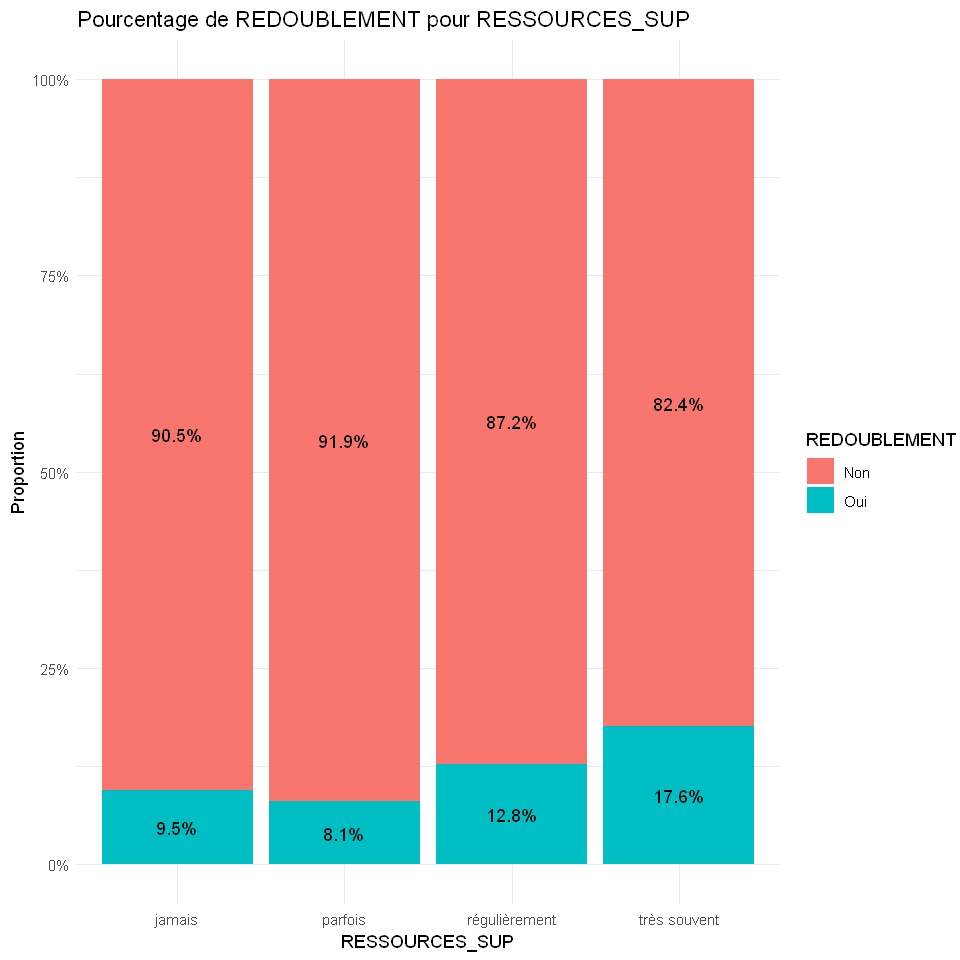

Warning message in chisq.test(table(group2[[var]], group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"


[1] "Test du chi-carré pour la variable : STRESS"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 16.37, df = 3, p-value = 0.0009522



`summarise()` has grouped output by 'STRESS'. You can override using the `.groups` argument.


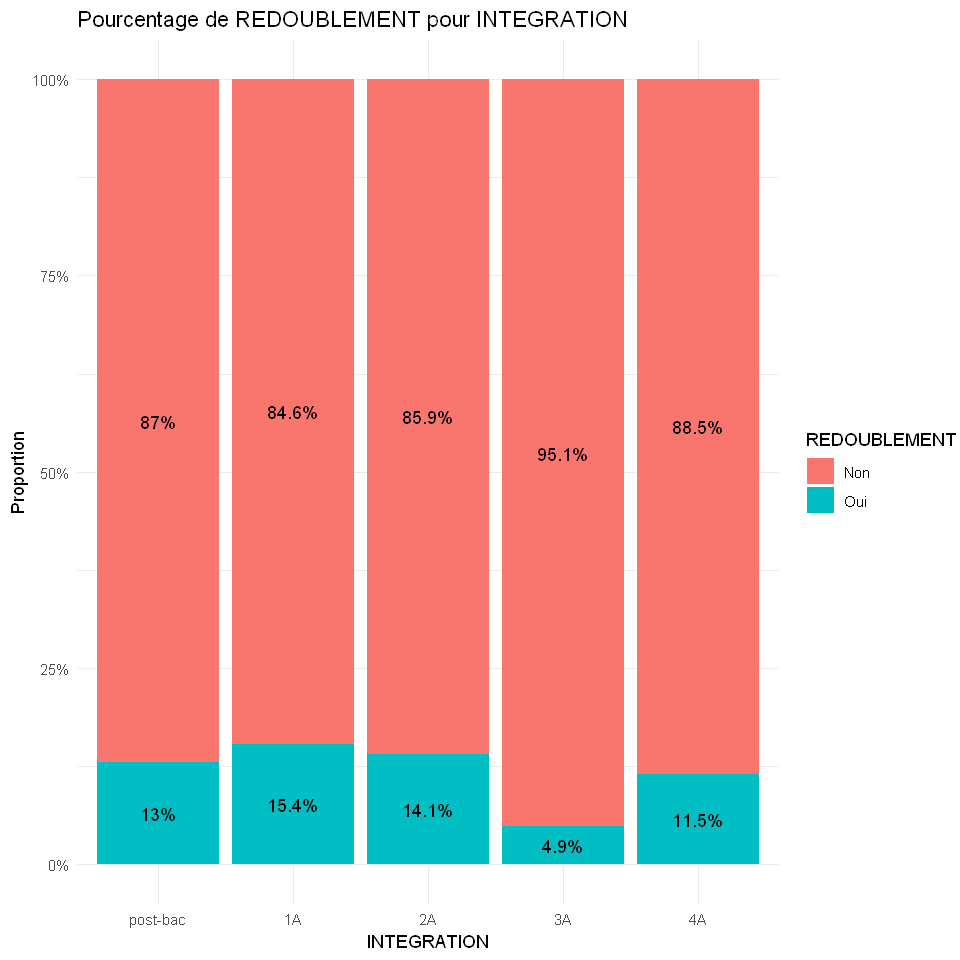

[1] "Test du chi-carré pour la variable : SORTIEBAR"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 12.315, df = 4, p-value = 0.01515



`summarise()` has grouped output by 'SORTIEBAR'. You can override using the `.groups` argument.


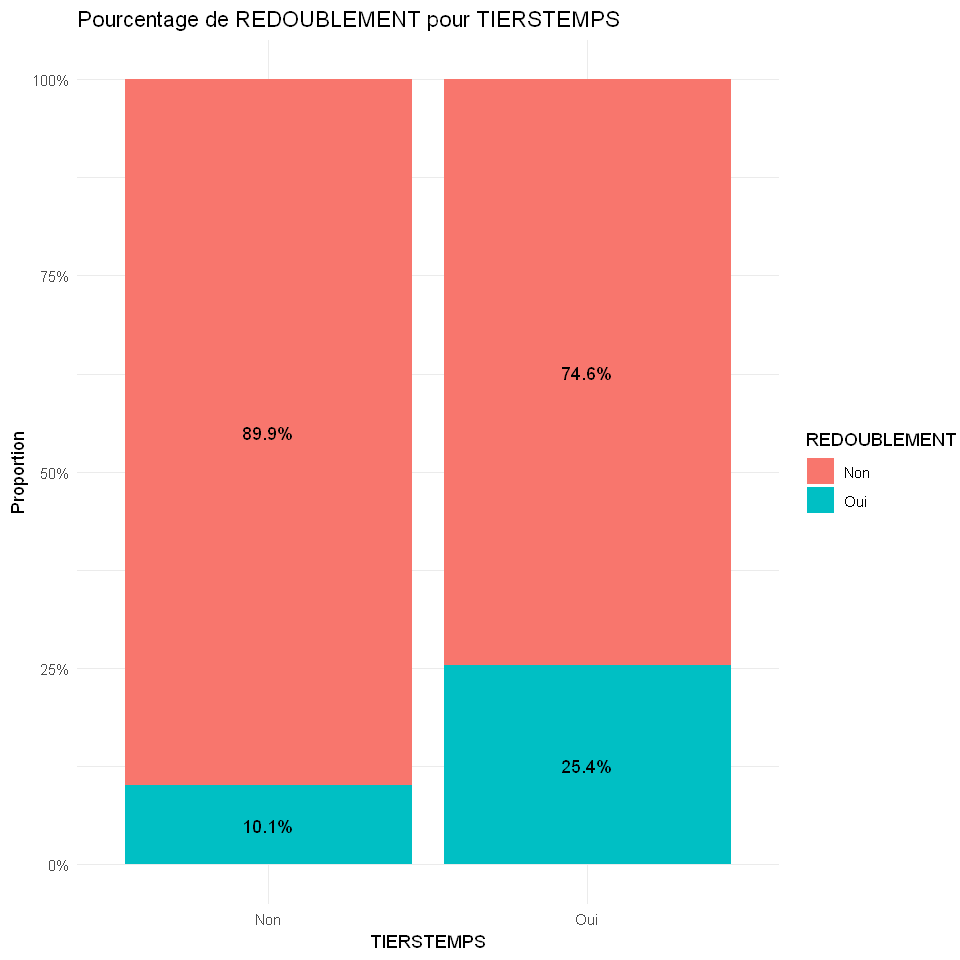

Warning message in chisq.test(table(group2[[var]], group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"


[1] "Test du chi-carré pour la variable : SPECIALITE_PO"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = NaN, df = 13, p-value = NA



`summarise()` has grouped output by 'SPECIALITE_PO'. You can override using the `.groups` argument.


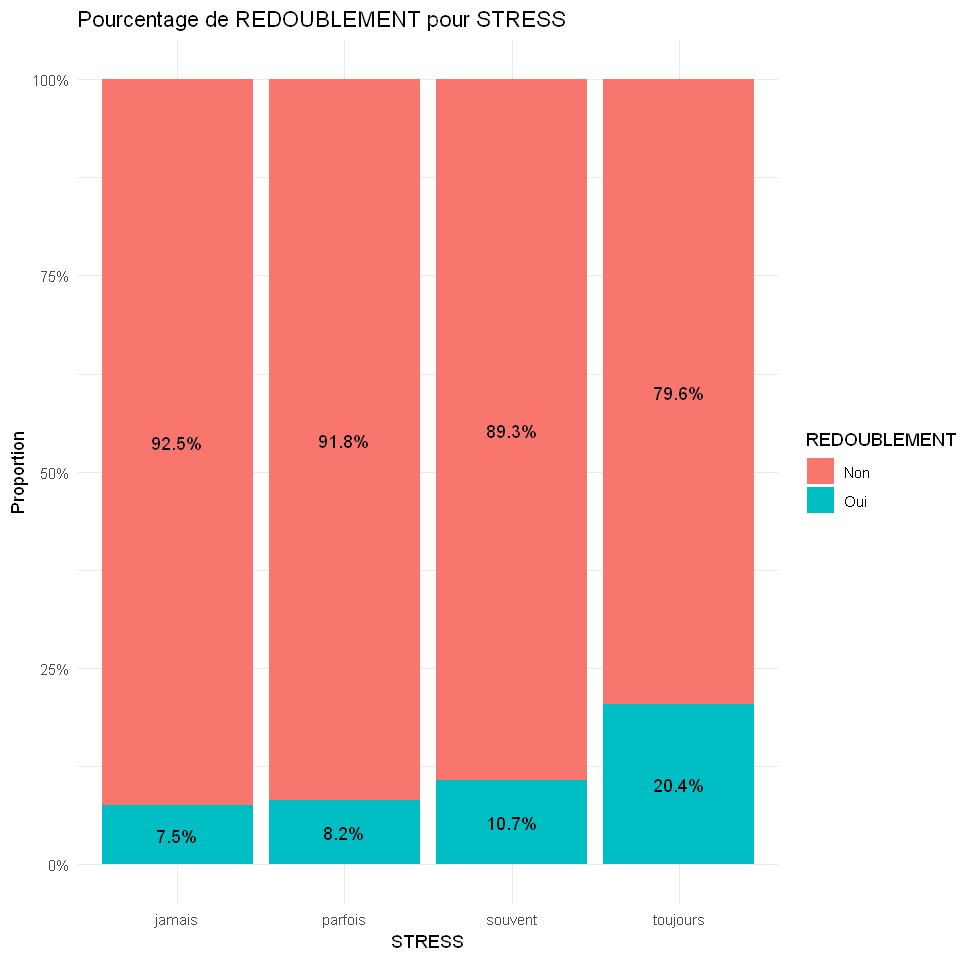

[1] "Test du chi-carré pour la variable : CLASSEMENTDERNIER"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 64.068, df = 5, p-value = 1.749e-12



`summarise()` has grouped output by 'CLASSEMENTDERNIER'. You can override using the `.groups` argument.


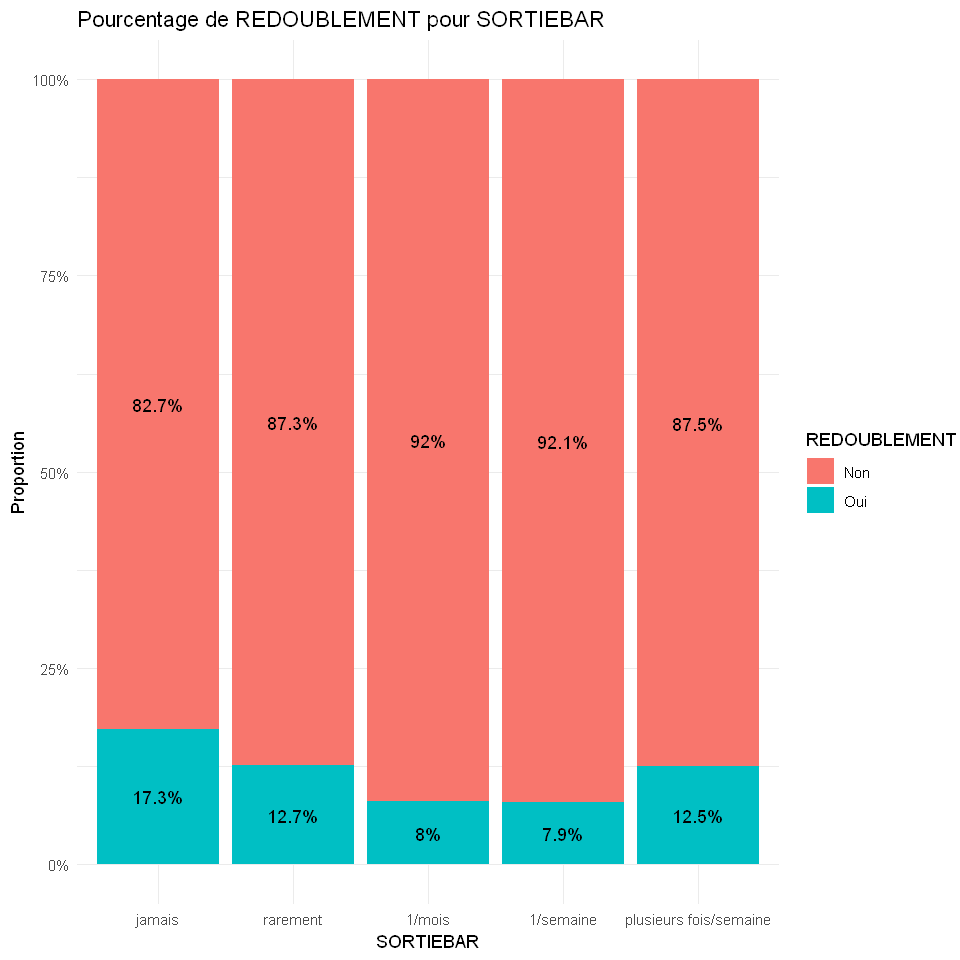

[1] "Test du chi-carré pour la variable : SPORTTEMPS"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 12.425, df = 4, p-value = 0.01446



`summarise()` has grouped output by 'SPORTTEMPS'. You can override using the `.groups` argument.


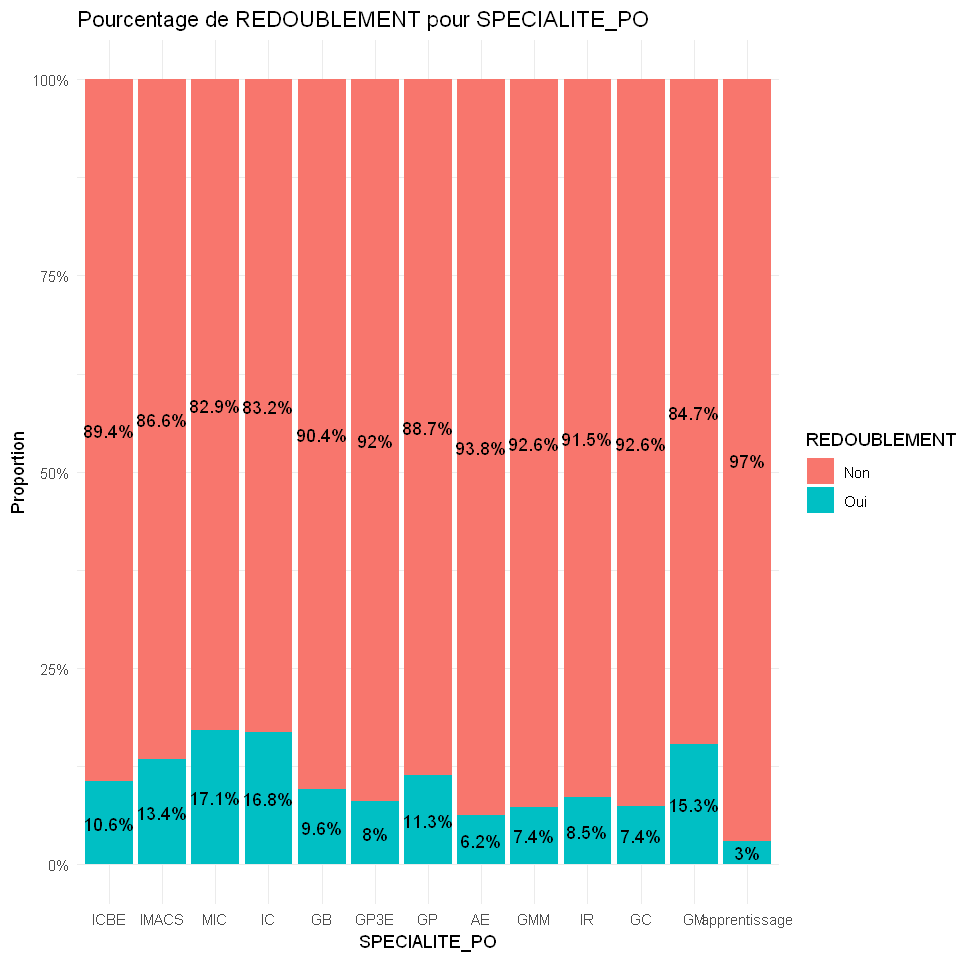

[1] "Test du chi-carré pour la variable : ETUDEWE"

	Pearson's Chi-squared test

data:  table(group2[[var]], group2$REDOUBLEMENT)
X-squared = 25.516, df = 5, p-value = 0.0001108



`summarise()` has grouped output by 'ETUDEWE'. You can override using the `.groups` argument.


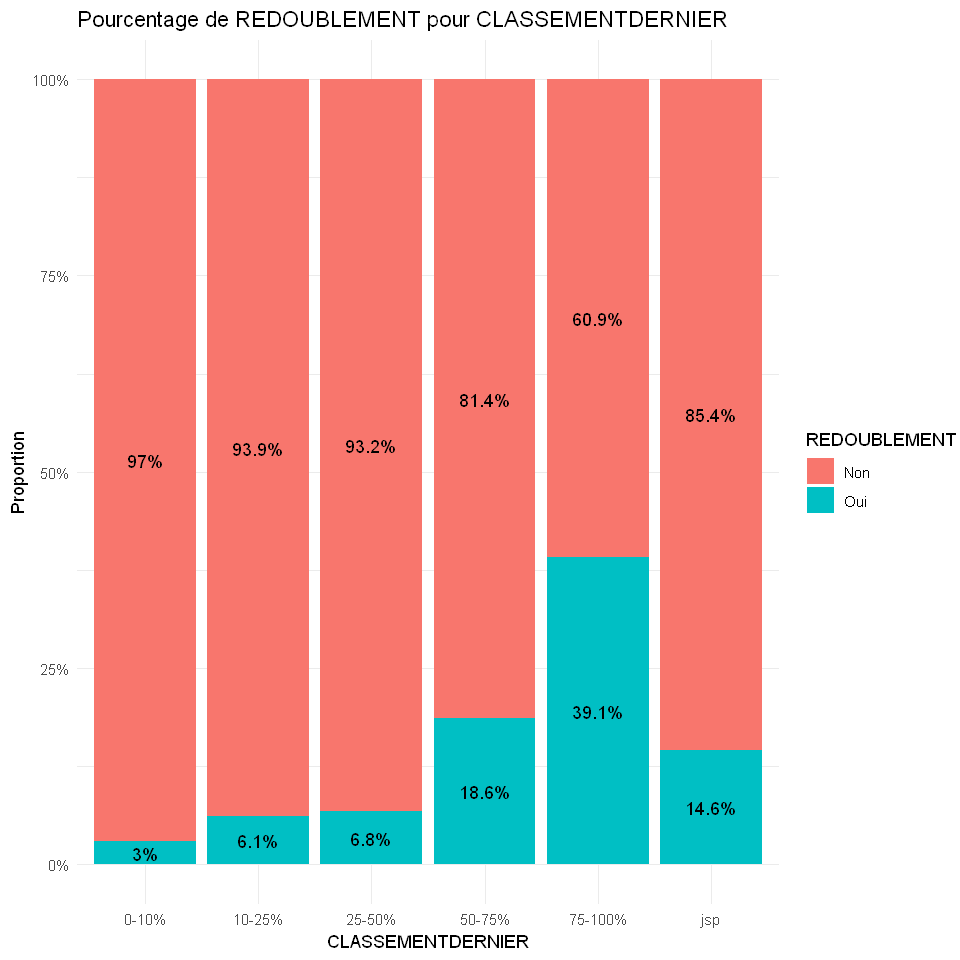

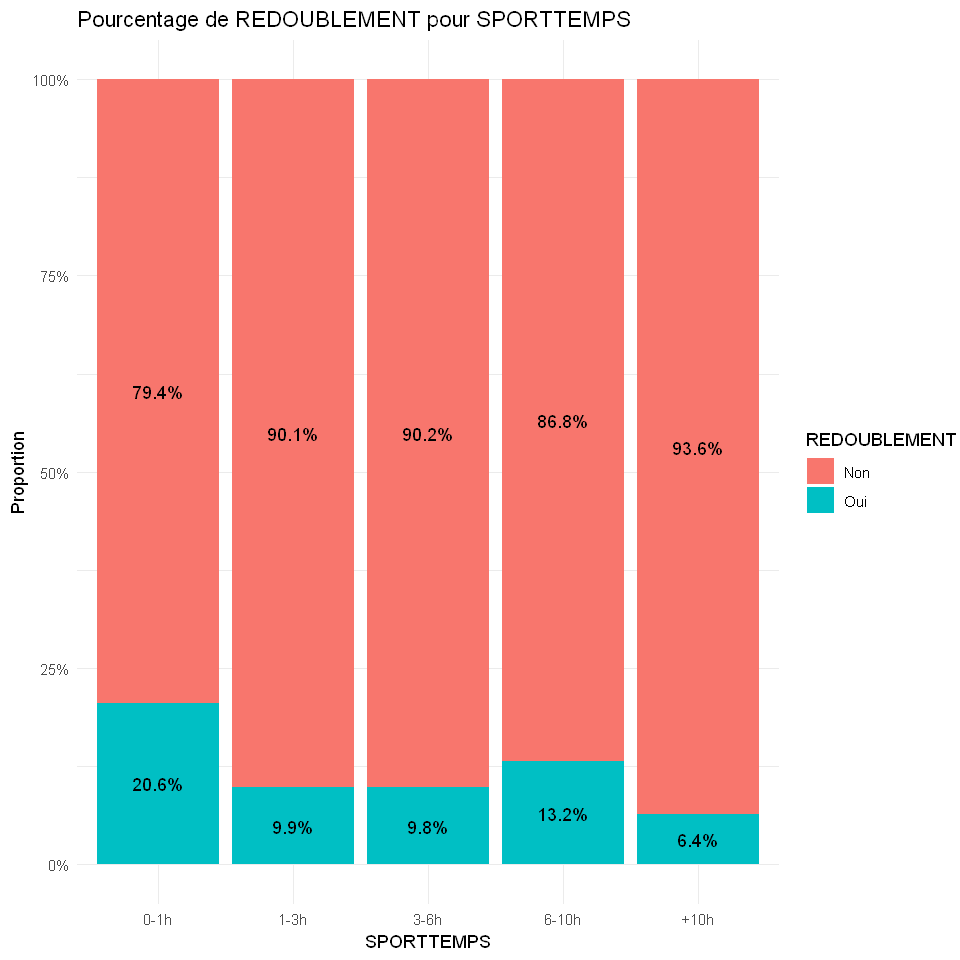

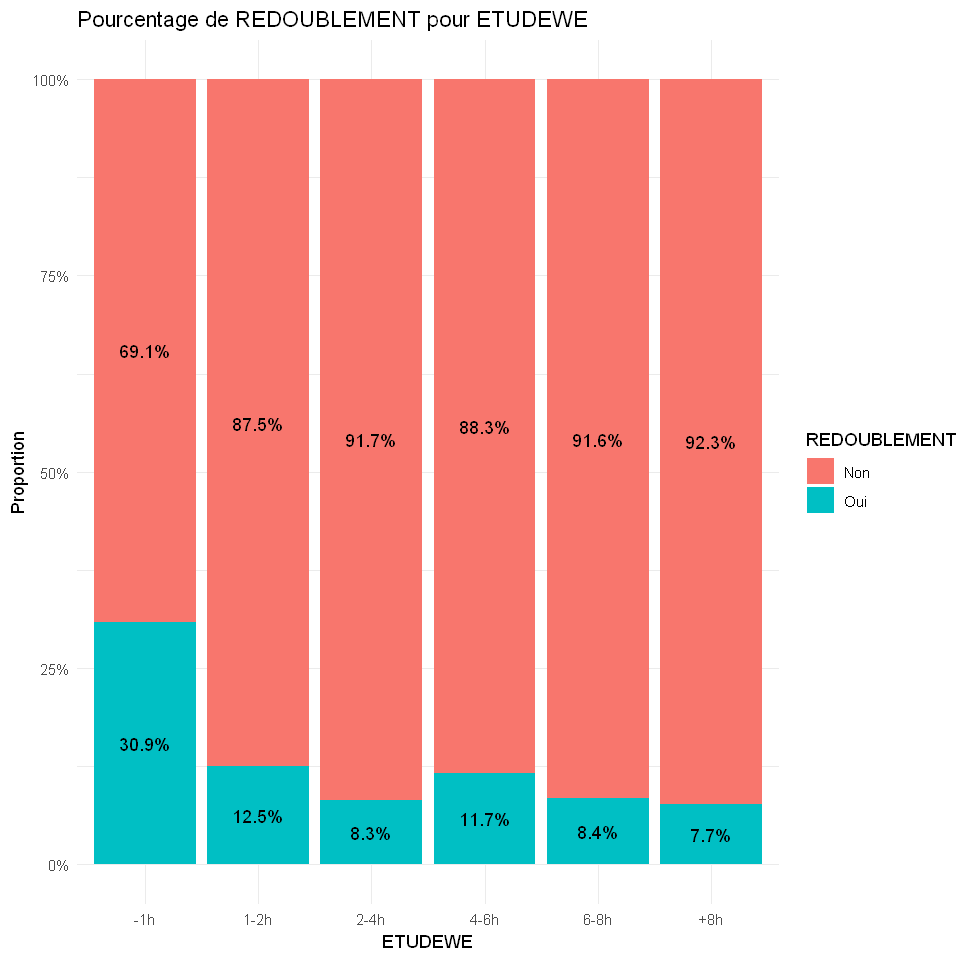

In [144]:
# Liste des variables entourées que vous souhaitez analyser
variables_entourees <- c("HANDICAP", "RESSOURCES_SUP", "INTEGRATION", "TIERSTEMPS", 
                         "STRESS", "SORTIEBAR", "SPECIALITE_PO", "CLASSEMENTDERNIER",
                         "SPORTTEMPS", "ETUDEWE")

# Boucler sur chaque variable et effectuer le test du chi-carré et visualiser les résultats
for (var in variables_entourees) {
  
  # Vérifier si la variable existe dans le dataframe
  if (!(var %in% names(group2))) {
    print(paste("La variable", var, "n'existe pas dans le dataframe."))
    next
  }
  
  # Créer dynamiquement la table pour le test du chi-carré
  chi_square_test <- chisq.test(table(group2[[var]], group2$REDOUBLEMENT))
  print(paste("Test du chi-carré pour la variable :", var))
  print(chi_square_test)
  
  # Calculer les pourcentages pour chaque groupe de la variable actuelle et REDOUBLEMENT
  group2_percent <- group2 %>%
    group_by(!!sym(var), REDOUBLEMENT) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count) * 100)
  
  # Générer un graphique de barres empilées pour chaque variable
  p <- ggplot(group2_percent, aes(x = !!sym(var), y = percentage, fill = REDOUBLEMENT)) +
    geom_bar(stat = "identity", position = "fill") +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), 
              position = position_fill(vjust = 0.5)) +
    labs(y = "Proportion", title = paste("Pourcentage de REDOUBLEMENT pour", var)) +
    scale_y_continuous(labels = scales::percent_format()) +
    theme_minimal()  # Pour un graphique propre
  
  # Afficher le graphique
  print(p)
}

In [129]:
# Initialiser une liste pour stocker les variables significatives et celles avec une p-value NA
variables_significatives <- c()
variables_na_pvalue <- c()

# Parcourir chaque colonne du dataframe (sauf la colonne REDOUBLEMENT)
for (variable in colnames(etudiants_4A_reduced_redoublement)) {
  if (variable != "REDOUBLEMENT") {
    # Effectuer le test du chi-carré
    chi_square_test <- chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], etudiants_4A_reduced_redoublement$REDOUBLEMENT))
    
    # Vérifier si la p-value est NA
    if (is.na(chi_square_test$p.value)) {
      # Ajouter la variable à la liste si la p-value est NA
      variables_na_pvalue <- c(variables_na_pvalue, variable)
    } else {
      # Si la p-value n'est pas NA, vérifier si elle est significative
      if (chi_square_test$p.value < 0.05) {
        variables_significatives <- c(variables_significatives, variable)
      }
    }
  }
}

Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(etudiants_4A_reduced_redoublement[[variable]], :
"Chi-

In [130]:
# Afficher les variables significatives
print("Les variables corrélées avec REDOUBLEMENT (p < 0.05) sont :")
print(variables_significatives)

# Afficher les variables avec une p-value NA
print("Les variables avec une p-value NA sont :")
print(variables_na_pvalue)

[1] "Les variables corrélées avec REDOUBLEMENT (p < 0.05) sont :"
 [1] "HANDICAP"          "STRESS"            "ETUDEDEHORS"      
 [4] "PRESENCE_CM"       "CONCENTRATION_TD"  "REVISIONSDEB"     
 [7] "SPORTTEMPS"        "SORTIEBAR"         "ECRANS"           
[10] "MOTIVATION"        "SENSATIONREUSSITE" "CLASSEMENTDERNIER"
[1] "Les variables avec une p-value NA sont :"
NULL


In [134]:
# Initialiser une matrice vide pour stocker les p-values
n <- ncol(insa_cleaned_2)
p_value_matrix <- matrix(NA, nrow = n, ncol = n)
colnames(p_value_matrix) <- colnames(insa_cleaned_2)
rownames(p_value_matrix) <- colnames(insa_cleaned_2)

# Effectuer le test Chi-deux entre chaque paire de variables
for (i in 1:(n-1)) {
  for (j in (i+1):n) {
    # Créer un tableau de contingence pour chaque paire de variables
    contingency_table <- table(insa_cleaned_2[[i]], insa_cleaned_2[[j]])
    
    # Effectuer le test Chi-deux
    chi_test <- chisq.test(contingency_table)
    
    # Stocker la p-value dans la matrice
    p_value_matrix[i, j] <- chi_test$p.value
    p_value_matrix[j, i] <- chi_test$p.value
  }
}

# Remplacer les p-values NA par 1 (car on ne fait pas de test sur la diagonale)
diag(p_value_matrix) <- 1

# Créer une matrice binaire de dépendance
dependency_matrix <- ifelse(p_value_matrix < 0.05, 1, 0)

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(contingency_table):


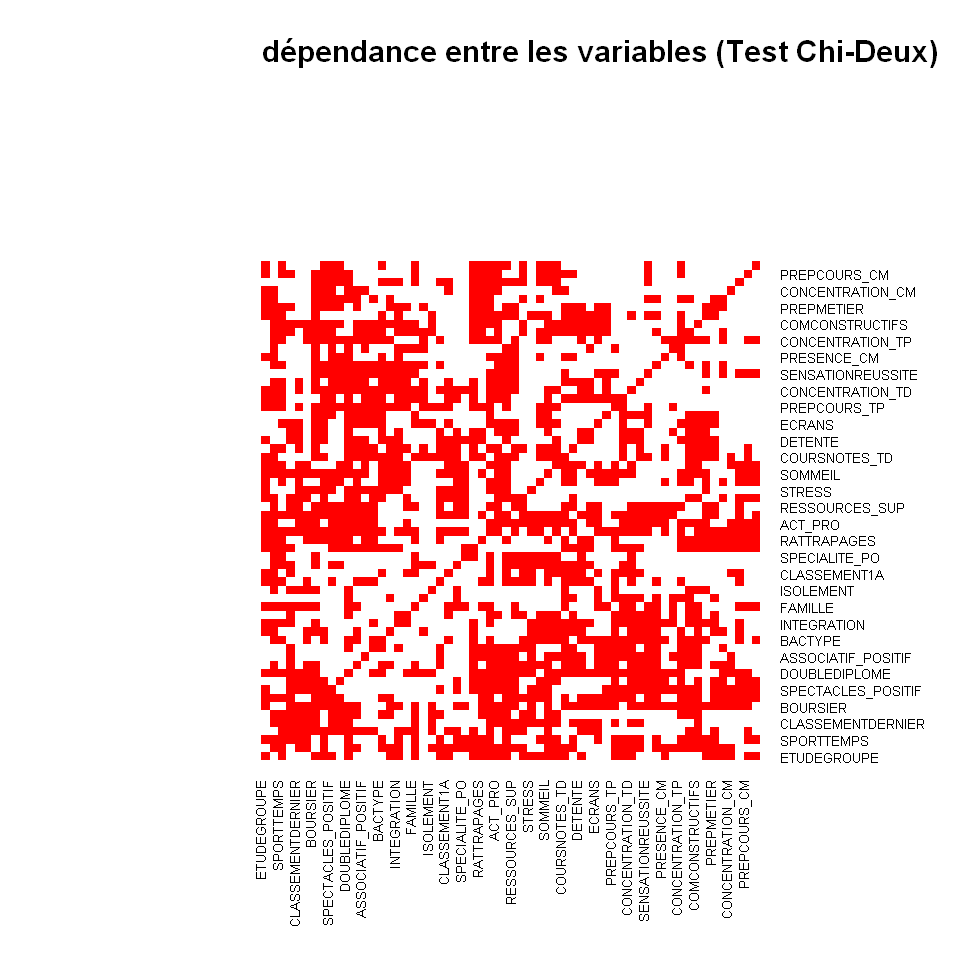

In [143]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Remplacer les valeurs NaN, NA ou Inf dans la matrice de dépendance par 0
dependency_matrix[is.na(dependency_matrix)] <- 1
dependency_matrix[is.infinite(dependency_matrix)] <- 1

# Créer la heatmap après avoir traité les valeurs indésirables
heatmap.2(as.matrix(dependency_matrix), 
          trace = "none", 
          col = c( "red","white"), 
          dendrogram = "none", 
          key = FALSE, 
          margins = c(10, 10),
          main = "Heatmap de dépendance entre les variables (Test Chi-Deux)")


## Modèle linéaire

MCA

In [137]:
# Réaliser l'Analyse des Correspondances Multiples (MCA)
mca_result <- MCA(insa_cleaned_2, graph = FALSE)  # Réaliser la MCA sans afficher les graphiques immédiatement

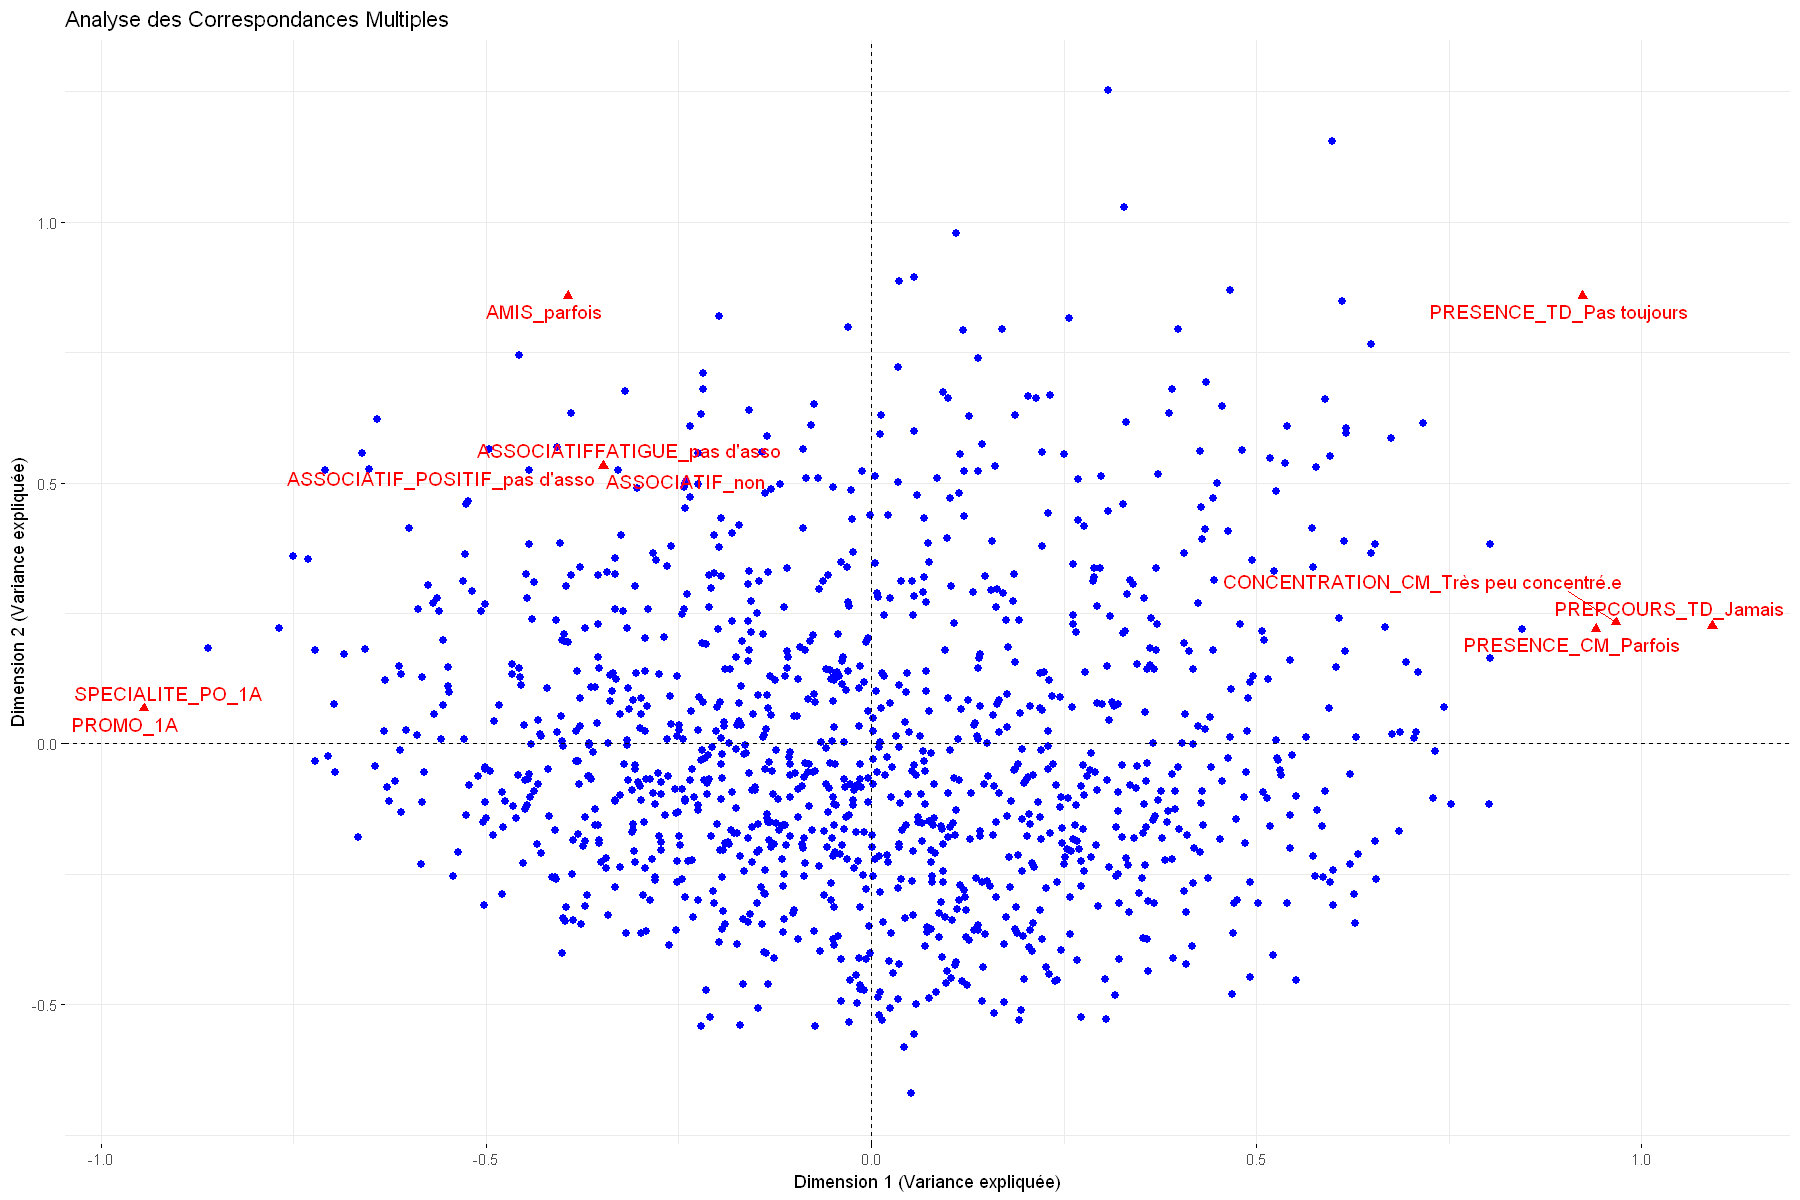

In [138]:
fviz_mca_biplot(mca_result, repel = TRUE,
                ggtheme = theme_minimal(),          
                title = "Analyse des Correspondances Multiples",  
                xlab = "Dimension 1 (Variance expliquée)",        
                ylab = "Dimension 2 (Variance expliquée)",        
                select.var = list(contrib = 10),   
                label = "var",                      
                pointsize = 2)                      

VIF

In [244]:
insa_cleaned_2_encoded <- model.matrix(~ . - 1, data = insa_cleaned_2)


In [245]:
colnames(insa_cleaned_2_encoded) <- make.names(colnames(insa_cleaned_2_encoded))


In [246]:
insa_cleaned_2_encoded <- as.data.frame(insa_cleaned_2_encoded)


In [247]:
str(insa_cleaned_2_encoded)

group2_reduced

'data.frame':	1163 obs. of  173 variables:
 $ TRAJET0.5min                           : num  0 0 1 0 0 0 0 0 1 1 ...
 $ TRAJET5.15min                          : num  0 1 0 1 1 1 0 0 0 0 ...
 $ TRAJET15.30min                         : num  1 0 0 0 0 0 1 1 0 0 ...
 $ TRAJET.30min                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LOGEMENTTYPEcolocation                 : num  0 0 0 0 1 1 0 0 0 0 ...
 $ LOGEMENTTYPEfoyer.familial             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LOGEMENTSURFACE10.20m2                 : num  0 0 1 0 0 0 0 0 1 0 ...
 $ LOGEMENTSURFACE20.30m2                 : num  0 0 0 0 0 0 1 0 0 1 ...
 $ LOGEMENTSURFACE..30m2                  : num  1 1 0 1 0 0 0 1 0 0 ...
 $ LOGEMENTSURFACEcoloc.ou.foyer.familial : num  0 0 0 0 1 1 0 0 0 0 ...
 $ LOGEMENTBIENplutôt.oui                 : num  0 0 1 0 0 0 0 0 1 1 ...
 $ LOGEMENTBIENtout.à.fait                : num  1 1 0 1 1 1 1 1 0 0 ...
 $ ACT_PROoui.1.5h                        : num  0 0 0 0 0 1 0 0 0 0 ...
 $ ACT_P

In [253]:
# Étape 1 : Supprimer la variable cible (RATTRAPAGES) avant l'encodage
# Nous supprimons 'RATTRAPAGES' du dataframe avant de faire l'encodage one-hot
insa_cleaned_2_without_target <- insa_cleaned_2[ , !names(insa_cleaned_2) %in% "RATTRAPAGES"]

# Étape 2 : Encodage one-hot des variables qualitatives (sans RATTRAPAGES)
insa_cleaned_2_encoded <- dummy_cols(insa_cleaned_2_without_target, remove_first_dummy = TRUE, remove_selected_columns = TRUE)

# Étape 3 : Préparer la variable cible et les variables explicatives
# Supposons que la variable cible est 'RATTRAPAGES'
target <- as.factor(insa_cleaned_2$RATTRAPAGES)

# Convertir les variables explicatives en matrice
x <- as.matrix(insa_cleaned_2_encoded)

# Étape 4 : Ajuster le modèle de régression logistique avec régularisation L1
# La fonction cv.glmnet ajuste plusieurs modèles et choisit la meilleure régularisation
model_lasso <- cv.glmnet(x, target, family = "multinomial", alpha = 1)

# Étape 5 : Visualiser les résultats
# Afficher le lambda optimal (le paramètre de régularisation)
best_lambda <- model_lasso$lambda.min
print(paste("Le meilleur lambda est:", best_lambda))

# Étape 6 : Voir les coefficients du modèle
coef_lasso <- coef(model_lasso, s = "lambda.min")
print("Coefficients du modèle sélectionnés avec Lasso :")
print(coef_lasso)


[1] "Le meilleur lambda est: 0.0107189865345741"
[1] "Coefficients du modèle sélectionnés avec Lasso :"
$aucun
170 x 1 sparse Matrix of class "dgCMatrix"
                                                    1
(Intercept)                               1.075552624
TRAJET_5-15min                            .          
TRAJET_15-30min                           0.147824574
TRAJET_+30min                            -0.175113699
LOGEMENTTYPE_colocation                   .          
LOGEMENTTYPE_foyer familial               .          
LOGEMENTSURFACE_10-20m2                   .          
LOGEMENTSURFACE_20-30m2                   0.001257795
LOGEMENTSURFACE_+ 30m2                    .          
LOGEMENTSURFACE_coloc ou foyer familial   .          
LOGEMENTBIEN_plutôt oui                   .          
LOGEMENTBIEN_tout à fait                  0.053976642
ACT_PRO_oui 1-5h                          .          
ACT_PRO_oui +5                           -0.112973898
BOURSIER_echelon 0bis               

In [261]:
# Étape 6 : Voir uniquement les coefficients non nuls du modèle pour chaque classe
coefficients <- coef(model_lasso, s = "lambda.min")

# Obtenir les noms des classes (si disponibles)
# Sinon, vous pouvez les spécifier manuellement
classes <- names(coefficients)

# Obtenir les noms des variables explicatives encodées
variables <- rownames(as.matrix(coefficients[[1]]))

# Parcourir les coefficients pour chaque classe et afficher les variables importantes
for (i in 1:length(coefficients)) {
  # Extraire les coefficients pour chaque classe et les convertir en matrice
  class_coeff <- as.matrix(coefficients[[i]])
  
  # Extraire les coefficients non nuls
  non_zero_coeff <- class_coeff[class_coeff != 0]
  
  # Obtenir les noms des variables importantes (non nulles)
  important_variables <- variables[class_coeff != 0]
  
  # Afficher les résultats pour cette classe
  print(paste("Classe :", classes[i]))
  print("Variables importantes (coefficients non nuls) et leurs valeurs :")
  
  # Afficher les noms des variables avec leurs coefficients
  for (j in 1:length(non_zero_coeff)) {
    print(paste(important_variables[j], ":", non_zero_coeff[j]))
  }
  
  print("----------------------")
}


[1] "Classe : aucun"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : 1.0755526243225"
[1] "TRAJET_15-30min : 0.147824574064202"
[1] "TRAJET_+30min : -0.175113698843748"
[1] "LOGEMENTSURFACE_20-30m2 : 0.00125779515932995"
[1] "LOGEMENTBIEN_tout à fait : 0.0539766422743248"
[1] "ACT_PRO_oui +5 : -0.112973898163283"
[1] "BOURSIER_echelon 0bis : 0.0910959967983748"
[1] "BOURSIER_echelon 4-7 : -0.217429410340869"
[1] "COMCONSTRUCTIFS_tout à fait : -0.221227522937324"
[1] "ETUDEWE_1-2h : -0.213775972821421"
[1] "ETUDEWE_4-6h : -0.0636048655365852"
[1] "PRESENCE_TD_Toujours : 0.405185846888088"
[1] "CONCENTRATION_TP_Assez bien concentré.e : 0.00197798305091808"
[1] "PREPCOURS_TD_Souvent : -0.037819693741366"
[1] "REVISIONSDEB_2 semaines avant : -0.0525422987177622"
[1] "CONCENTRATIONPERSO_très : 0.210934736909145"
[1] "CONDITIONSTRAVAIL_plutôt bonnes : 0.0827893715453855"
[1] "RESSOURCES_SUP_régulièrement : 0.0192934720088513"
[1] "RESSOURCES_SUP_très

Interprétation des coefficients dans une régression logistique :
+ Si le coefficient associé à une modalité est positif, cela signifie que cette modalité augmente la probabilité de l'événement par rapport à la catégorie de référence.
+ Si le coefficient est négatif, cela signifie que cette modalité diminue la probabilité de l'événement par rapport à la catégorie de référence.
+ Si le coefficient est proche de 0, cela signifie que la modalité n'a pas d'effet significatif par rapport à la catégorie de référence.

Magnitude (valeur absolue) :

+ Grande valeur : Si un coefficient a une grande magnitude (en positif ou en négatif), cela signifie que la variable correspondante a un fort impact sur la probabilité de la variable cible.
+ Petite valeur : Si un coefficient a une petite magnitude (proche de 0), cela signifie que la variable correspondante a peu ou pas d'impact sur la probabilité de la variable cible.

GROUP2

In [262]:
# Étape 1 : Supprimer la variable cible (RATTRAPAGES) avant l'encodage
# Nous supprimons 'RATTRAPAGES' du dataframe avant de faire l'encodage one-hot
group2_reduced_without_target <- group2_reduced[ , !names(group2_reduced) %in% "RATTRAPAGES"]

# Étape 2 : Encodage one-hot des variables qualitatives (sans RATTRAPAGES)
group2_reduced_encoded <- dummy_cols(group2_reduced_without_target, remove_first_dummy = TRUE, remove_selected_columns = TRUE)

# Étape 3 : Préparer la variable cible et les variables explicatives
# Supposons que la variable cible est 'RATTRAPAGES'
target <- as.factor(group2_reduced$RATTRAPAGES)

# Convertir les variables explicatives en matrice
x <- as.matrix(group2_reduced_encoded)

# Étape 4 : Ajuster le modèle de régression logistique avec régularisation L1
# La fonction cv.glmnet ajuste plusieurs modèles et choisit la meilleure régularisation
model_lasso <- cv.glmnet(x, target, family = "multinomial", alpha = 1)

# Étape 5 : Visualiser les résultats
# Afficher le lambda optimal (le paramètre de régularisation)
best_lambda <- model_lasso$lambda.min
print(paste("Le meilleur lambda est:", best_lambda))

# Étape 6 : Voir uniquement les coefficients non nuls du modèle pour chaque classe
coefficients <- coef(model_lasso, s = "lambda.min")

# Obtenir les noms des classes (si disponibles)
# Sinon, vous pouvez les spécifier manuellement
classes <- names(coefficients)

# Obtenir les noms des variables explicatives encodées
variables <- rownames(as.matrix(coefficients[[1]]))

# Parcourir les coefficients pour chaque classe et afficher les variables importantes
for (i in 1:length(coefficients)) {
  # Extraire les coefficients pour chaque classe et les convertir en matrice
  class_coeff <- as.matrix(coefficients[[i]])
  
  # Extraire les coefficients non nuls
  non_zero_coeff <- class_coeff[class_coeff != 0]
  
  # Obtenir les noms des variables importantes (non nulles)
  important_variables <- variables[class_coeff != 0]
  
  # Afficher les résultats pour cette classe
  print(paste("Classe :", classes[i]))
  print("Variables importantes (coefficients non nuls) et leurs valeurs :")
  
  # Afficher les noms des variables avec leurs coefficients
  for (j in 1:length(non_zero_coeff)) {
    print(paste(important_variables[j], ":", non_zero_coeff[j]))
  }
  
  print("----------------------")
}


[1] "Le meilleur lambda est: 0.0207207035655534"
[1] "Classe : aucun"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : 1.36726476433748"
[1] "TRAJET_5-15min : -0.0110267854681343"
[1] "TRAJET_+30min : -0.0669944406172145"
[1] "LOGEMENTSURFACE_20-30m2 : 0.0346044792127571"
[1] "LOGEMENTBIEN_tout à fait : 0.0607157331171192"
[1] "ACT_PRO_oui +5 : -0.288591975461724"
[1] "BOURSIER_echelon 4-7 : -0.219039946221287"
[1] "HANDICAP_oui : -0.534330779331554"
[1] "STRESS_parfois : 0.0295017481718521"
[1] "STRESS_toujours : -0.228355135385063"
[1] "ETUDEWE_1-2h : -0.150334360487321"
[1] "ETUDEDEHORS_toujours : -0.0842616714470732"
[1] "ETUDEDOM_toujours : 0.0104765343180729"
[1] "PRESENCE_CM_Toujours : 0.0487645037885874"
[1] "PRESENCE_TD_Toujours : 0.51317626395359"
[1] "PREPCOURS_TP_Toujours : 0.0170106870786804"
[1] "REVISIONSDEB_1 semaine avant : 0.1015923006874"
[1] "CONCENTRATIONPERSO_très : 0.381796906380165"
[1] "RESSOURCES_SUP_très souvent : -0.1

In [263]:
# Étape 1 : Supprimer la variable cible (RATTRAPAGES) avant l'encodage
# Nous supprimons 'RATTRAPAGES' du dataframe avant de faire l'encodage one-hot
etudiants_4A_reduced_without_target <- etudiants_4A_reduced[ , !names(etudiants_4A_reduced) %in% "RATTRAPAGES"]

# Étape 2 : Encodage one-hot des variables qualitatives (sans RATTRAPAGES)
etudiants_4A_reduced_encoded <- dummy_cols(etudiants_4A_reduced_without_target, remove_first_dummy = TRUE, remove_selected_columns = TRUE)

# Étape 3 : Préparer la variable cible et les variables explicatives
# Supposons que la variable cible est 'RATTRAPAGES'
target <- as.factor(etudiants_4A_reduced$RATTRAPAGES)

# Convertir les variables explicatives en matrice
x <- as.matrix(etudiants_4A_reduced_encoded)

# Étape 4 : Ajuster le modèle de régression logistique avec régularisation L1
# La fonction cv.glmnet ajuste plusieurs modèles et choisit la meilleure régularisation
model_lasso <- cv.glmnet(x, target, family = "multinomial", alpha = 1)

# Étape 5 : Visualiser les résultats
# Afficher le lambda optimal (le paramètre de régularisation)
best_lambda <- model_lasso$lambda.min
print(paste("Le meilleur lambda est:", best_lambda))

# Étape 6 : Voir uniquement les coefficients non nuls du modèle pour chaque classe
coefficients <- coef(model_lasso, s = "lambda.min")

# Obtenir les noms des classes (si disponibles)
# Sinon, vous pouvez les spécifier manuellement
classes <- names(coefficients)

# Obtenir les noms des variables explicatives encodées
variables <- rownames(as.matrix(coefficients[[1]]))

# Parcourir les coefficients pour chaque classe et afficher les variables importantes
for (i in 1:length(coefficients)) {
  # Extraire les coefficients pour chaque classe et les convertir en matrice
  class_coeff <- as.matrix(coefficients[[i]])
  
  # Extraire les coefficients non nuls
  non_zero_coeff <- class_coeff[class_coeff != 0]
  
  # Obtenir les noms des variables importantes (non nulles)
  important_variables <- variables[class_coeff != 0]
  
  # Afficher les résultats pour cette classe
  print(paste("Classe :", classes[i]))
  print("Variables importantes (coefficients non nuls) et leurs valeurs :")
  
  # Afficher les noms des variables avec leurs coefficients
  for (j in 1:length(non_zero_coeff)) {
    print(paste(important_variables[j], ":", non_zero_coeff[j]))
  }
  
  print("----------------------")
}


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"
Warning message:
"from glmnet C++ code (error code -75); Convergence for 75th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"
Warning message:
"from glmnet C++ code (error code -82); Convergence for 82th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"
Warning message:
"from glmnet C++ code (error code -97); Convergence for 97th lambda value not reached after maxit=100000 iterations; solutions for

[1] "Le meilleur lambda est: 0.0610423909534297"
[1] "Classe : aucun"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : 1.53949020685943"
[1] "PRESENCE_TD_Toujours : 0.32162345518686"
[1] "COURSNOTES_TP_Souvent : -0.0122022102000601"
[1] "INTEGRATION_3A : -0.129698006142357"
[1] "BACTYPE_Fr_etranger : -0.14114938531607"
[1] "----------------------"
[1] "Classe : 1 par semestre"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : 0.796877861901124"
[1] "ASSOCIATIF_5-10h : 0.0623012952492996"
[1] "----------------------"
[1] "Classe : 2/3 par semestre"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : -0.0168914578538103"
[1] "----------------------"
[1] "Classe : + de 4 par semestre"
[1] "Variables importantes (coefficients non nuls) et leurs valeurs :"
[1] "(Intercept) : -2.31947661090675"
[1] "----------------------"


In [134]:
# Hàm kiểm tra từng biến với tất cả các biến phía sau
check_identical_columns <- function(df) {
  num_cols <- ncol(df)
  
  # Lặp qua từng cột
  for (i in 1:(num_cols - 1)) {
    for (j in (i + 1):num_cols) {
      if (identical(df[[i]], df[[j]])) {
        # In ra cặp cột trùng lặp
        cat("Cột", colnames(df)[i], "giống hoàn toàn với cột", colnames(df)[j], "\n")
      }
    }
  }
}

# Áp dụng hàm cho dữ liệu của bạn
check_identical_columns(insa_cleaned_2_encoded)

In [131]:
# Kiểm tra hai cột cụ thể xem có giống nhau hoàn toàn hay không
identical(insa_cleaned_2_encoded$specialite.po.1a, insa_cleaned_2_encoded$promo1a)


[1] TRUE

In [168]:
# Supposons que vous avez déjà effectué MCA et que 'mca_res' contient le résultat

# Extraire les coordonnées des variables
mca_var_coords <- mca_result$var$coord

# Fonction pour trouver les colonnes avec des coordonnées identiques
find_identical_coords <- function(coords) {
  duplicate_vars <- list()
  
  for (i in 1:(ncol(coords) - 1)) {
    for (j in (i + 1):ncol(coords)) {
      # Comparer les colonnes
      if (identical(coords[, i], coords[, j])) {
        duplicate_vars <- append(duplicate_vars, list(c(colnames(coords)[i], colnames(coords)[j])))
      }
    }
  }
  
  return(duplicate_vars)
}

# Trouver les colonnes avec des coordonnées identiques
identical_coord_vars <- find_identical_coords(mca_var_coords)

# Afficher les résultats
if (length(identical_coord_vars) > 0) {
  print("Les variables suivantes ont des coordonnées identiques :")
  print(identical_coord_vars)
} else {
  print("Aucune variable avec des coordonnées identiques n'a été trouvée.")
}

[1] "Aucune variable avec des coordonnées identiques n'a été trouvée."


In [ ]:
# Charger la bibliothèque nécessaire pour la régression logistique multinomiale
library(nnet)
# Construire le modèle de régression logistique multinomiale
multinom_model <- multinom(RATTRAPAGES ~ ., data = group2_reduced)

# Résumé du modèle pour voir les coefficients et les p-values
summary(multinom_model)


In [ ]:
# Obtenir les coefficients et la matrice variance-covariance
coef_multinom <- summary(multinom_model)$coefficients
vcov_multinom <- vcov(multinom_model)

# Calculer les z-values et les p-values correspondantes
z_values <- coef_multinom / sqrt(diag(vcov_multinom))
p_values <- 2 * (1 - pnorm(abs(z_values)))

# Sélectionner les variables avec p-value < 0.05
significant_vars <- p_values < 0.05

# Extraire les noms des variables significatives
important_vars <- names(significant_vars)[apply(significant_vars, 2, any)]

# Afficher les variables importantes
print(important_vars)

In [ ]:
# Charger les packages nécessaires
library(car)

# Encoder les variables catégoriques en variables numériques (One-Hot Encoding)
# Supposons que toutes les colonnes sont catégoriques dans le dataframe insa_cleaned_2
data_encoded <- model.matrix(~ . - 1, data = insa_cleaned_2)

# Filtrer les variables ayant une déviation standard égale à 0
data_filtered <- data_encoded[, apply(data_encoded, 2, sd) != 0]

# Créer un modèle linéaire utilisant toutes les variables indépendantes pour calculer le VIF
model <- lm(rep(1, nrow(data_filtered)) ~ ., data = as.data.frame(data_filtered))

# Calculer le VIF pour chaque variable
vif_values <- vif(model)

# Afficher les valeurs de VIF
print(vif_values)

In [ ]:
# Sử dụng alias() để xác định các biến có mối tương quan hoàn hảo
alias_info <- alias(model)
print(alias_info)

In [ ]:
# Fonction pour calculer le V de Cramer
cramers_v <- function(x, y) {
  tbl <- table(x, y)
  chi2 <- suppressWarnings(chisq.test(tbl)$statistic)
  n <- sum(tbl)
  min_dim <- min(dim(tbl)) - 1
  v <- sqrt(chi2 / (n * min_dim))
  return(as.numeric(v))
}

# Calculer le V de Cramer pour chaque paire de variables
var_names <- colnames(insa_cleaned_3)
n <- length(var_names)
cramers_v_matrix <- matrix(NA, nrow = n, ncol = n)
rownames(cramers_v_matrix) <- var_names
colnames(cramers_v_matrix) <- var_names

for (i in 1:n) {
  for (j in 1:n) {
    if (i != j) {
      cramers_v_matrix[i, j] <- cramers_v(insa_cleaned_3[[i]], insa_cleaned_3[[j]])
    } else {
      cramers_v_matrix[i, j] <- 1 # la corrélation de chaque variable avec elle-même est 1
    }
  }
}

# Convertir la matrice en format long pour ggplot2
cramers_v_long <- melt(cramers_v_matrix, varnames = c("Variable1", "Variable2"), value.name = "V_de_Cramer")

# Tracer la heatmap avec ggplot2
ggplot(cramers_v_long, aes(Variable1, Variable2, fill = V_de_Cramer)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.5, limit = c(0, 1), space = "Lab", name = "V de Cramer") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Heatmap de la Corrélation (V de Cramer) entre les Variables Catégorielles")

Le V de Cramer prend des valeurs entre 0 et 1, où 0 indique une absence totale de relation et 1 indique une dépendance complète. Généralement, une valeur de V de Cramer supérieure à 0.5 est considérée comme indiquant une dépendance forte entre les variables ???

In [ ]:
# Filtrer les dépendances fortes (V de Cramer > 0.5), exclure les cas où Variable1 == Variable2 et éviter les doublons inversés
strong_dependencies <- cramers_v_long %>%
  filter(V_de_Cramer > 0.5 & Variable1 != Variable2) %>%
  rowwise() %>%
  mutate(Var1 = pmin(as.character(Variable1), as.character(Variable2)),
         Var2 = pmax(as.character(Variable1), as.character(Variable2))) %>%
  distinct(Var1, Var2, .keep_all = TRUE) %>%
  select(Variable1 = Var1, Variable2 = Var2, V_de_Cramer)

# Afficher les dépendances fortes
print(strong_dependencies)

In [ ]:
# Installer les packages nécessaires s'ils ne sont pas déjà installés
if (!require("dendextend")) install.packages("dendextend")
if (!require("factoextra")) install.packages("factoextra")

# Charger les packages nécessaires
library(dendextend)
library(factoextra)

# Encoder les variables catégoriques en variables numériques (One-Hot Encoding)
# Supposons que toutes les colonnes sont catégoriques dans le dataframe insa_cleaned_2
data_encoded <- model.matrix(~ . - 1, data = insa_cleaned_2)

# Filtrer les variables ayant une déviation standard égale à 0
data_filtered <- data_encoded[, apply(data_encoded, 2, sd) != 0]

# Calculer la matrice de corrélation sur les variables filtrées
corr_matrix <- cor(data_filtered)

# Convertir la matrice de corrélation en distance (1 - corrélation)
dist_matrix <- as.dist(1 - corr_matrix)

In [ ]:
# Appliquer le clustering hiérarchique
hc <- hclust(dist_matrix, method = "ward.D2")

# Tracer le dendrogramme
plot(as.dendrogram(hc), main = "Clustering hiérarchique des variables")

# Colorer les groupes dans le dendrogramme
dend <- as.dendrogram(hc)
dend_colored <- color_branches(dend, k = 5) # Vous pouvez ajuster le nombre de clusters 'k'
plot(dend_colored, main = "Dendrogramme avec des branches colorées")

# Sélectionner un représentant pour chaque cluster
# Vous pouvez couper l'arbre pour créer des groupes, puis choisir une variable par groupe
groupes <- cutree(hc, k = 5) # Ajustez 'k' selon votre besoin

# Afficher les groupes de variables
print(groupes)

    Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

    Cependant, je vois un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
    Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.

 Le choix du modèle pour l'analyse, nous allons utiliser la méthode Random Forest, car elle n'est pas affectée par la dépendance entre les variables. 